In [ ]:
 #Pip install pyreadstat
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.1/620.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
%%time
import pyreadstat
import pandas as pd
df, meta = pyreadstat.read_sav('/content/finalwomansamrat.sav')

print(df.head())

   area  age_cat  religion  edu  occup  marriage_age  parity  births_last5  \
0   1.0      4.0       1.0  3.0    1.0           2.0     1.0           0.0   
1   1.0      4.0       1.0  1.0    1.0           2.0     1.0           0.0   
2   1.0      3.0       2.0  0.0    3.0           1.0     1.0           0.0   
3   1.0      3.0       1.0  3.0    1.0           2.0     1.0           0.0   
4   1.0      4.0       1.0  1.0    3.0           1.0     1.0           0.0   

   breastfeeding  contraceptive  autonomy  media  husb_edu  hh_size  wealth  \
0            0.0            1.0       2.0    2.0       3.0      1.0     5.0   
1            0.0            2.0       2.0    2.0       1.0      1.0     4.0   
2            0.0            3.0       2.0    1.0       0.0      1.0     4.0   
3            0.0            2.0       2.0    1.0       2.0      1.0     5.0   
4            0.0            1.0       NaN    2.0       NaN      1.0     5.0   

   division  bmi  
0       1.0  4.0  
1       1.0  2.0  

In [ ]:
df.isnull().sum()

area               0
age_cat            0
religion           2
edu                0
occup              1
marriage_age       0
parity             0
births_last5       0
breastfeeding      0
contraceptive      4
autonomy         420
media              0
husb_edu         431
hh_size            0
wealth             0
division           0
bmi                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           8569 non-null   float64
 1   age_cat        8569 non-null   float64
 2   religion       8567 non-null   float64
 3   edu            8569 non-null   float64
 4   occup          8568 non-null   float64
 5   marriage_age   8569 non-null   float64
 6   parity         8569 non-null   float64
 7   births_last5   8569 non-null   float64
 8   breastfeeding  8569 non-null   float64
 9   contraceptive  8565 non-null   float64
 10  autonomy       8149 non-null   float64
 11  media          8569 non-null   float64
 12  husb_edu       8138 non-null   float64
 13  hh_size        8569 non-null   float64
 14  wealth         8569 non-null   float64
 15  division       8569 non-null   float64
 16  bmi            8569 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


In [ ]:

cols = ['area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
        'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
        'husb_edu', 'hh_size', 'wealth', 'division', 'bmi']

df[cols] = df[cols].astype('category')


In [ ]:
df['autonomy'].value_counts()

autonomy
2.0    4933
1.0    3216
Name: count, dtype: int64

In [ ]:
df['autonomy'].isnull().sum()

np.int64(420)

In [ ]:
df['autonomy'].mode()

0    2.0
Name: autonomy, dtype: category
Categories (2, float64): [1.0, 2.0]

## **Missing values fill up**

In [ ]:
import numpy as np

def random_impute(series):
    np.random.seed(42)
    missing = series.isnull()
    n_missing = missing.sum()
    if n_missing == 0:
        return series
    fill_values = np.random.choice(series.dropna(), size=n_missing, replace=True)
    series.loc[missing] = fill_values
    return series

#call the function
cat_vars_with_na = ['religion', 'occup', 'contraceptive', 'autonomy', 'husb_edu']

for col in cat_vars_with_na:
    df[col] = random_impute(df[col])


In [ ]:
df.isnull().sum()

area             0
age_cat          0
religion         0
edu              0
occup            0
marriage_age     0
parity           0
births_last5     0
breastfeeding    0
contraceptive    0
autonomy         0
media            0
husb_edu         0
hh_size          0
wealth           0
division         0
bmi              0
dtype: int64

In [ ]:
for col in df.columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)


Value counts for 'area':
area
2.0    5582
1.0    2987
Name: count, dtype: int64
----------------------------------------
Value counts for 'age_cat':
age_cat
3.0    3177
2.0    2689
4.0    2356
1.0     347
Name: count, dtype: int64
----------------------------------------
Value counts for 'religion':
religion
1.0    7671
2.0     898
Name: count, dtype: int64
----------------------------------------
Value counts for 'edu':
edu
2.0    3781
1.0    2370
0.0    1269
3.0    1149
Name: count, dtype: int64
----------------------------------------
Value counts for 'occup':
occup
1.0    5238
2.0    1898
3.0    1433
Name: count, dtype: int64
----------------------------------------
Value counts for 'marriage_age':
marriage_age
1.0    7277
2.0    1292
Name: count, dtype: int64
----------------------------------------
Value counts for 'parity':
parity
1.0    4903
2.0    3641
3.0      25
Name: count, dtype: int64
----------------------------------------
Value counts for 'births_last5':
births_last5
0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   area           8569 non-null   category
 1   age_cat        8569 non-null   category
 2   religion       8569 non-null   category
 3   edu            8569 non-null   category
 4   occup          8569 non-null   category
 5   marriage_age   8569 non-null   category
 6   parity         8569 non-null   category
 7   births_last5   8569 non-null   category
 8   breastfeeding  8569 non-null   category
 9   contraceptive  8569 non-null   category
 10  autonomy       8569 non-null   category
 11  media          8569 non-null   category
 12  husb_edu       8569 non-null   category
 13  hh_size        8569 non-null   category
 14  wealth         8569 non-null   category
 15  division       8569 non-null   category
 16  bmi            8569 non-null   category
dtypes: category(17)
memory usage: 145

In [ ]:
df.to_csv("reproductiveWomenNutrition.csv", index= False)

In [ ]:
df1 = pd.read_csv("/content/reproductiveWomenNutrition.csv")
df1

area  age_cat  religion  edu  occup  marriage_age  parity  births_last5  \
0      1.0      4.0       1.0  3.0    1.0           2.0     1.0           0.0   
1      1.0      4.0       1.0  1.0    1.0           2.0     1.0           0.0   
2      1.0      3.0       2.0  0.0    3.0           1.0     1.0           0.0   
3      1.0      3.0       1.0  3.0    1.0           2.0     1.0           0.0   
4      1.0      4.0       1.0  1.0    3.0           1.0     1.0           0.0   
...    ...      ...       ...  ...    ...           ...     ...           ...   
8564   2.0      4.0       1.0  0.0    3.0           2.0     1.0           0.0   
8565   2.0      2.0       1.0  2.0    1.0           2.0     2.0           1.0   
8566   2.0      2.0       1.0  2.0    1.0           1.0     2.0           1.0   
8567   2.0      4.0       1.0  0.0    3.0           1.0     1.0           0.0   
8568   2.0      3.0       1.0  2.0    1.0           1.0     1.0           0.0   

      breastfeeding  contraceptive  autonomy  media  husb_edu  hh_size  \
0               0.0            1.0       2.0    2.0       3.0      1.0   
1               0.0            2.0       2.0    2.0       1.0      1.0   
2               0.0            3.0       2.0    1.0       0.0      1.0   
3               0.0            2.0       2.0    1.0       2.0      1.0   
4               0.0            1.0       2.0    2.0       3.0      1.0   
...             ...            ...       ...    ...       ...      ...   
8564            0.0            1.0       2.0    1.0       1.0      1.0   
8565            0.0            1.0       1.0    1.0       2.0      2.0   
8566            1.0            1.0       1.0    1.0       1.0      2.0   
8567            0.0            1.0       1.0    1.0       0.0      1.0   
8568            0.0            3.0       2.0    1.0       0.0      2.0   

      wealth  division  bmi  
0        5.0       1.0  4.0  
1        4.0       1.0  2.0  
2        4.0       1.0  2.0  
3        5.0       1.0  2.0  
4        5.0       1.0  4.0  
...      ...       ...  ...  
8564     1.0       8.0  2.0  
8565     2.0       8.0  3.0  
8566     2.0       8.0  3.0  
8567     1.0       8.0  1.0  
8568     2.0       8.0  1.0  

[8569 rows x 17 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           8569 non-null   float64
 1   age_cat        8569 non-null   float64
 2   religion       8569 non-null   float64
 3   edu            8569 non-null   float64
 4   occup          8569 non-null   float64
 5   marriage_age   8569 non-null   float64
 6   parity         8569 non-null   float64
 7   births_last5   8569 non-null   float64
 8   breastfeeding  8569 non-null   float64
 9   contraceptive  8569 non-null   float64
 10  autonomy       8569 non-null   float64
 11  media          8569 non-null   float64
 12  husb_edu       8569 non-null   float64
 13  hh_size        8569 non-null   float64
 14  wealth         8569 non-null   float64
 15  division       8569 non-null   float64
 16  bmi            8569 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


In [ ]:
df1 = df1.astype('object')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   area           8569 non-null   object
 1   age_cat        8569 non-null   object
 2   religion       8569 non-null   object
 3   edu            8569 non-null   object
 4   occup          8569 non-null   object
 5   marriage_age   8569 non-null   object
 6   parity         8569 non-null   object
 7   births_last5   8569 non-null   object
 8   breastfeeding  8569 non-null   object
 9   contraceptive  8569 non-null   object
 10  autonomy       8569 non-null   object
 11  media          8569 non-null   object
 12  husb_edu       8569 non-null   object
 13  hh_size        8569 non-null   object
 14  wealth         8569 non-null   object
 15  division       8569 non-null   object
 16  bmi            8569 non-null   object
dtypes: object(17)
memory usage: 1.1+ MB


In [ ]:
for col in df1.columns:
    print(f"Value counts for '{col}':")
    print(df1[col].value_counts(dropna=False))
    print("-" * 40)


Value counts for 'area':
area
2.0    5582
1.0    2987
Name: count, dtype: int64
----------------------------------------
Value counts for 'age_cat':
age_cat
3.0    3177
2.0    2689
4.0    2356
1.0     347
Name: count, dtype: int64
----------------------------------------
Value counts for 'religion':
religion
1.0    7671
2.0     898
Name: count, dtype: int64
----------------------------------------
Value counts for 'edu':
edu
2.0    3781
1.0    2370
0.0    1269
3.0    1149
Name: count, dtype: int64
----------------------------------------
Value counts for 'occup':
occup
1.0    5238
2.0    1898
3.0    1433
Name: count, dtype: int64
----------------------------------------
Value counts for 'marriage_age':
marriage_age
1.0    7277
2.0    1292
Name: count, dtype: int64
----------------------------------------
Value counts for 'parity':
parity
1.0    4903
2.0    3641
3.0      25
Name: count, dtype: int64
----------------------------------------
Value counts for 'births_last5':
births_last5
0

In [ ]:
# Set label mappings for each variable
df1['area'] = pd.Categorical(df['area'], categories=[1.0, 2.0], ordered=True)
df1['area'] = df1['area'].cat.rename_categories(['Urban', 'Rural'])

df1['age_cat'] = pd.Categorical(df['age_cat'], categories=[1.0, 2.0, 3.0, 4.0], ordered=True)
df1['age_cat'] = df1['age_cat'].cat.rename_categories(['15–19', '20–29', '30–39', '40–49'])

df1['religion'] = pd.Categorical(df['religion'], categories=[1.0, 2.0])
df1['religion'] = df1['religion'].cat.rename_categories(['Muslim', 'Non-Muslim'])

df1['edu'] = pd.Categorical(df['edu'], categories=[0.0, 1.0, 2.0, 3.0], ordered=True)
df1['edu'] = df1['edu'].cat.rename_categories(['No education', 'Primary', 'Secondary', 'Higher'])

df1['occup'] = pd.Categorical(df['occup'], categories=[1.0, 2.0, 3.0])
df1['occup'] = df1['occup'].cat.rename_categories(['Not working', 'Agricultural', 'Non-agricultural'])

df1['marriage_age'] = pd.Categorical(df['marriage_age'], categories=[1.0, 2.0])
df1['marriage_age'] = df1['marriage_age'].cat.rename_categories(['<20 years', '≥20 years'])

df1['parity'] = pd.Categorical(df['parity'], categories=[1.0, 2.0, 3.0])
df1['parity'] = df1['parity'].cat.rename_categories(['1–2 children', '3 or more children', 'No children'])

df1['births_last5'] = pd.Categorical(df['births_last5'], categories=[0.0, 1.0])
df1['births_last5'] = df1['births_last5'].cat.rename_categories(['No', 'Yes'])

df1['breastfeeding'] = pd.Categorical(df['breastfeeding'], categories=[0.0, 1.0])
df1['breastfeeding'] = df1['breastfeeding'].cat.rename_categories(['No', 'Yes'])

df1['contraceptive'] = pd.Categorical(df['contraceptive'], categories=[1.0, 2.0, 3.0])
df1['contraceptive'] = df1['contraceptive'].cat.rename_categories(['Pills', 'Others', 'Not using'])

df1['autonomy'] = pd.Categorical(df['autonomy'], categories=[1.0, 2.0])
df1['autonomy'] = df1['autonomy'].cat.rename_categories(['Not experienced', 'Experienced'])

df1['media'] = pd.Categorical(df['media'], categories=[1.0, 2.0])
df1['media'] = df1['media'].cat.rename_categories(['Yes', 'Not at all'])

df1['husb_edu'] = pd.Categorical(df['husb_edu'], categories=[0.0, 1.0, 2.0, 3.0])
df1['husb_edu'] = df1['husb_edu'].cat.rename_categories(['No education', 'Primary', 'Secondary', 'Higher'])

df1['hh_size'] = pd.Categorical(df['hh_size'], categories=[1.0, 2.0])
df1['hh_size'] = df1['hh_size'].cat.rename_categories(['<5 members', '≥5 members'])

df1['wealth'] = pd.Categorical(df['wealth'], categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=True)
df1['wealth'] = df1['wealth'].cat.rename_categories(['Poorest', 'Poorer', 'Middle', 'Richer', 'Richest'])

df1['division'] = pd.Categorical(df['division'], categories=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0], ordered=False)
df1['division'] = df1['division'].cat.rename_categories([
    "Barisal", "Chittagong", "Dhaka", "Khulna",
    "Rajshahi", "Rangpur", "Sylhet", "Mymensingh"
])

df1['bmi'] = pd.Categorical(df['bmi'], categories=[1.0, 2.0, 3.0, 4.0], ordered=True)
df1['bmi'] = df1['bmi'].cat.rename_categories(['Underweight', 'Normal', 'Overweight', 'Obese'])


In [ ]:
# Set the correct order
df1['age_cat'] = pd.Categorical(
    df1['age_cat'],
    categories=["15–19", "20–29", "30–39", "40–49"],
    ordered=True
)

# Then do frequency count
freq_table = df1['age_cat'].value_counts(normalize=False).reindex(["15–19", "20–29", "30–39", "40–49"])
percent_table = df1['age_cat'].value_counts(normalize=True).reindex(["15–19", "20–29", "30–39", "40–49"]) * 100

# Combine into a table
summary = pd.DataFrame({
    "Count": freq_table,
    "Percentage (%)": percent_table.round(2)
})

print(summary)


In [ ]:
df1

area age_cat    religion           edu             occup marriage_age  \
0     Urban   40–49      Muslim        Higher       Not working    ≥20 years   
1     Urban   40–49      Muslim       Primary       Not working    ≥20 years   
2     Urban   30–39  Non-Muslim  No education  Non-agricultural    <20 years   
3     Urban   30–39      Muslim        Higher       Not working    ≥20 years   
4     Urban   40–49      Muslim       Primary  Non-agricultural    <20 years   
...     ...     ...         ...           ...               ...          ...   
8564  Rural   40–49      Muslim  No education  Non-agricultural    ≥20 years   
8565  Rural   20–29      Muslim     Secondary       Not working    ≥20 years   
8566  Rural   20–29      Muslim     Secondary       Not working    <20 years   
8567  Rural   40–49      Muslim  No education  Non-agricultural    <20 years   
8568  Rural   30–39      Muslim     Secondary       Not working    <20 years   

                  parity births_last5 breastfeeding contraceptive  \
0           1–2 children           No            No         Pills   
1           1–2 children           No            No        Others   
2           1–2 children           No            No     Not using   
3           1–2 children           No            No        Others   
4           1–2 children           No            No         Pills   
...                  ...          ...           ...           ...   
8564        1–2 children           No            No         Pills   
8565  3 or more children          Yes            No         Pills   
8566  3 or more children          Yes           Yes         Pills   
8567        1–2 children           No            No         Pills   
8568        1–2 children           No            No     Not using   

             autonomy       media      husb_edu     hh_size   wealth  \
0         Experienced  Not at all        Higher  <5 members  Richest   
1         Experienced  Not at all       Primary  <5 members   Richer   
2         Experienced         Yes  No education  <5 members   Richer   
3         Experienced         Yes     Secondary  <5 members  Richest   
4         Experienced  Not at all        Higher  <5 members  Richest   
...               ...         ...           ...         ...      ...   
8564      Experienced         Yes       Primary  <5 members  Poorest   
8565  Not experienced         Yes     Secondary  ≥5 members   Poorer   
8566  Not experienced         Yes       Primary  ≥5 members   Poorer   
8567  Not experienced         Yes  No education  <5 members  Poorest   
8568      Experienced         Yes  No education  ≥5 members   Poorer   

        division          bmi  
0        Barisal        Obese  
1        Barisal       Normal  
2        Barisal       Normal  
3        Barisal       Normal  
4        Barisal        Obese  
...          ...          ...  
8564  Mymensingh       Normal  
8565  Mymensingh   Overweight  
8566  Mymensingh   Overweight  
8567  Mymensingh  Underweight  
8568  Mymensingh  Underweight  

[8569 rows x 17 columns]

In [ ]:
for col in df1.columns:
    print(f"Value counts for '{col}':")
    print(df1[col].value_counts(dropna=False))
    print("-" * 40)

Value counts for 'area':
area
Rural    5582
Urban    2987
Name: count, dtype: int64
----------------------------------------
Value counts for 'age_cat':
age_cat
30–39    3177
20–29    2689
40–49    2356
15–19     347
Name: count, dtype: int64
----------------------------------------
Value counts for 'religion':
religion
Muslim        7671
Non-Muslim     898
Name: count, dtype: int64
----------------------------------------
Value counts for 'edu':
edu
Secondary       3781
Primary         2370
No education    1269
Higher          1149
Name: count, dtype: int64
----------------------------------------
Value counts for 'occup':
occup
Not working         5238
Agricultural        1898
Non-agricultural    1433
Name: count, dtype: int64
----------------------------------------
Value counts for 'marriage_age':
marriage_age
<20 years    7277
≥20 years    1292
Name: count, dtype: int64
----------------------------------------
Value counts for 'parity':
parity
1–2 children          4903
3 or more 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   area           8569 non-null   category
 1   age_cat        8569 non-null   category
 2   religion       8569 non-null   category
 3   edu            8569 non-null   category
 4   occup          8569 non-null   category
 5   marriage_age   8569 non-null   category
 6   parity         8569 non-null   category
 7   births_last5   8569 non-null   category
 8   breastfeeding  8569 non-null   category
 9   contraceptive  8569 non-null   category
 10  autonomy       8569 non-null   category
 11  media          8569 non-null   category
 12  husb_edu       8569 non-null   category
 13  hh_size        8569 non-null   category
 14  wealth         8569 non-null   category
 15  division       8569 non-null   category
 16  bmi            8569 non-null   category
dtypes: category(17)
memory usage: 145

In [ ]:
df1.to_csv("WomenNutrition.csv", index= False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
df = pd.read_csv("/content/WomenNutrition.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   area           8569 non-null   object
 1   age_cat        8569 non-null   object
 2   religion       8569 non-null   object
 3   edu            8569 non-null   object
 4   occup          8569 non-null   object
 5   marriage_age   8569 non-null   object
 6   parity         8569 non-null   object
 7   births_last5   8569 non-null   object
 8   breastfeeding  8569 non-null   object
 9   contraceptive  8569 non-null   object
 10  autonomy       8569 non-null   object
 11  media          8569 non-null   object
 12  husb_edu       8569 non-null   object
 13  hh_size        8569 non-null   object
 14  wealth         8569 non-null   object
 15  division       8569 non-null   object
 16  bmi            8569 non-null   object
dtypes: object(17)
memory usage: 1.1+ MB


In [ ]:
import pandas as pd

# Define variable descriptions manually
var_descriptions = {
    "area": "Place of residence (Urban/Rural)",
    "age_cat": "Age category of women",
    "religion": "Religion of the respondent",
    "edu": "Educational attainment of the woman",
    "occup": "Current occupation of the woman",
    "marriage_age": "Age at first marriage",
    "parity": "Number of children ever born",
    "births_last5": "Number of births in the last 5 years",
    "breastfeeding": "Currently breastfeeding (Yes/No)",
    "contraceptive": "Current contraceptive use (Yes/No)",
    "autonomy": "Decision-making autonomy score",
    "media": "Exposure to media (TV/Newspaper/Radio)",
    "husb_edu": "Educational attainment of husband",
    "hh_size": "Household size",
    "wealth": "Wealth index (Poorest to Richest)",
    "division": "Administrative division of residence",
    "bmi": "BMI category (Underweight, Normal, Overweight, Obese)"
}

# Convert to DataFrame for table format
var_desc_table = pd.DataFrame(list(var_descriptions.items()), columns=["Variable", "Description"])

# Display the table
print(var_desc_table)

# Optional: Save to CSV for paper appendix
var_desc_table.to_csv("appendix_variable_descriptions.csv", index=False)


         Variable                                        Description
0            area                   Place of residence (Urban/Rural)
1         age_cat                              Age category of women
2        religion                         Religion of the respondent
3             edu                Educational attainment of the woman
4           occup                    Current occupation of the woman
5    marriage_age                              Age at first marriage
6          parity                       Number of children ever born
7    births_last5               Number of births in the last 5 years
8   breastfeeding                   Currently breastfeeding (Yes/No)
9   contraceptive                 Current contraceptive use (Yes/No)
10       autonomy                     Decision-making autonomy score
11          media             Exposure to media (TV/Newspaper/Radio)
12       husb_edu                  Educational attainment of husband
13        hh_size                 

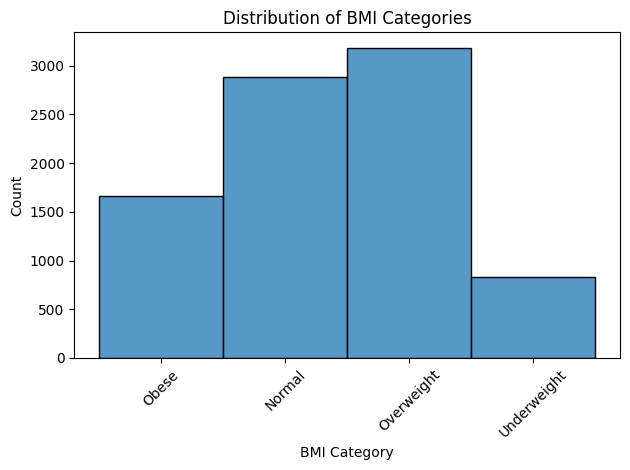

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='bmi', stat='count', discrete=True)
plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Optional: Rotate if labels are long
plt.tight_layout()
plt.show()


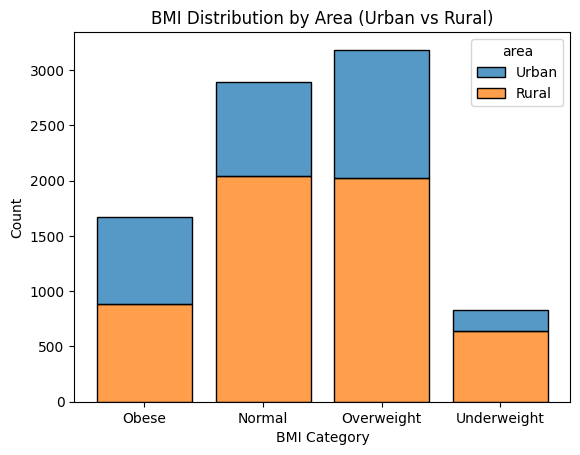

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='bmi', hue='area', multiple='stack', shrink=0.8)
plt.title('BMI Distribution by Area (Urban vs Rural)')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-8-2749002983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='edu', palette='Set2')


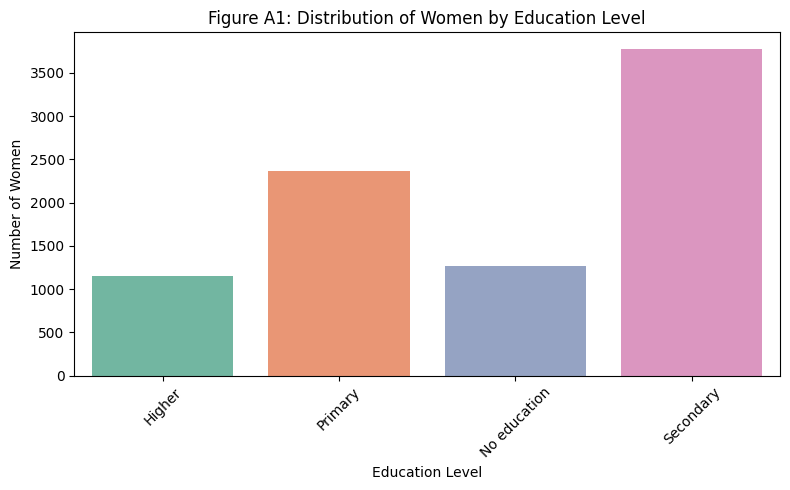

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='edu', palette='Set2')
plt.title('Figure A1: Distribution of Women by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Women')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


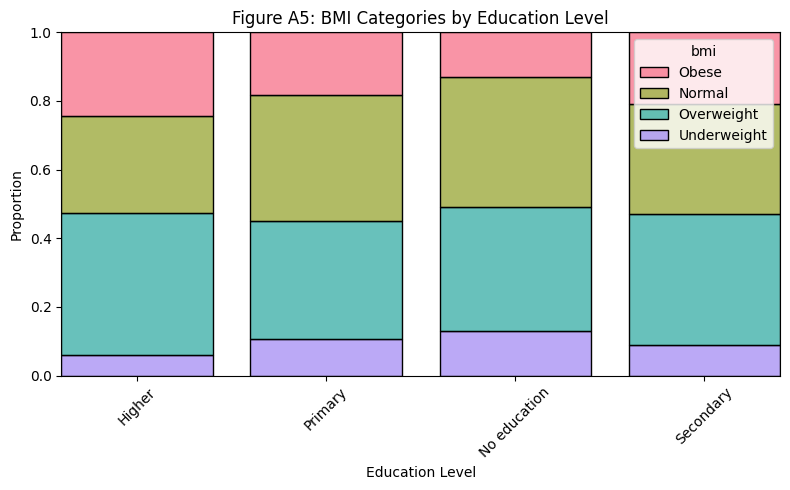

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='edu', hue='bmi', multiple='fill', shrink=0.8, palette='husl')
plt.title('Figure A5: BMI Categories by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


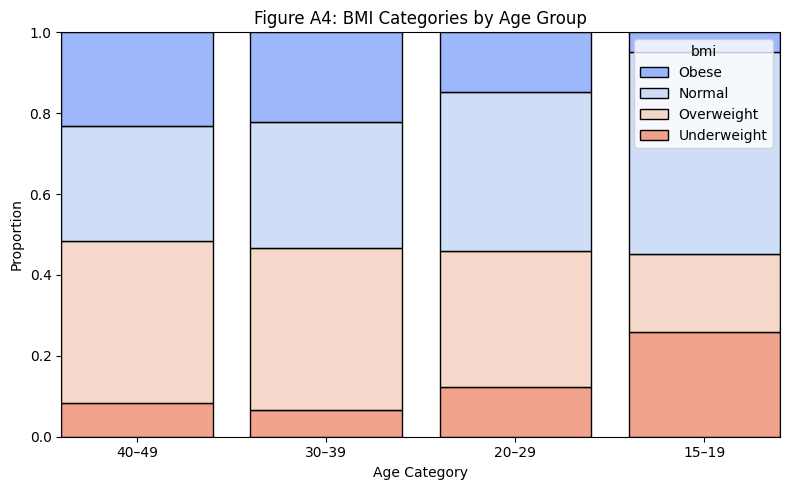

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age_cat', hue='bmi', multiple='fill', shrink=0.8, palette='coolwarm')
plt.title('Figure A4: BMI Categories by Age Group')
plt.xlabel('Age Category')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


🔍 Categorical Variables Detected: ['area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity', 'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media', 'husb_edu', 'hh_size', 'wealth', 'division', 'bmi']

📊 Frequency Counts and Percentages for: **area**
       Count  Percentage (%)
area                        
Urban   2987           34.86
Rural   5582           65.14


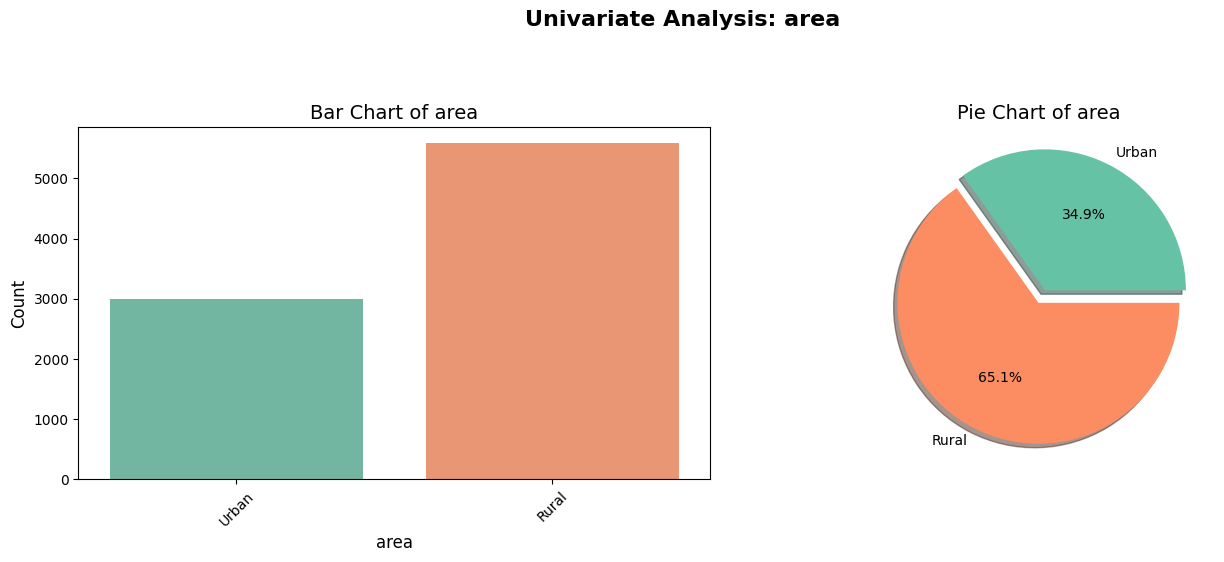


📊 Frequency Counts and Percentages for: **age_cat**
         Count  Percentage (%)
age_cat                       
15–19      347            4.05
20–29     2689           31.38
30–39     3177           37.08
40–49     2356           27.49


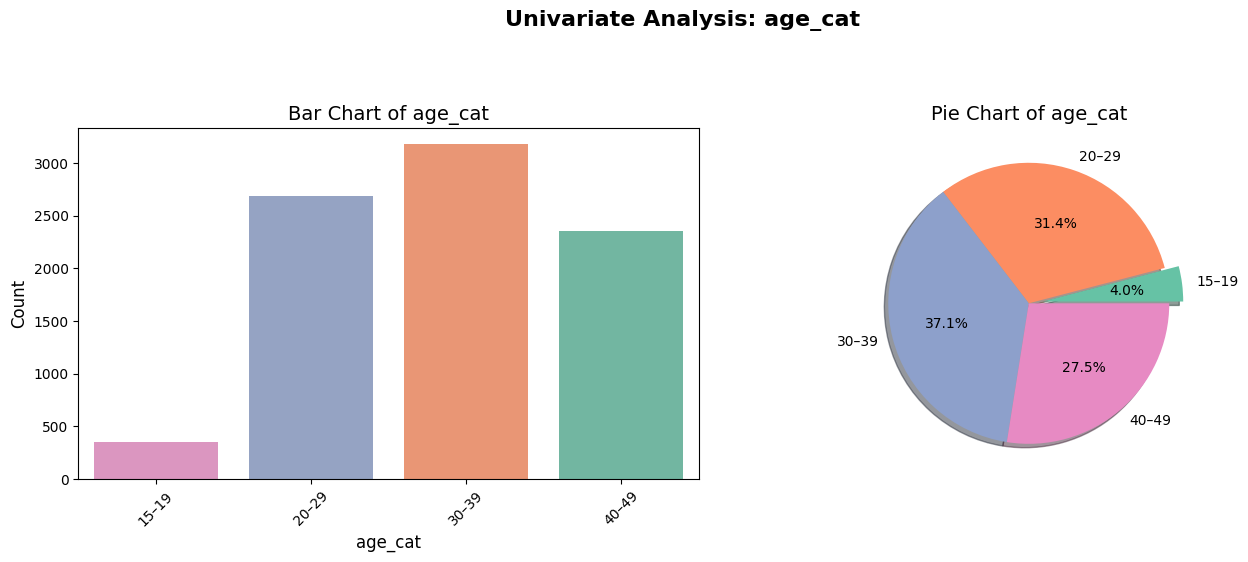


📊 Frequency Counts and Percentages for: **religion**
            Count  Percentage (%)
religion                         
Muslim       7671           89.52
Non-Muslim    898           10.48


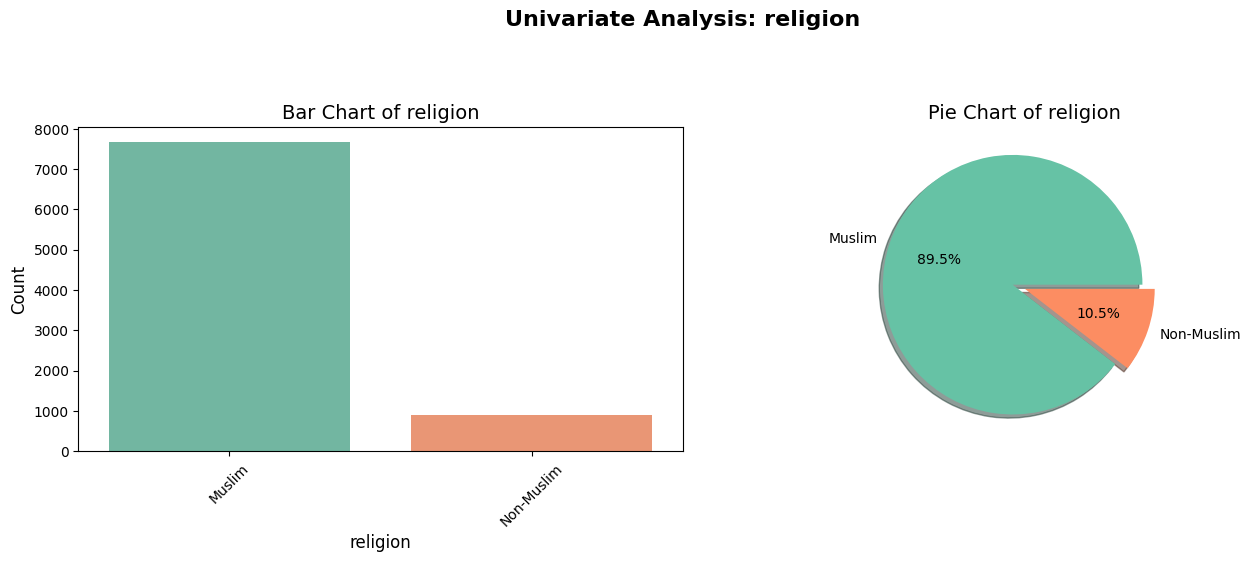


📊 Frequency Counts and Percentages for: **edu**
              Count  Percentage (%)
edu                                
No education   1269           14.81
Primary        2370           27.66
Secondary      3781           44.12
Higher         1149           13.41


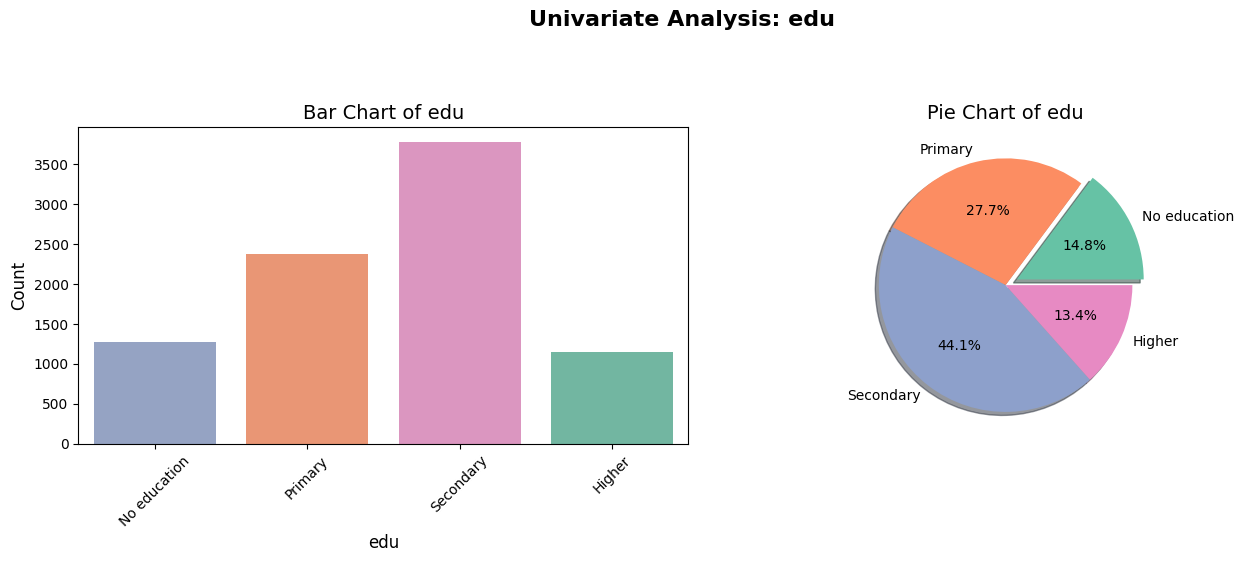


📊 Frequency Counts and Percentages for: **occup**
                  Count  Percentage (%)
occup                                  
Not working        5238           61.13
Agricultural       1898           22.15
Non-agricultural   1433           16.72


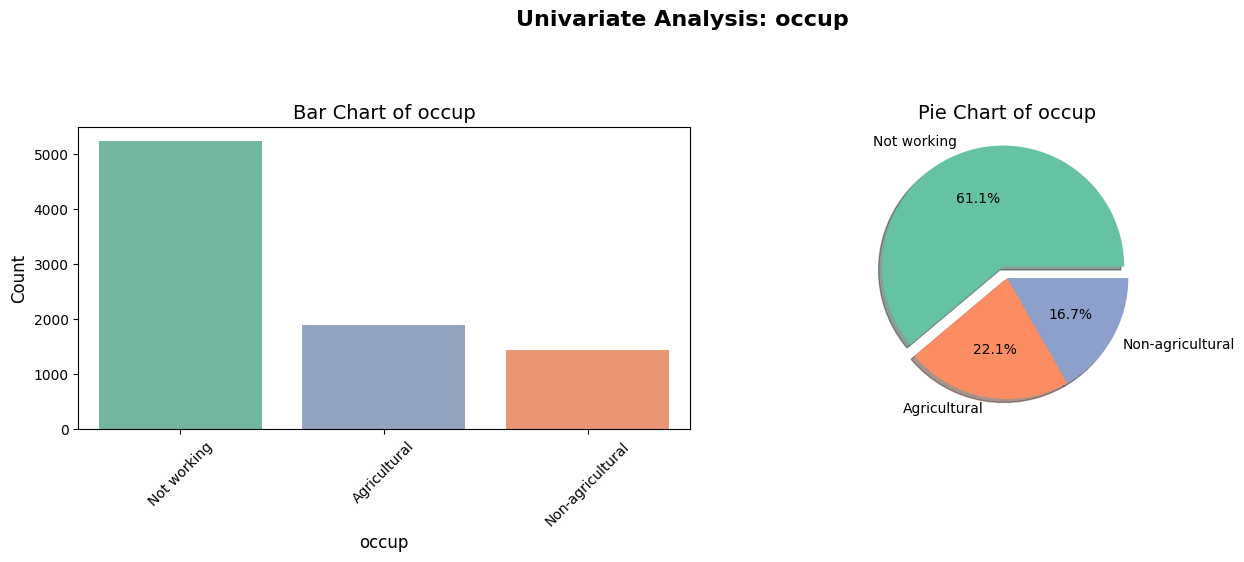


📊 Frequency Counts and Percentages for: **marriage_age**
              Count  Percentage (%)
marriage_age                       
<20 years      7277           84.92
≥20 years      1292           15.08


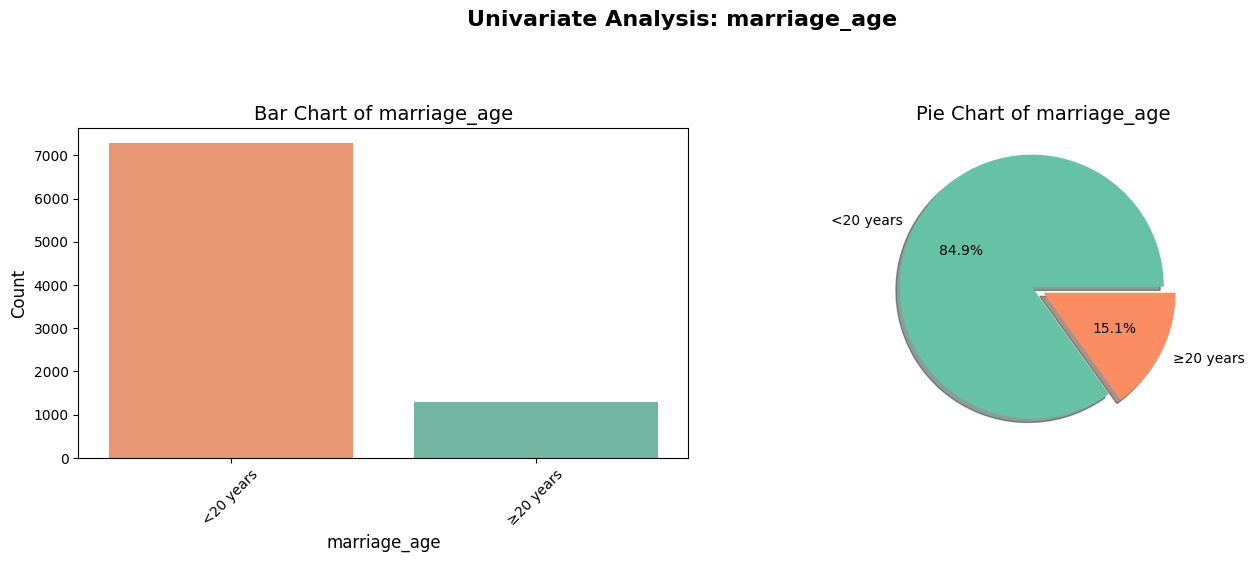


📊 Frequency Counts and Percentages for: **parity**
                    Count  Percentage (%)
parity                                   
No children            25            0.29
1–2 children         4903           57.22
3 or more children   3641           42.49


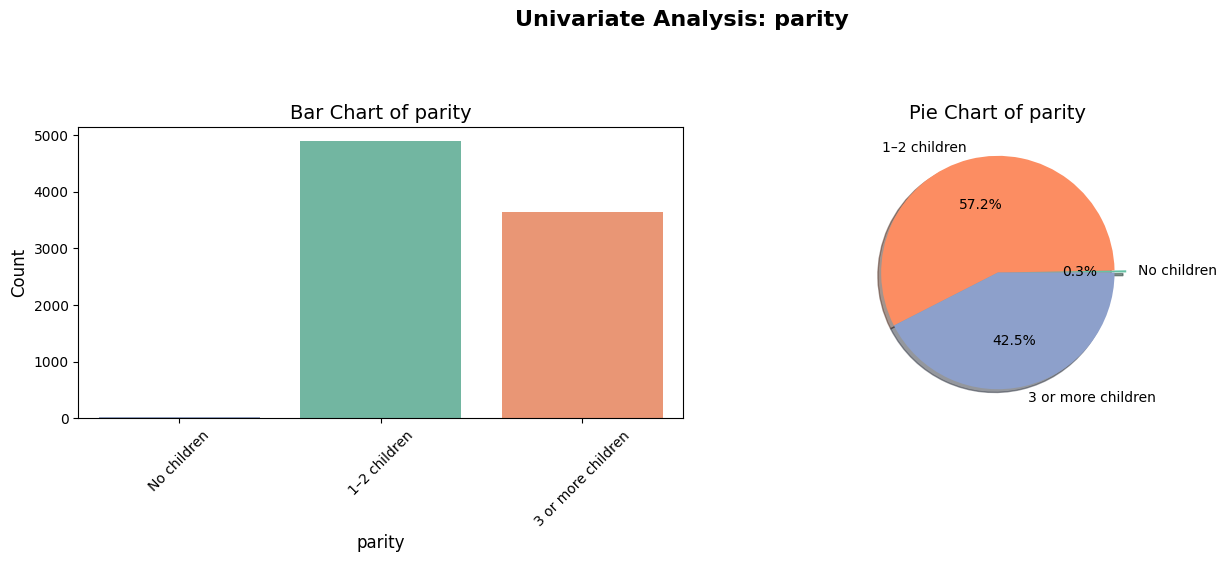


📊 Frequency Counts and Percentages for: **births_last5**
              Count  Percentage (%)
births_last5                       
No             4903           57.22
Yes            3666           42.78


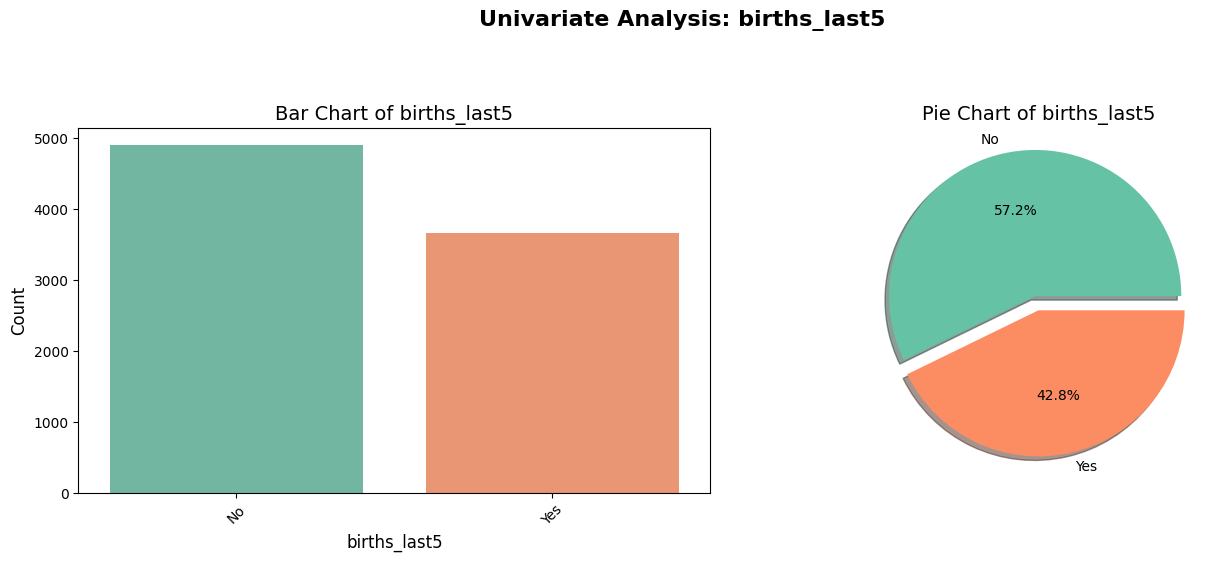


📊 Frequency Counts and Percentages for: **breastfeeding**
               Count  Percentage (%)
breastfeeding                       
No              6557           76.52
Yes             2012           23.48


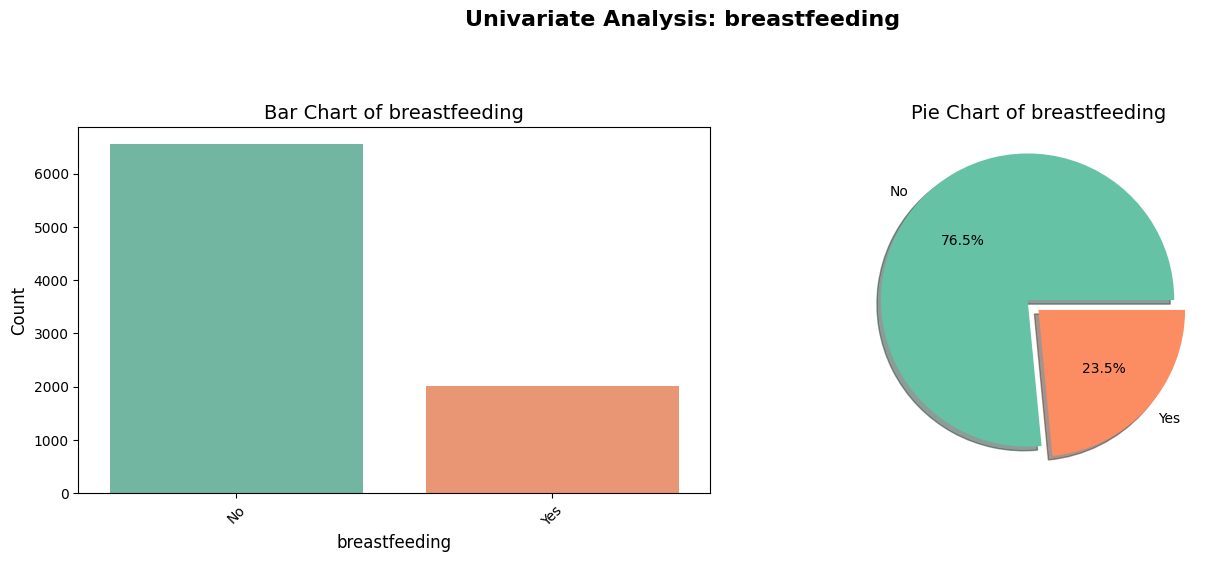


📊 Frequency Counts and Percentages for: **contraceptive**
               Count  Percentage (%)
contraceptive                       
Not using       3380           39.44
Pills           2759           32.20
Others          2430           28.36


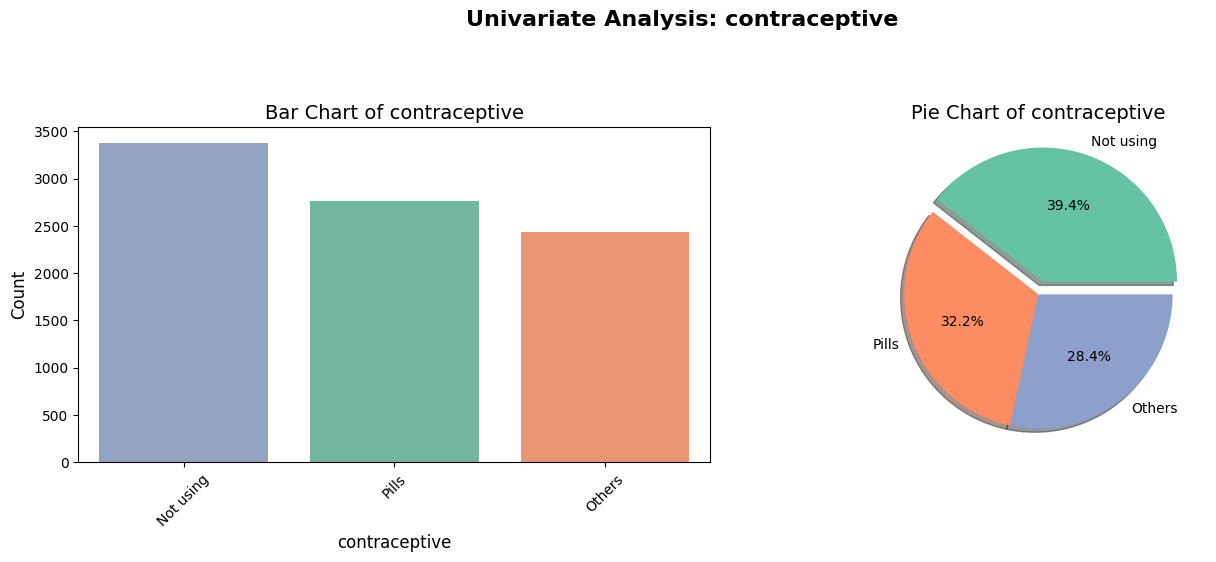


📊 Frequency Counts and Percentages for: **autonomy**
                 Count  Percentage (%)
autonomy                              
Not experienced   3386           39.51
Experienced       5183           60.49


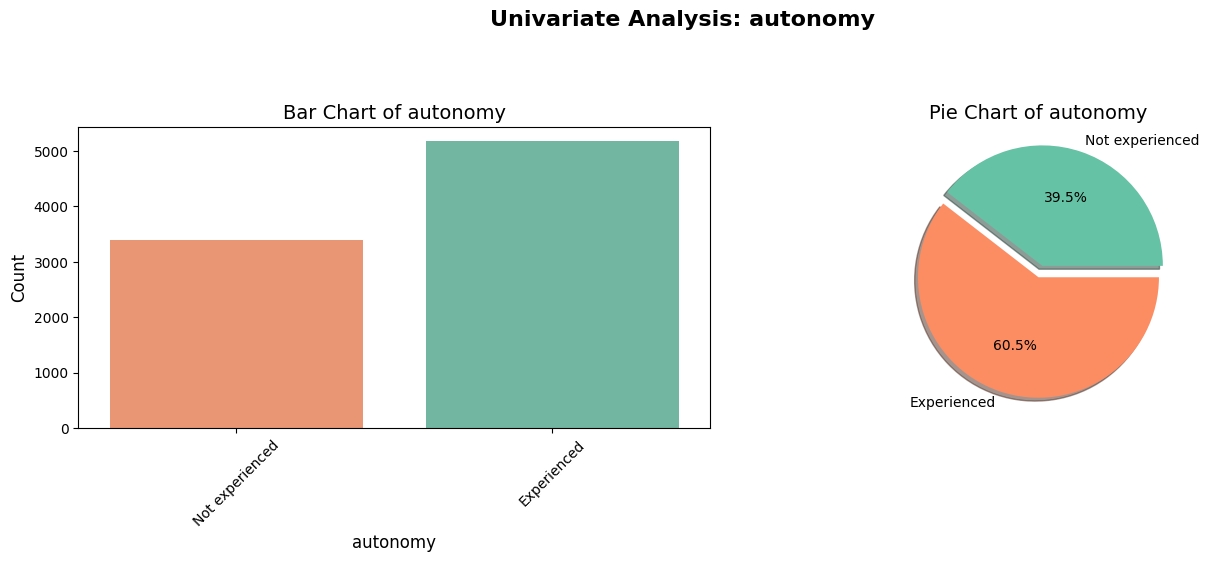


📊 Frequency Counts and Percentages for: **media**
            Count  Percentage (%)
media                            
Not at all   4954           57.81
Yes          3615           42.19


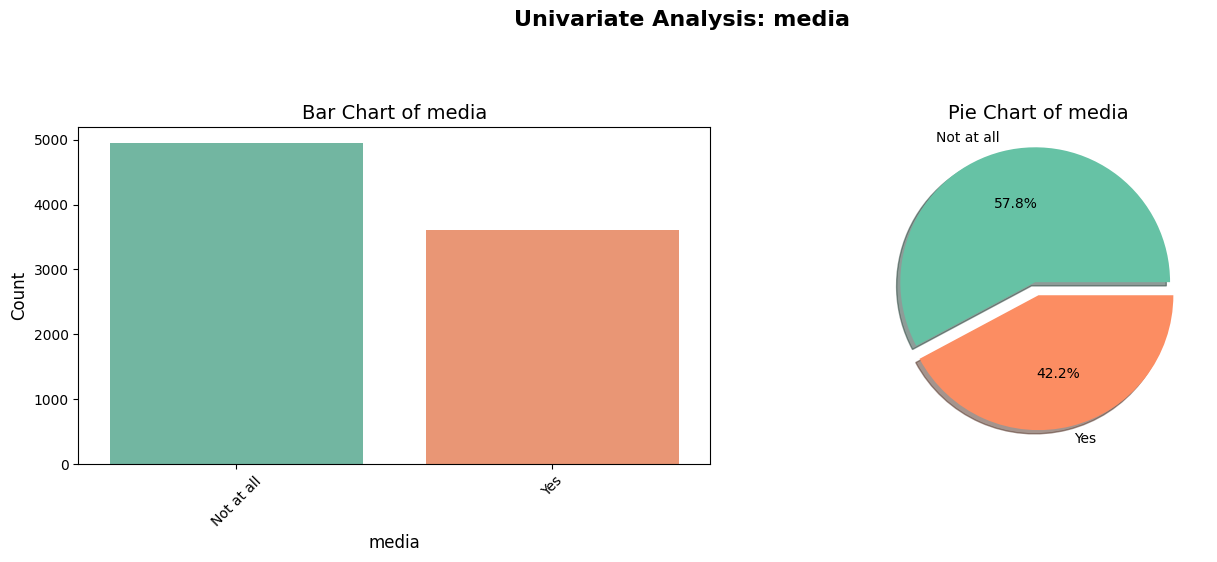


📊 Frequency Counts and Percentages for: **husb_edu**
              Count  Percentage (%)
husb_edu                           
No education   1979           23.09
Primary        2469           28.81
Secondary      2695           31.45
Higher         1426           16.64


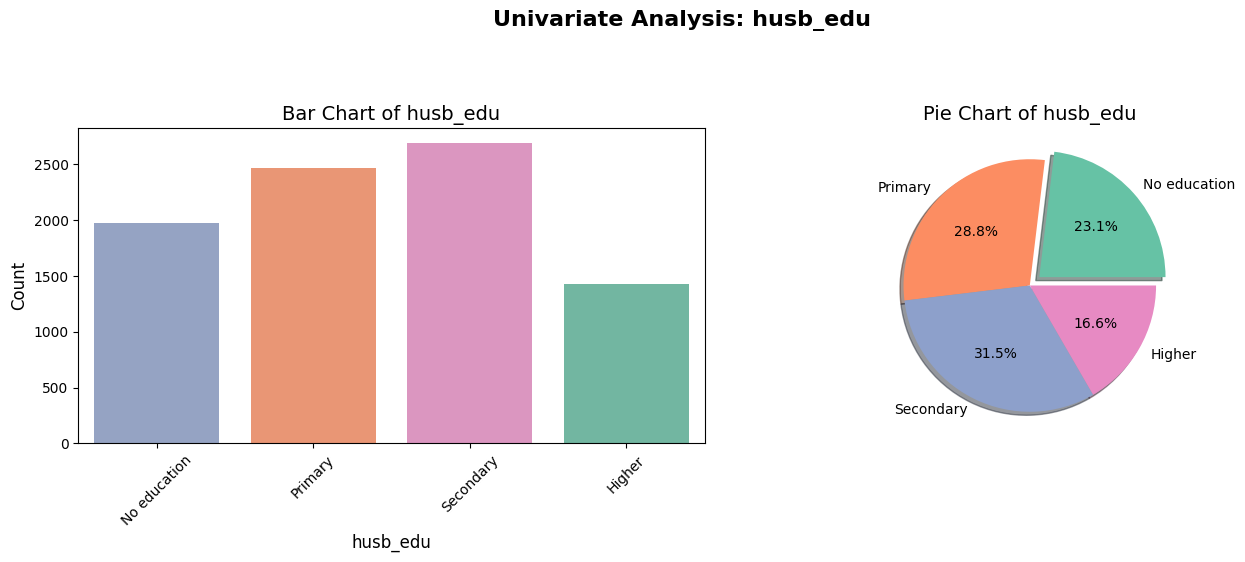


📊 Frequency Counts and Percentages for: **hh_size**
            Count  Percentage (%)
hh_size                          
<5 members   4016           46.87
≥5 members   4553           53.13


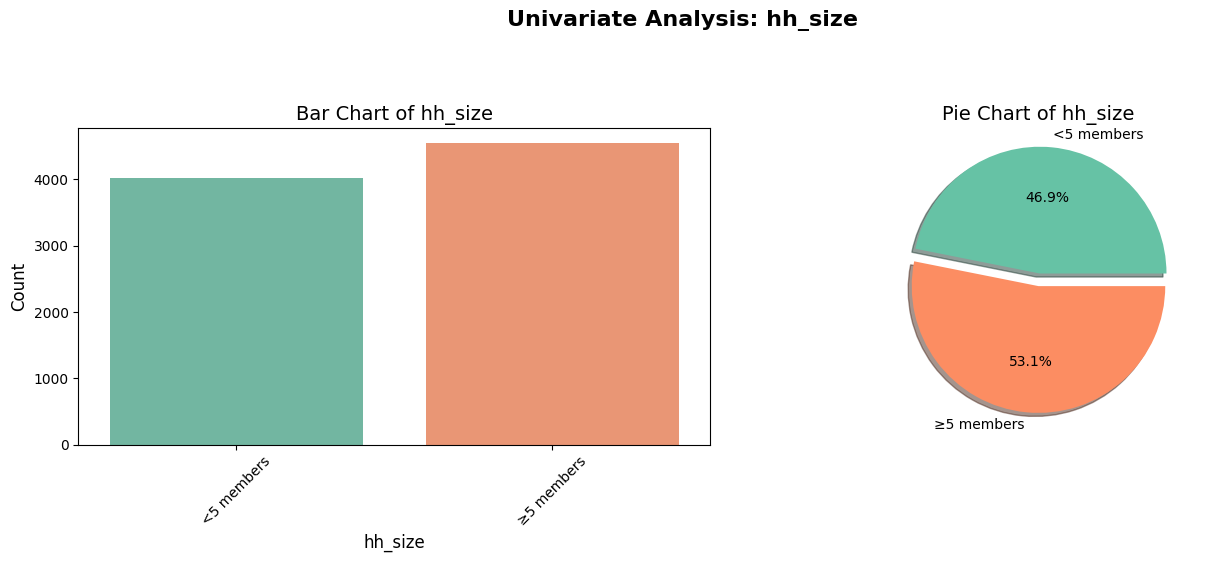


📊 Frequency Counts and Percentages for: **wealth**
         Count  Percentage (%)
wealth                        
Poorest   1586           18.51
Poorer    1642           19.16
Middle    1741           20.32
Richer    1762           20.56
Richest   1838           21.45


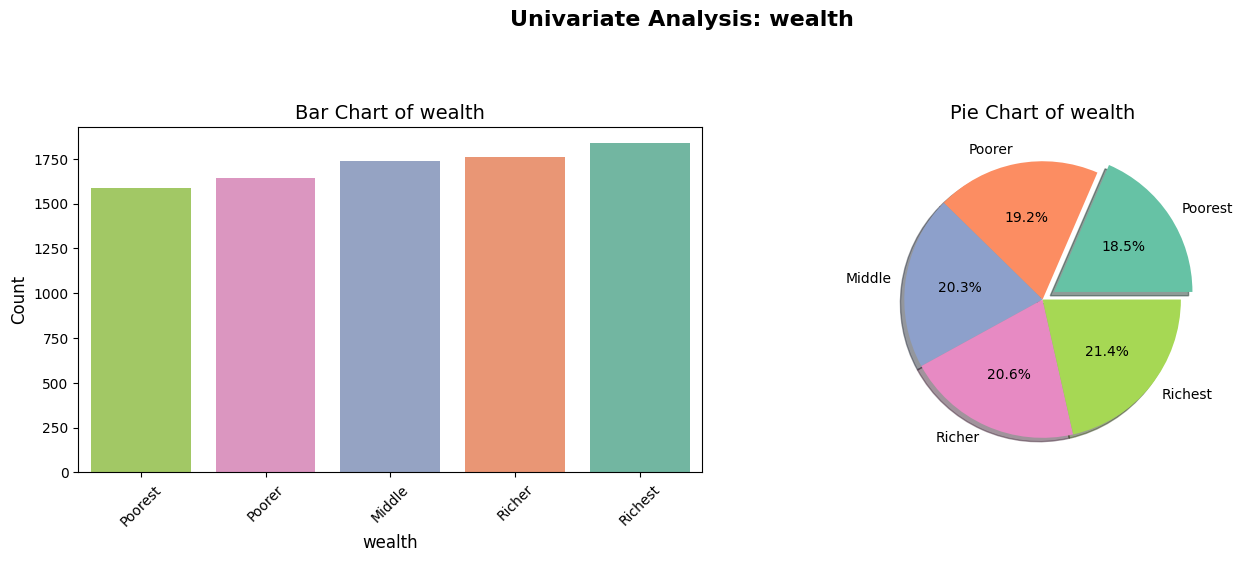


📊 Frequency Counts and Percentages for: **division**
            Count  Percentage (%)
division                         
Barisal       921           10.75
Chittagong   1271           14.83
Dhaka        1271           14.83
Khulna       1103           12.87
Rajshahi      929           10.84
Rangpur      1106           12.91
Sylhet       1054           12.30
Mymensingh    914           10.67


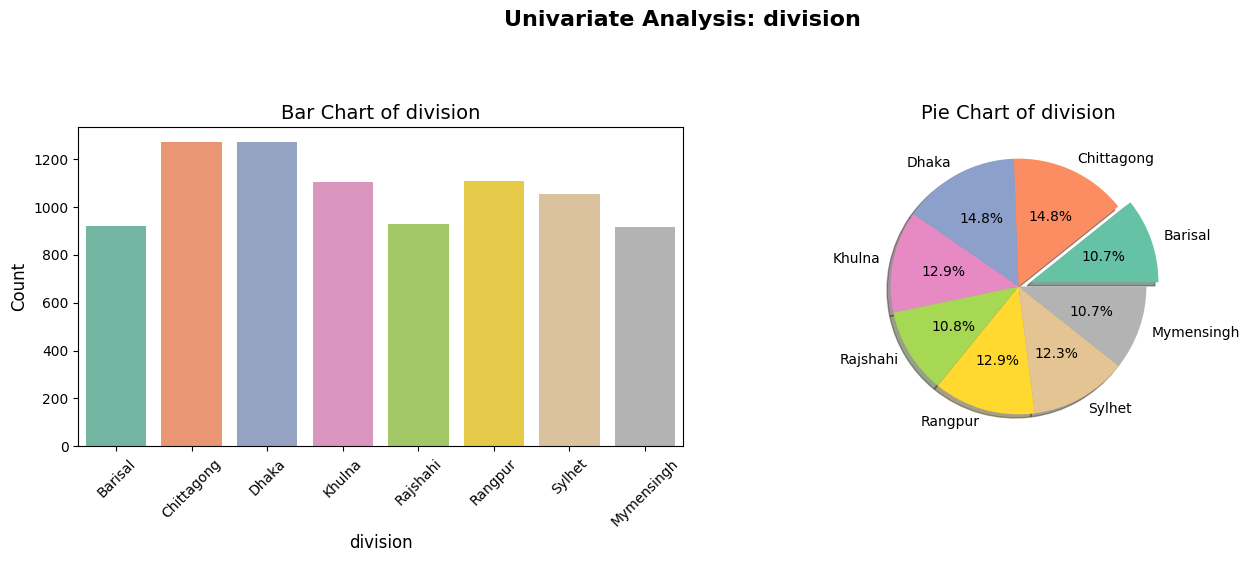


📊 Frequency Counts and Percentages for: **bmi**
             Count  Percentage (%)
bmi                               
Underweight    830            9.69
Normal        2888           33.70
Overweight    3184           37.16
Obese         1667           19.45


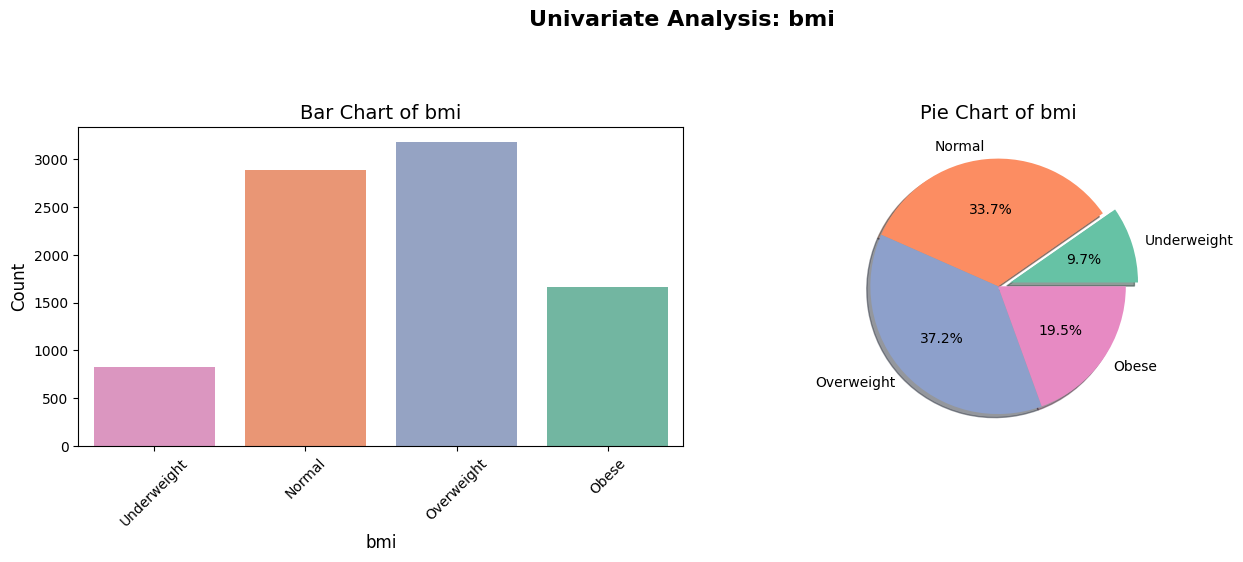

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your category orders dictionary first (reuse from earlier)
category_orders = {
    "age_cat": ["15–19", "20–29", "30–39", "40–49"],
    "religion":["Muslim", "Non-Muslim"],
    "bmi": ["Underweight", "Normal", "Overweight", "Obese"],
    "edu": ["No education", "Primary", "Secondary", "Higher"],
    "wealth": ["Poorest", "Poorer", "Middle", "Richer", "Richest"],
    "hh_size": ["<5 members", "≥5 members"],
    "parity": ["No children", "1–2 children", "3 or more children"],
    "marriage_age": ["<20 years", "≥20 years"],
    "births_last5": ["No", "Yes"],
    "breastfeeding": ["No", "Yes"],
    "contraceptive": ["Not using", "Pills", "Others"],
    "autonomy": ["Not experienced", "Experienced"],
    "media": ["Not at all", "Yes"],
    "area": ["Urban", "Rural"],
    "husb_edu": ["No education", "Primary", "Secondary", "Higher"],
    "division": ["Barisal", "Chittagong", "Dhaka", "Khulna",
                 "Rajshahi", "Rangpur", "Sylhet", "Mymensingh"],
    "occup": ["Not working", "Agricultural", "Non-agricultural"]
}

# Updated univariate categorical analysis function
def univariate_categorical(df, columns):
    for col in columns:
        print(f"\n📊 Frequency Counts and Percentages for: **{col}**")
        order = category_orders.get(col, sorted(df[col].dropna().unique()))

        freq = df[col].value_counts().reindex(order)
        perc = df[col].value_counts(normalize=True).reindex(order) * 100

        stats = pd.DataFrame({'Count': freq, 'Percentage (%)': perc.round(2)})
        print(stats)

        # Plot
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f'Univariate Analysis: {col}', fontsize=16, fontweight='bold')

        # Bar plot
        sns.countplot(x=col, data=df, order=order, hue=col, palette='Set2', ax=axes[0], legend=False)

        axes[0].set_title(f'Bar Chart of {col}', fontsize=14)
        axes[0].set_xlabel(col, fontsize=12)
        axes[0].set_ylabel('Count', fontsize=12)
        axes[0].tick_params(axis='x', rotation=45)

        # Pie plot
        explode = [0.1 if i == 0 else 0 for i in range(len(order))]
        df[col].value_counts().reindex(order).plot.pie(
            autopct='%1.1f%%',
            explode=explode,
            shadow=True,
            colors=sns.color_palette('Set2'),
            ax=axes[1]
        )
        axes[1].set_title(f'Pie Chart of {col}', fontsize=14)
        axes[1].set_ylabel('')

        plt.tight_layout(pad=2, rect=[0, 0.03, 1, 0.95])
        plt.show()

# Run for all categorical variables
cat_vars = df.select_dtypes(include=['object', 'category']).columns
print("🔍 Categorical Variables Detected:", list(cat_vars))
univariate_categorical(df, cat_vars)


In [ ]:
# Then do frequency count
freq_table = df['age_cat'].value_counts(normalize=False).reindex(["15–19", "20–29", "30–39", "40–49"])
percent_table = df['age_cat'].value_counts(normalize=True).reindex(["15–19", "20–29", "30–39", "40–49"]) * 100

# Combine into a table
summary = pd.DataFrame({
    "Count": freq_table,
    "Percentage (%)": percent_table.round(2)
})

print(summary)

         Count  Percentage (%)
age_cat                       
15–19      347            4.05
20–29     2689           31.38
30–39     3177           37.08
40–49     2356           27.49


In [ ]:

category_orders = {
    "age_cat": ["15–19", "20–29", "30–39", "40–49"],
    "religion":["Muslim", "Non-Muslim"],
    "bmi": ["Underweight", "Normal", "Overweight", "Obese"],
    "edu": ["No education", "Primary", "Secondary", "Higher"],
    "wealth": ["Poorest", "Poorer", "Middle", "Richer", "Richest"],
    "hh_size": ["<5 members", "≥5 members"],
    "parity": ["No children", "1–2 children", "3 or more children"],
    "marriage_age": ["<20 years", "≥20 years"],
    "births_last5": ["No", "Yes"],
    "breastfeeding": ["No", "Yes"],
    "contraceptive": ["Not using", "Pills", "Others"],
    "autonomy": ["Not experienced", "Experienced"],
    "media": ["Not at all", "Yes"],
    "area": ["Urban", "Rural"],
    "husb_edu": ["No education", "Primary", "Secondary", "Higher"],
    "division": ["Barisal", "Chittagong", "Dhaka", "Khulna",
                 "Rajshahi", "Rangpur", "Sylhet", "Mymensingh"],
    "occup": ["Not working", "Agricultural", "Non-agricultural"]
}

# Apply ordering to each column
for col, order in category_orders.items():
    if col in df.columns:
        df[col] = pd.Categorical(df[col], categories=order, ordered=True)


In [ ]:
# Example: Count and Percentage for any categorical column
def freq_table(col):
    freq = df[col].value_counts(dropna=False).reindex(category_orders[col])
    pct = df[col].value_counts(normalize=True, dropna=False).reindex(category_orders[col]) * 100
    return pd.DataFrame({"Count": freq, "Percentage (%)": pct.round(2)})

# Example usage:
print(freq_table("age_cat"))
print(freq_table("bmi"))
print(freq_table("religion"))
print(freq_table("division"))


         Count  Percentage (%)
age_cat                       
15–19      347            4.05
20–29     2689           31.38
30–39     3177           37.08
40–49     2356           27.49
             Count  Percentage (%)
bmi                               
Underweight    830            9.69
Normal        2888           33.70
Overweight    3184           37.16
Obese         1667           19.45
            Count  Percentage (%)
religion                         
Muslim       7671           89.52
Non-Muslim    898           10.48
            Count  Percentage (%)
division                         
Barisal       921           10.75
Chittagong   1271           14.83
Dhaka        1271           14.83
Khulna       1103           12.87
Rajshahi      929           10.84
Rangpur      1106           12.91
Sylhet       1054           12.30
Mymensingh    914           10.67


In [ ]:
# Prevalence of BMI by area
for grp in ['Urban', 'Rural']:
    print(f"\n📊 BMI Distribution in {grp}:")
    temp = df[df['area'] == grp]

    # Frequency and percentage
    freq = temp['bmi'].value_counts().reindex(category_orders['bmi'])
    perc = temp['bmi'].value_counts(normalize=True).reindex(category_orders['bmi']) * 100

    summary = pd.DataFrame({
        'Count': freq,
        'Percentage (%)': perc.round(2)
    })
    print(summary)

# Overall distribution
print("\n📊 BMI Distribution Overall:")
freq_all = df['bmi'].value_counts().reindex(category_orders['bmi'])
perc_all = df['bmi'].value_counts(normalize=True).reindex(category_orders['bmi']) * 100

summary_all = pd.DataFrame({
    'Count': freq_all,
    'Percentage (%)': perc_all.round(2)
})
print(summary_all)



📊 BMI Distribution in Urban:
             Count  Percentage (%)
bmi                               
Underweight    192            6.43
Normal         845           28.29
Overweight    1164           38.97
Obese          786           26.31

📊 BMI Distribution in Rural:
             Count  Percentage (%)
bmi                               
Underweight    638           11.43
Normal        2043           36.60
Overweight    2020           36.19
Obese          881           15.78

📊 BMI Distribution Overall:
             Count  Percentage (%)
bmi                               
Underweight    830            9.69
Normal        2888           33.70
Overweight    3184           37.16
Obese         1667           19.45


In [ ]:
df.columns

Index(['area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
       'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
       'husb_edu', 'hh_size', 'wealth', 'division', 'bmi'],
      dtype='object')

In [ ]:
def generate_table1(df, group_var='area', weight_var=None):
    table1 = []

    # Variables to include in Table 1
    vars_to_tabulate = ['age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
    'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
    'husb_edu', 'hh_size', 'wealth', 'division']  # add more if needed

    # Categories for each variable (ordered labels)
    for var in vars_to_tabulate:
        levels = category_orders[var]

        for level in levels:
            row = {'Variable': var, 'Category': level}

            for grp in ['Urban', 'Rural']:
                sub = df[df[group_var] == grp]
                total = sub.shape[0]
                count = (sub[var] == level).sum()
                percent = round((count / total) * 100, 1)
                row[f"{grp} (n={total})"] = f"{count} ({percent}%)"

            # Overall
            total_all = df.shape[0]
            count_all = (df[var] == level).sum()
            percent_all = round((count_all / total_all) * 100, 1)
            row[f"Overall (n={total_all})"] = f"{count_all} ({percent_all}%)"

            table1.append(row)

    return pd.DataFrame(table1)


In [ ]:
table1_df = generate_table1(df)
print(table1_df)


         Variable            Category Urban (n=2987) Rural (n=5582)  \
0         age_cat               15–19     108 (3.6%)     239 (4.3%)   
1         age_cat               20–29    879 (29.4%)   1810 (32.4%)   
2         age_cat               30–39   1150 (38.5%)   2027 (36.3%)   
3         age_cat               40–49    850 (28.5%)   1506 (27.0%)   
4        religion              Muslim   2617 (87.6%)   5054 (90.5%)   
5        religion          Non-Muslim    370 (12.4%)     528 (9.5%)   
6             edu        No education    374 (12.5%)    895 (16.0%)   
7             edu             Primary    698 (23.4%)   1672 (30.0%)   
8             edu           Secondary   1274 (42.7%)   2507 (44.9%)   
9             edu              Higher    641 (21.5%)     508 (9.1%)   
10          occup         Not working   1978 (66.2%)   3260 (58.4%)   
11          occup        Agricultural     255 (8.5%)   1643 (29.4%)   
12          occup    Non-agricultural    754 (25.2%)    679 (12.2%)   
13   m

In [ ]:
table1_df

Variable            Category Urban (n=2987) Rural (n=5582)  \
0         age_cat               15–19     108 (3.6%)     239 (4.3%)   
1         age_cat               20–29    879 (29.4%)   1810 (32.4%)   
2         age_cat               30–39   1150 (38.5%)   2027 (36.3%)   
3         age_cat               40–49    850 (28.5%)   1506 (27.0%)   
4        religion              Muslim   2617 (87.6%)   5054 (90.5%)   
5        religion          Non-Muslim    370 (12.4%)     528 (9.5%)   
6             edu        No education    374 (12.5%)    895 (16.0%)   
7             edu             Primary    698 (23.4%)   1672 (30.0%)   
8             edu           Secondary   1274 (42.7%)   2507 (44.9%)   
9             edu              Higher    641 (21.5%)     508 (9.1%)   
10          occup         Not working   1978 (66.2%)   3260 (58.4%)   
11          occup        Agricultural     255 (8.5%)   1643 (29.4%)   
12          occup    Non-agricultural    754 (25.2%)    679 (12.2%)   
13   marriage_age           <20 years   2363 (79.1%)   4914 (88.0%)   
14   marriage_age           ≥20 years    624 (20.9%)    668 (12.0%)   
15         parity         No children       3 (0.1%)      22 (0.4%)   
16         parity        1–2 children   1769 (59.2%)   3134 (56.1%)   
17         parity  3 or more children   1215 (40.7%)   2426 (43.5%)   
18   births_last5                  No   1769 (59.2%)   3134 (56.1%)   
19   births_last5                 Yes   1218 (40.8%)   2448 (43.9%)   
20  breastfeeding                  No   2341 (78.4%)   4216 (75.5%)   
21  breastfeeding                 Yes    646 (21.6%)   1366 (24.5%)   
22  contraceptive           Not using   1278 (42.8%)   2102 (37.7%)   
23  contraceptive               Pills    897 (30.0%)   1862 (33.4%)   
24  contraceptive              Others    812 (27.2%)   1618 (29.0%)   
25       autonomy     Not experienced   1141 (38.2%)   2245 (40.2%)   
26       autonomy         Experienced   1846 (61.8%)   3337 (59.8%)   
27          media          Not at all   2167 (72.5%)   2787 (49.9%)   
28          media                 Yes    820 (27.5%)   2795 (50.1%)   
29       husb_edu        No education    520 (17.4%)   1459 (26.1%)   
30       husb_edu             Primary    728 (24.4%)   1741 (31.2%)   
31       husb_edu           Secondary    956 (32.0%)   1739 (31.2%)   
32       husb_edu              Higher    783 (26.2%)    643 (11.5%)   
33        hh_size          <5 members   1495 (50.1%)   2521 (45.2%)   
34        hh_size          ≥5 members   1492 (49.9%)   3061 (54.8%)   
35         wealth             Poorest     173 (5.8%)   1413 (25.3%)   
36         wealth              Poorer    305 (10.2%)   1337 (24.0%)   
37         wealth              Middle    542 (18.1%)   1199 (21.5%)   
38         wealth              Richer    751 (25.1%)   1011 (18.1%)   
39         wealth             Richest   1216 (40.7%)    622 (11.1%)   
40       division             Barisal    306 (10.2%)    615 (11.0%)   
41       division          Chittagong    536 (17.9%)    735 (13.2%)   
42       division               Dhaka    616 (20.6%)    655 (11.7%)   
43       division              Khulna    346 (11.6%)    757 (13.6%)   
44       division            Rajshahi     209 (7.0%)    720 (12.9%)   
45       division             Rangpur    387 (13.0%)    719 (12.9%)   
46       division              Sylhet     286 (9.6%)    768 (13.8%)   
47       division          Mymensingh    301 (10.1%)    613 (11.0%)   

   Overall (n=8569)  
0        347 (4.0%)  
1      2689 (31.4%)  
2      3177 (37.1%)  
3      2356 (27.5%)  
4      7671 (89.5%)  
5       898 (10.5%)  
6      1269 (14.8%)  
7      2370 (27.7%)  
8      3781 (44.1%)  
9      1149 (13.4%)  
10     5238 (61.1%)  
11     1898 (22.1%)  
12     1433 (16.7%)  
13     7277 (84.9%)  
14     1292 (15.1%)  
15        25 (0.3%)  
16     4903 (57.2%)  
17     3641 (42.5%)  
18     4903 (57.2%)  
19     3666 (42.8%)  
20     6557 (76.5%)  
21     2012 (23.5%)  
22     3380 (39.4%)  
2

In [ ]:
cat_vars = [
    'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
    'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
    'husb_edu', 'hh_size', 'wealth', 'division'
]

In [ ]:
def table2_bmi_prevalence(df, bmi_var='bmi', group_var='area'):
    groups = df[group_var].cat.categories.tolist() + ['Overall']
    results = []
    total = df.shape[0]

    for group in groups:
        if group == 'Overall':
            temp = df
        else:
            temp = df[df[group_var] == group]

        n = temp.shape[0]
        freq = temp[bmi_var].value_counts().reindex(df[bmi_var].cat.categories).fillna(0).astype(int)
        perc = (freq / n * 100).round(2)
        df_temp = pd.DataFrame({
            'Area': group,
            'BMI_Category': freq.index,
            'Count': freq.values,
            'Percent': perc.values
        })
        results.append(df_temp)

    return pd.concat(results)

table2 = table2_bmi_prevalence(df)

print("Table 2 - BMI Prevalence by Area:")
print(table2)

Table 2 - BMI Prevalence by Area:
      Area BMI_Category  Count  Percent
0    Urban  Underweight    192     6.43
1    Urban       Normal    845    28.29
2    Urban   Overweight   1164    38.97
3    Urban        Obese    786    26.31
0    Rural  Underweight    638    11.43
1    Rural       Normal   2043    36.60
2    Rural   Overweight   2020    36.19
3    Rural        Obese    881    15.78
0  Overall  Underweight    830     9.69
1  Overall       Normal   2888    33.70
2  Overall   Overweight   3184    37.16
3  Overall        Obese   1667    19.45


In [ ]:
# 3. Table 3: Bivariate analysis (Chi-square) between background vars and BMI
# -----------------------

from scipy.stats import chi2_contingency

def bivariate_chisq(df, cat_vars, outcome='bmi'):
    chi2_results = []
    for var in cat_vars:
        # Contingency table
        ct = pd.crosstab(df[var], df[outcome])
        chi2, p, dof, ex = chi2_contingency(ct)
        chi2_results.append({'Variable': var, 'Chi2': chi2, 'p-value': p})
    return pd.DataFrame(chi2_results)

biv_results = bivariate_chisq(df, cat_vars)

print("Table 3 - Chi-square tests between Background Variables and BMI:")
print(biv_results)

Table 3 - Chi-square tests between Background Variables and BMI:
         Variable        Chi2        p-value
0         age_cat  376.165827   1.656993e-75
1        religion    4.108411   2.499931e-01
2             edu  117.669241   4.005695e-21
3           occup   59.020954   7.113723e-11
4    marriage_age   13.093089   4.439559e-03
5          parity  219.686791   1.213513e-44
6    births_last5  216.785433   9.944572e-47
7   breastfeeding  281.326332   1.093564e-60
8   contraceptive   28.954471   6.205581e-05
9        autonomy   22.342507   5.535630e-05
10          media  208.817555   5.244845e-45
11       husb_edu  200.468806   2.642063e-38
12        hh_size   30.080921   1.327011e-06
13         wealth  714.069675  4.287652e-145
14       division  191.412851   1.756676e-29


In [ ]:
df.columns

Index(['area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
       'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
       'husb_edu', 'hh_size', 'wealth', 'division', 'bmi'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint

# Step 1: Define BMI and categorical variables
df['bmi'] = pd.Categorical(df['bmi'],
                           categories=['Underweight', 'Normal', 'Overweight', 'Obese'],
                           ordered=True)
df['area'] = df['area'].astype('category')

# Define the background variables you want to analyze
background_vars = ['age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
       'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
       'husb_edu', 'hh_size', 'wealth', 'division']  # You can add more variables like 'wealth', 'husb_edu'
bmi_levels = ['Underweight',  'Normal', 'Overweight', 'Obese']

# Step 2: Convert background variables to categorical
for col in background_vars:
    df[col] = df[col].astype('category')

# Step 3: Function to calculate prevalence with CI
def calc_prevalence_ci(data, outcome, level, alpha=0.05):
    total = len(data)
    count = (data[outcome] == level).sum()
    if total == 0:
        return "NA"
    ci_low, ci_upp = proportion_confint(count, total, alpha=alpha, method='wilson')
    percent = count / total * 100
    return f"{percent:.1f}% [{ci_low*100:.1f}, {ci_upp*100:.1f}]"

# Step 4: Wrapper function to create table
def prevalence_table(df, strata_col, outcome_col, background_vars, outcome_levels):
    tables = {}
    strata_values = df[strata_col].unique().tolist() + ['Overall']

    for var in background_vars:
        rows = []
        categories = df[var].cat.categories
        for cat in categories:
            row = [cat]
            for strat in strata_values:
                if strat == 'Overall':
                    subset = df[df[var] == cat]
                else:
                    subset = df[(df[var] == cat) & (df[strata_col] == strat)]
                for level in outcome_levels:
                    result = calc_prevalence_ci(subset, outcome_col, level)
                    row.append(result)
            rows.append(row)

        # Column naming
        columns = ['Category']
        for strat in strata_values:
            for level in outcome_levels:
                columns.append(f"{strat} - {level}")

        tables[var] = pd.DataFrame(rows, columns=columns)

    return tables

# Step 5: Generate the tables
result_tables = prevalence_table(df, strata_col='area', outcome_col='bmi',
                                 background_vars=background_vars,
                                 outcome_levels=bmi_levels)

# Step 6: Example - Display table for age_cat
print("Table 2: Prevalence of Malnutrition by Age Group")
display(result_tables['age_cat'])  # Replace with 'religion' or 'edu' as needed


Table 2: Prevalence of Malnutrition by Age Group


Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0    15–19  19.4% [13.1, 27.9]  52.8% [43.4, 61.9]  20.4% [13.9, 28.9]   
1    20–29    8.8% [7.1, 10.8]  34.4% [31.3, 37.6]  37.3% [34.2, 40.6]   
2    30–39     4.6% [3.5, 6.0]  26.0% [23.5, 28.6]  41.0% [38.1, 43.8]   
3    40–49     4.8% [3.6, 6.5]  22.0% [19.3, 24.9]  40.4% [37.1, 43.7]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0    7.4% [3.8, 13.9]  28.9% [23.5, 34.9]  48.5% [42.3, 54.8]   
1  19.6% [17.1, 22.3]  14.1% [12.6, 15.8]  41.8% [39.5, 44.1]   
2  28.4% [25.9, 31.1]     7.8% [6.8, 9.1]  33.8% [31.8, 35.9]   
3  32.8% [29.8, 36.1]   10.3% [8.9, 11.9]  32.2% [29.9, 34.6]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  18.8% [14.4, 24.3]     3.8% [2.0, 7.0]    25.9% [21.6, 30.8]   
1  31.8% [29.7, 33.9]  12.4% [10.9, 14.0]    12.3% [11.2, 13.6]   
2  39.5% [37.4, 41.7]  18.8% [17.2, 20.6]       6.7% [5.9, 7.6]   
3  39.8% [37.3, 42.3]  17.7% [15.9, 19.7]       8.3% [7.3, 9.5]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  49.9% [44.6, 55.1]   19.3% [15.5, 23.8]     4.9% [3.1, 7.7]  
1  39.3% [37.5, 41.2]   33.6% [31.8, 35.4]  14.7% [13.4, 16.1]  
2  31.0% [29.4, 32.6]   40.0% [38.3, 41.8]  22.3% [20.9, 23.8]  
3  28.5% [26.7, 30.4]   40.0% [38.0, 42.0]  23.2% [21.5, 24.9]

In [ ]:
display(result_tables['religion'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0      Muslim     6.5% [5.6, 7.5]  28.3% [26.6, 30.0]  38.9% [37.1, 40.8]   
1  Non-Muslim     5.9% [4.0, 8.8]  28.4% [24.0, 33.2]  39.2% [34.4, 44.3]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  26.3% [24.6, 28.0]  11.4% [10.6, 12.3]  36.6% [35.2, 37.9]   
1  26.5% [22.2, 31.2]   11.4% [8.9, 14.4]  36.9% [32.9, 41.1]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  35.8% [34.4, 37.1]  16.2% [15.3, 17.3]      9.8% [9.1, 10.4]   
1  40.3% [36.2, 44.6]   11.4% [8.9, 14.4]      9.1% [7.4, 11.2]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  33.7% [32.7, 34.8]   36.8% [35.8, 37.9]  19.7% [18.8, 20.6]  
1  33.4% [30.4, 36.6]   39.9% [36.7, 43.1]  17.6% [15.2, 20.2]

In [ ]:
display(result_tables['edu'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0        Higher     4.1% [2.8, 5.9]  23.6% [20.4, 27.0]  44.5% [40.7, 48.3]   
1  No education    9.4% [6.8, 12.7]  34.8% [30.1, 39.7]  33.7% [29.1, 38.6]   
2       Primary     6.6% [5.0, 8.7]  35.7% [32.2, 39.3]  34.0% [30.5, 37.5]   
3     Secondary     6.7% [5.4, 8.2]  24.7% [22.4, 27.2]  40.5% [37.8, 43.2]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  27.9% [24.6, 31.5]    8.7% [6.5, 11.4]  34.1% [30.1, 38.3]   
1  22.2% [18.3, 26.7]  14.6% [12.5, 17.1]  39.0% [35.9, 42.2]   
2  23.8% [20.8, 27.1]  12.4% [10.9, 14.1]  37.0% [34.7, 39.3]   
3  28.1% [25.7, 30.6]   10.2% [9.0, 11.4]  36.0% [34.2, 37.9]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  37.4% [33.3, 41.7]  19.9% [16.6, 23.6]       6.1% [4.9, 7.6]   
1  37.2% [34.1, 40.4]    9.2% [7.4, 11.2]    13.1% [11.3, 15.0]   
2  34.5% [32.3, 36.8]  16.1% [14.4, 17.9]     10.7% [9.5, 12.0]   
3  36.7% [34.8, 38.6]  17.1% [15.7, 18.6]       9.0% [8.1, 9.9]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  28.2% [25.7, 30.9]   41.3% [38.5, 44.2]  24.4% [22.0, 26.9]  
1  37.7% [35.1, 40.4]   36.2% [33.6, 38.9]  13.0% [11.3, 15.0]  
2  36.6% [34.7, 38.5]   34.3% [32.5, 36.3]  18.4% [16.8, 20.0]  
3  32.2% [30.7, 33.7]   38.0% [36.4, 39.5]  20.8% [19.6, 22.1]

In [ ]:
display(result_tables['occup'])

Category Urban - Underweight      Urban - Normal  \
0      Agricultural    8.6% [5.8, 12.7]  31.4% [26.0, 37.3]   
1  Non-agricultural     6.2% [4.7, 8.2]  29.3% [26.2, 32.7]   
2       Not working     6.2% [5.2, 7.4]  27.5% [25.6, 29.5]   

   Urban - Overweight       Urban - Obese Rural - Underweight  \
0  40.4% [34.6, 46.5]  19.6% [15.2, 24.9]   10.9% [9.5, 12.5]   
1  40.2% [36.7, 43.7]  24.3% [21.3, 27.5]    8.8% [6.9, 11.2]   
2  38.3% [36.2, 40.5]  28.0% [26.0, 30.0]  12.2% [11.2, 13.4]   

       Rural - Normal  Rural - Overweight       Rural - Obese  \
0  38.2% [35.9, 40.6]  37.6% [35.2, 39.9]  13.3% [11.8, 15.1]   
1  34.8% [31.3, 38.4]  39.8% [36.2, 43.5]  16.6% [14.0, 19.6]   
2  36.2% [34.5, 37.8]  34.8% [33.1, 36.4]  16.8% [15.6, 18.2]   

  Overall - Underweight    Overall - Normal Overall - Overweight  \
0     10.6% [9.3, 12.1]  37.3% [35.2, 39.5]   37.9% [35.8, 40.1]   
1       7.5% [6.2, 8.9]  31.9% [29.5, 34.3]   40.0% [37.5, 42.5]   
2     10.0% [9.2, 10.8]  32.9% [31.6, 34.2]   36.1% [34.8, 37.4]   

      Overall - Obese  
0  14.2% [12.7, 15.8]  
1  20.7% [18.6, 22.8]  
2  21.0% [20.0, 22.2]

In [ ]:
display(result_tables['marriage_age'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0  <20 years     6.7% [5.8, 7.8]  29.0% [27.2, 30.9]  38.2% [36.3, 40.2]   
1  ≥20 years     5.3% [3.8, 7.3]  25.6% [22.4, 29.2]  41.8% [38.0, 45.7]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  26.1% [24.3, 27.9]  11.6% [10.8, 12.5]  36.5% [35.2, 37.9]   
1  27.2% [23.9, 30.9]   10.0% [8.0, 12.5]  37.1% [33.5, 40.9]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  36.1% [34.8, 37.5]  15.7% [14.7, 16.8]     10.0% [9.4, 10.7]   
1  36.5% [33.0, 40.2]  16.3% [13.7, 19.3]       7.7% [6.4, 9.3]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  34.1% [33.0, 35.2]   36.8% [35.7, 37.9]  19.1% [18.2, 20.0]  
1  31.6% [29.1, 34.2]   39.1% [36.5, 41.8]  21.6% [19.4, 23.9]

In [ ]:
display(result_tables['parity'])

Category Urban - Underweight      Urban - Normal  \
0        1–2 children     4.7% [3.8, 5.8]  24.5% [22.5, 26.5]   
1  3 or more children    9.0% [7.5, 10.7]  33.8% [31.2, 36.5]   
2         No children    0.0% [0.0, 56.1]   33.3% [6.1, 79.2]   

   Urban - Overweight       Urban - Obese Rural - Underweight  \
0  40.1% [37.9, 42.4]  30.7% [28.6, 32.9]     8.5% [7.6, 9.5]   
1  37.2% [34.5, 40.0]  20.0% [17.8, 22.3]  15.2% [13.8, 16.7]   
2  66.7% [20.8, 93.9]    0.0% [0.0, 56.1]   13.6% [4.7, 33.3]   

       Rural - Normal  Rural - Overweight       Rural - Obese  \
0  33.2% [31.5, 34.8]  39.8% [38.1, 41.5]  18.5% [17.2, 19.9]   
1  40.9% [38.9, 42.9]  31.6% [29.8, 33.5]  12.4% [11.1, 13.7]   
2  54.5% [34.7, 73.1]  27.3% [13.2, 48.2]    4.5% [0.8, 21.8]   

  Overall - Underweight    Overall - Normal Overall - Overweight  \
0       7.1% [6.5, 7.9]  30.0% [28.8, 31.3]   39.9% [38.6, 41.3]   
1    13.1% [12.0, 14.2]  38.5% [37.0, 40.1]   33.5% [31.9, 35.0]   
2     12.0% [4.2, 30.0]  52.0% [33.5, 70.0]   32.0% [17.2, 51.6]   

      Overall - Obese  
0  22.9% [21.7, 24.1]  
1  14.9% [13.8, 16.1]  
2    4.0% [0.7, 19.5]

In [ ]:
display(result_tables['births_last5'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0       No     4.7% [3.8, 5.8]  24.5% [22.5, 26.5]  40.1% [37.9, 42.4]   
1      Yes    8.9% [7.5, 10.7]  33.8% [31.2, 36.5]  37.3% [34.6, 40.0]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  30.7% [28.6, 32.9]     8.5% [7.6, 9.5]  33.2% [31.5, 34.8]   
1  20.0% [17.8, 22.3]  15.2% [13.8, 16.6]  41.0% [39.1, 43.0]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  39.8% [38.1, 41.5]  18.5% [17.2, 19.9]       7.1% [6.5, 7.9]   
1  31.5% [29.7, 33.4]  12.3% [11.1, 13.7]    13.1% [12.0, 14.2]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  30.0% [28.8, 31.3]   39.9% [38.6, 41.3]  22.9% [21.7, 24.1]  
1  38.6% [37.1, 40.2]   33.4% [31.9, 35.0]  14.8% [13.7, 16.0]

In [ ]:
display(result_tables['breastfeeding'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0       No     5.3% [4.5, 6.3]  25.8% [24.0, 27.6]  40.2% [38.3, 42.2]   
1      Yes   10.5% [8.4, 13.1]  37.5% [33.8, 41.3]  34.4% [30.8, 38.1]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  28.7% [26.9, 30.6]    9.2% [8.4, 10.1]  33.8% [32.4, 35.2]   
1  17.6% [14.9, 20.8]  18.2% [16.3, 20.4]  45.3% [42.7, 48.0]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  39.1% [37.7, 40.6]  17.9% [16.7, 19.0]       7.8% [7.2, 8.5]   
1  27.1% [24.8, 29.5]    9.4% [7.9, 11.0]    15.8% [14.2, 17.4]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  30.9% [29.8, 32.0]   39.5% [38.4, 40.7]  21.7% [20.8, 22.7]  
1  42.8% [40.6, 45.0]   29.4% [27.5, 31.5]  12.0% [10.7, 13.5]

In [ ]:
display(result_tables['contraceptive'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0  Not using     6.2% [5.0, 7.6]  27.1% [24.7, 29.6]  38.5% [35.9, 41.2]   
1     Others     7.0% [5.5, 9.0]  31.7% [28.5, 34.9]  38.8% [35.5, 42.2]   
2      Pills     6.2% [4.8, 8.0]  27.0% [24.2, 30.0]  39.8% [36.6, 43.0]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  28.2% [25.8, 30.8]   11.1% [9.9, 12.5]  36.8% [34.8, 38.9]   
1  22.5% [19.8, 25.5]  11.7% [10.2, 13.3]  39.6% [37.3, 42.0]   
2  27.0% [24.2, 30.0]  11.5% [10.2, 13.1]  33.7% [31.6, 35.9]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  36.3% [34.2, 38.3]  15.8% [14.3, 17.4]      9.3% [8.3, 10.3]   
1  35.2% [32.9, 37.6]  13.5% [11.9, 15.2]     10.1% [9.0, 11.4]   
2  36.9% [34.8, 39.2]  17.8% [16.1, 19.6]      9.8% [8.8, 11.0]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  33.1% [31.6, 34.7]   37.1% [35.5, 38.7]  20.5% [19.2, 21.9]  
1  37.0% [35.1, 38.9]   36.4% [34.5, 38.4]  16.5% [15.1, 18.0]  
2  31.5% [29.8, 33.3]   37.9% [36.1, 39.7]  20.8% [19.3, 22.3]

In [ ]:
display(result_tables['autonomy'])

Category Urban - Underweight      Urban - Normal  \
0      Experienced     6.4% [5.4, 7.6]  26.9% [24.9, 28.9]   
1  Not experienced     6.5% [5.2, 8.1]  30.6% [28.0, 33.3]   

   Urban - Overweight       Urban - Obese Rural - Underweight  \
0  39.9% [37.7, 42.2]  26.8% [24.8, 28.9]   10.7% [9.7, 11.8]   
1  37.4% [34.7, 40.3]  25.5% [23.1, 28.1]  12.6% [11.3, 14.0]   

       Rural - Normal  Rural - Overweight       Rural - Obese  \
0  35.2% [33.6, 36.8]  37.2% [35.6, 38.9]  16.9% [15.6, 18.2]   
1  38.7% [36.7, 40.7]  34.6% [32.7, 36.6]  14.2% [12.8, 15.7]   

  Overall - Underweight    Overall - Normal Overall - Overweight  \
0      9.1% [8.4, 10.0]  32.2% [31.0, 33.5]   38.2% [36.9, 39.5]   
1     10.5% [9.5, 11.6]  35.9% [34.3, 37.6]   35.6% [34.0, 37.2]   

      Overall - Obese  
0  20.4% [19.3, 21.5]  
1  18.0% [16.7, 19.3]

In [ ]:
display(result_tables['media'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0  Not at all     5.5% [4.7, 6.6]  25.7% [24.0, 27.6]  39.8% [37.7, 41.9]   
1         Yes    8.8% [7.0, 10.9]  35.0% [31.8, 38.3]  36.8% [33.6, 40.2]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  28.9% [27.1, 30.9]    9.7% [8.6, 10.8]  33.2% [31.4, 34.9]   
1  19.4% [16.8, 22.2]  13.2% [12.0, 14.5]  40.0% [38.2, 41.9]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  37.4% [35.6, 39.2]  19.8% [18.4, 21.3]       7.9% [7.2, 8.7]   
1  35.0% [33.3, 36.8]  11.8% [10.6, 13.0]    12.2% [11.1, 13.3]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  29.9% [28.7, 31.2]   38.4% [37.1, 39.8]  23.8% [22.6, 25.0]  
1  38.9% [37.3, 40.5]   35.4% [33.9, 37.0]  13.5% [12.4, 14.7]

In [ ]:
display(result_tables['husb_edu'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0        Higher     4.0% [2.8, 5.6]  22.7% [19.9, 25.8]  42.5% [39.1, 46.0]   
1  No education   11.0% [8.6, 13.9]  31.5% [27.7, 35.7]  36.3% [32.3, 40.6]   
2       Primary     6.9% [5.2, 8.9]  34.6% [31.2, 38.1]  36.4% [33.0, 40.0]   
3     Secondary     5.6% [4.4, 7.3]  26.3% [23.6, 29.1]  39.4% [36.4, 42.6]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  30.8% [27.6, 34.1]     7.5% [5.7, 9.8]  34.4% [30.8, 38.1]   
1  21.2% [17.9, 24.9]  13.8% [12.2, 15.7]  38.1% [35.7, 40.6]   
2  22.1% [19.3, 25.3]  12.7% [11.2, 14.3]  39.7% [37.5, 42.1]   
3  28.7% [25.9, 31.6]    9.6% [8.3, 11.1]  33.0% [30.8, 35.3]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  35.8% [32.2, 39.5]  22.4% [19.3, 25.8]       5.5% [4.5, 6.9]   
1  36.3% [33.9, 38.8]  11.7% [10.2, 13.5]    13.1% [11.7, 14.6]   
2  33.3% [31.1, 35.6]  14.2% [12.7, 16.0]     11.0% [9.8, 12.3]   
3  39.1% [36.8, 41.4]  18.3% [16.5, 20.2]       8.2% [7.2, 9.3]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  28.0% [25.7, 30.4]   39.5% [37.0, 42.0]  27.0% [24.8, 29.4]  
1  36.4% [34.3, 38.5]   36.3% [34.2, 38.5]  14.2% [12.7, 15.8]  
2  38.2% [36.3, 40.2]   34.2% [32.4, 36.1]  16.6% [15.2, 18.1]  
3  30.6% [28.9, 32.4]   39.2% [37.4, 41.1]  22.0% [20.4, 23.6]

In [ ]:
display(result_tables['hh_size'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0  <5 members     5.9% [4.8, 7.2]  27.0% [24.8, 29.3]  40.8% [38.3, 43.3]   
1  ≥5 members     7.0% [5.8, 8.4]  29.6% [27.3, 31.9]  37.1% [34.7, 39.6]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  26.3% [24.1, 28.6]   10.2% [9.1, 11.4]  34.6% [32.8, 36.5]   
1  26.3% [24.2, 28.6]  12.4% [11.3, 13.7]  38.2% [36.5, 40.0]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  37.6% [35.8, 39.6]  17.5% [16.1, 19.1]       8.6% [7.8, 9.5]   
1  35.0% [33.3, 36.7]  14.3% [13.1, 15.6]     10.7% [9.8, 11.6]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  31.8% [30.4, 33.3]   38.8% [37.3, 40.3]  20.8% [19.6, 22.1]  
1  35.4% [34.0, 36.8]   35.7% [34.3, 37.1]  18.3% [17.2, 19.4]

In [ ]:
display(result_tables['wealth'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0   Middle    7.6% [5.6, 10.1]  36.7% [32.8, 40.9]  36.5% [32.6, 40.7]   
1   Poorer   12.1% [8.9, 16.3]  40.7% [35.3, 46.3]  29.2% [24.4, 34.5]   
2  Poorest  15.0% [10.5, 21.1]  42.2% [35.1, 49.6]  30.1% [23.7, 37.3]   
3   Richer     5.9% [4.4, 7.8]  26.6% [23.6, 29.9]  41.3% [37.8, 44.8]   
4  Richest     3.6% [2.7, 4.8]  20.5% [18.3, 22.8]  42.4% [39.6, 45.1]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  19.2% [16.1, 22.7]    9.4% [7.9, 11.2]  36.8% [34.1, 39.5]   
1  18.0% [14.1, 22.7]  12.4% [10.8, 14.3]  37.0% [34.5, 39.6]   
2   12.7% [8.5, 18.5]  18.3% [16.3, 20.4]  44.7% [42.1, 47.3]   
3  26.2% [23.2, 29.5]     6.5% [5.2, 8.2]  33.2% [30.4, 36.2]   
4  33.6% [31.0, 36.3]     5.6% [4.1, 7.7]  22.5% [19.4, 26.0]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  38.7% [36.0, 41.5]  15.1% [13.2, 17.2]      8.8% [7.6, 10.3]   
1  37.9% [35.4, 40.6]  12.6% [11.0, 14.5]    12.4% [10.9, 14.0]   
2  28.4% [26.1, 30.8]    8.7% [7.3, 10.3]    17.9% [16.1, 19.9]   
3  39.6% [36.6, 42.6]  20.7% [18.3, 23.3]       6.2% [5.2, 7.5]   
4  39.9% [36.1, 43.8]  32.0% [28.4, 35.8]       4.3% [3.5, 5.3]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  36.8% [34.5, 39.1]   38.0% [35.8, 40.3]  16.4% [14.7, 18.2]  
1  37.7% [35.4, 40.1]   36.3% [34.0, 38.7]  13.6% [12.1, 15.4]  
2  44.4% [42.0, 46.8]   28.6% [26.4, 30.8]    9.1% [7.8, 10.7]  
3  30.4% [28.3, 32.6]   40.3% [38.0, 42.6]  23.0% [21.1, 25.1]  
4  21.2% [19.4, 23.1]   41.5% [39.3, 43.8]  33.0% [30.9, 35.2]

In [ ]:
display(result_tables['division'])

Category Urban - Underweight      Urban - Normal  Urban - Overweight  \
0     Barisal     3.9% [2.3, 6.7]  25.8% [21.2, 31.0]  41.8% [36.4, 47.4]   
1  Chittagong     6.9% [5.0, 9.4]  28.5% [24.9, 32.5]  36.6% [32.6, 40.7]   
2       Dhaka     4.5% [3.2, 6.5]  29.7% [26.2, 33.4]  40.7% [36.9, 44.7]   
3      Khulna     4.6% [2.9, 7.4]  23.1% [19.0, 27.8]  40.2% [35.1, 45.4]   
4  Mymensingh    9.0% [6.2, 12.7]  33.6% [28.5, 39.1]  36.9% [31.6, 42.5]   
5    Rajshahi   10.0% [6.7, 14.9]  36.4% [30.1, 43.1]  34.9% [28.8, 41.6]   
6     Rangpur    8.0% [5.7, 11.1]  24.3% [20.3, 28.8]  41.1% [36.3, 46.1]   
7      Sylhet    7.0% [4.6, 10.6]  27.6% [22.8, 33.1]  37.4% [32.0, 43.2]   

        Urban - Obese Rural - Underweight      Rural - Normal  \
0  28.4% [23.7, 33.7]   11.7% [9.4, 14.5]  34.3% [30.7, 38.1]   
1  28.0% [24.4, 31.9]    8.2% [6.4, 10.4]  31.0% [27.8, 34.5]   
2  25.0% [21.7, 28.6]    9.8% [7.7, 12.3]  35.7% [32.1, 39.5]   
3  32.1% [27.4, 37.2]     6.9% [5.3, 8.9]  35.7% [32.3, 39.1]   
4  20.6% [16.4, 25.5]  16.6% [13.9, 19.8]  40.1% [36.3, 44.1]   
5  18.7% [14.0, 24.5]  16.9% [14.4, 19.9]  41.9% [38.4, 45.6]   
6  26.6% [22.5, 31.2]   10.6% [8.5, 13.0]  33.8% [30.4, 37.3]   
7  28.0% [23.1, 33.4]   11.7% [9.6, 14.2]  40.2% [36.8, 43.7]   

   Rural - Overweight       Rural - Obese Overall - Underweight  \
0  35.9% [32.2, 39.8]  18.0% [15.2, 21.3]      9.1% [7.4, 11.2]   
1  41.2% [37.7, 44.8]  19.6% [16.9, 22.6]       7.6% [6.3, 9.2]   
2  35.6% [32.0, 39.3]  18.9% [16.1, 22.1]       7.2% [5.9, 8.8]   
3  38.7% [35.3, 42.2]  18.8% [16.1, 21.7]       6.2% [4.9, 7.7]   
4  30.8% [27.3, 34.6]  12.4% [10.0, 15.2]    14.1% [12.0, 16.5]   
5  31.5% [28.2, 35.0]    9.6% [7.6, 12.0]    15.4% [13.2, 17.9]   
6  38.9% [35.4, 42.6]  16.7% [14.1, 19.6]      9.7% [8.1, 11.6]   
7  35.7% [32.4, 39.1]  12.4% [10.2, 14.9]     10.4% [8.7, 12.4]   

     Overall - Normal Overall - Overweight     Overall - Obese  
0  31.5% [28.6, 34.6]   37.9% [34.8, 41.1]  21.5% [19.0, 24.3]  
1  30.0% [27.5, 32.6]   39.3% [36.6, 42.0]  23.1% [20.9, 25.5]  
2  32.8% [30.3, 35.4]   38.1% [35.5, 40.8]  21.9% [19.7, 24.2]  
3  31.7% [29.1, 34.5]   39.2% [36.3, 42.1]  22.9% [20.6, 25.5]  
4  38.0% [34.9, 41.2]   32.8% [29.9, 35.9]  15.1% [12.9, 17.6]  
5  40.7% [37.6, 43.9]   32.3% [29.4, 35.4]   11.6% [9.7, 13.8]  
6  30.5% [27.8, 33.2]   39.7% [36.8, 42.6]  20.2% [17.9, 22.6]  
7  36.8% [34.0, 39.8]   36.1% [33.3, 39.1]  16.6% [14.5, 19.0]

In [ ]:
df.columns

Index(['area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
       'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
       'husb_edu', 'hh_size', 'wealth', 'division', 'bmi'],
      dtype='object')

## **Multinomial logistic regression  Factors associated with underweight, overweight, and obesity among women in the overall sample**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assume your DataFrame is df

# Step 1: Convert variables to categorical dtype
categorical_vars = [
   'area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
   'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
   'husb_edu', 'hh_size', 'wealth', 'division', 'bmi'
]

for var in categorical_vars:
    df[var] = df[var].astype('category')

# Step 2: Set 'Normal' as baseline/reference for bmi
df['bmi'] = df['bmi'].cat.reorder_categories(['Normal', 'Underweight', 'Overweight', 'Obese'], ordered=True)

# Step 3: Separate predictors and outcome
y = df['bmi'].cat.codes
X = df.drop(columns=['bmi'])

# Step 4: One-hot encode predictors and map dummy cols to original variables
X_dummy = pd.get_dummies(X, drop_first=True)

dummy_to_var = {}
for var in categorical_vars:
    if var == 'bmi':
        continue
    prefix = var + '_'
    for col in X_dummy.columns:
        if col.startswith(prefix):
            dummy_to_var[col] = var
    # Numeric variables without dummies
    if var not in dummy_to_var.values() and var in X_dummy.columns:
        dummy_to_var[var] = var

# Step 5: Remove missing data rows
mask = (~X_dummy.isnull().any(axis=1)) & (~y.isnull())
X_clean = X_dummy.loc[mask]
y_clean = y.loc[mask]

# Step 6: Grouped univariate multinomial regressions for variable selection
selected_vars = set()
print("Running grouped univariate multinomial logistic regressions:")

unique_vars = set(dummy_to_var.values())

for var in unique_vars:
    dummy_cols = [col for col, v in dummy_to_var.items() if v == var]
    if not dummy_cols:
        if var in X_clean.columns:
            dummy_cols = [var]
        else:
            continue
    X_uni = sm.add_constant(X_clean[dummy_cols])
    try:
        model_uni = sm.MNLogit(y_clean, X_uni)
        result_uni = model_uni.fit(disp=False)
        pvals = result_uni.pvalues
        pvals_of_var = pvals.loc[dummy_cols]
        if (pvals_of_var < 0.25).any().any():
            selected_vars.update(dummy_cols)
            print(f"Selected variable '{var}' with p-values:\n{pvals_of_var}\n")
    except Exception as e:
        print(f"Skipped variable '{var}' due to error: {e}")

print(f"Selected dummy variables for final model:\n{sorted(selected_vars)}\n")

# Step 7: Prepare final dataset with selected variables + intercept
X_final = sm.add_constant(X_clean[list(selected_vars)])

# Step 8: Fit final multinomial logistic regression
model_final = sm.MNLogit(y_clean, X_final)
result_final = model_final.fit(method='newton', maxiter=500, full_output=True, disp=False)

# Step 9: Prepare summary table
params = result_final.params
p_values = result_final.pvalues
conf = result_final.conf_int()

summary_frames = []
for outcome in params.columns:
    n = len(params.index)


    df_outcome = pd.DataFrame({
        'Predictor': params.index,
        'Coef': params[outcome],
        'AOR': np.exp(params[outcome]),
        'p-value': p_values[outcome],
        '2.5% CI': np.exp(conf.values[:, 0]).flatten()[:n],  # lower CI for this outcome
        '97.5% CI': np.exp(conf.values[:, 1]).flatten()[:n],
        'Outcome': outcome
    })
    summary_frames.append(df_outcome)

final_summary = pd.concat(summary_frames, axis=0)
final_summary = final_summary[['Outcome', 'Predictor', 'Coef', 'AOR', 'p-value', '2.5% CI', '97.5% CI']]
final_summary = final_summary.round(4)

print(final_summary)


Running grouped univariate multinomial logistic regressions:
Skipped variable 'parity' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'division' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'media' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'hh_size' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'wealth' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'breastfeeding' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'edu' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'husb_edu' due to error: Pandas data cast to numpy dtyp

## **Overrall**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume df is your DataFrame loaded already

# Step 1: Convert variables to categorical
categorical_vars = [
   'area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
   'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
   'husb_edu', 'hh_size', 'wealth', 'division', 'bmi'
]

for var in categorical_vars:
    df[var] = df[var].astype('category')

# Step 2: Set 'Normal' as baseline for bmi
df['bmi'] = df['bmi'].cat.reorder_categories(['Normal', 'Underweight', 'Overweight', 'Obese'], ordered=True)

# Step 3: Separate predictors and outcome
y = df['bmi'].cat.codes
X = df.drop(columns=['bmi'])

# Step 4: One-hot encode predictors and keep mapping to original variables
X_dummy = pd.get_dummies(X, drop_first=True)

dummy_to_var = {}
for var in categorical_vars:
    if var == 'bmi':
        continue
    prefix = var + '_'
    for col in X_dummy.columns:
        if col.startswith(prefix):
            dummy_to_var[col] = var
    # Include numeric variables without dummies
    if var not in dummy_to_var.values() and var in X_dummy.columns:
        dummy_to_var[var] = var

# Step 5: Remove rows with missing data
mask = (~X_dummy.isnull().any(axis=1)) & (~y.isnull())
X_clean = X_dummy.loc[mask]
y_clean = y.loc[mask]

# Step 6: Grouped univariate multinomial logistic regression for variable selection
selected_vars = set()
print("Running grouped univariate multinomial logistic regressions:")

unique_vars = set(dummy_to_var.values())

for var in unique_vars:
    dummy_cols = [col for col, v in dummy_to_var.items() if v == var]
    if not dummy_cols:
        if var in X_clean.columns:
            dummy_cols = [var]
        else:
            continue
    X_uni = sm.add_constant(X_clean[dummy_cols])
    try:
        model_uni = sm.MNLogit(y_clean, X_uni)
        result_uni = model_uni.fit(disp=False)
        pvals = result_uni.pvalues
        pvals_of_var = pvals.loc[dummy_cols]
        if (pvals_of_var < 0.25).any().any():
            selected_vars.update(dummy_cols)
            print(f"Selected variable '{var}' with p-values:\n{pvals_of_var}\n")
    except Exception as e:
        print(f"Skipped variable '{var}' due to error: {e}")

print(f"Selected dummy variables for final model:\n{sorted(selected_vars)}\n")

# Step 7: Build dataset with selected variables + intercept
X_final = sm.add_constant(X_clean[list(selected_vars)])

# Step 8: Function to iteratively remove variables with high VIF
def remove_high_vif(X, thresh=10.0):
    variables = list(X.columns)
    while True:
        vif = pd.Series(
            [variance_inflation_factor(X[variables].values, i) for i in range(len(variables))],
            index=variables
        )
        max_vif = vif.max()
        if max_vif > thresh:
            max_var = vif.idxmax()
            if max_var == 'const':
                # Don't remove intercept
                break
            print(f"Removing '{max_var}' with VIF={max_vif:.2f}")
            variables.remove(max_var)
        else:
            break
    return variables

print("Calculating and removing variables with high VIF:")
selected_vars_clean = remove_high_vif(X_final.drop(columns=['const']), thresh=10.0)

# Add intercept back
X_final_clean = sm.add_constant(X_final[selected_vars_clean])

print("Final variables after removing high VIF:")
print(selected_vars_clean)

# Step 9: Fit final multinomial logistic regression
model_final = sm.MNLogit(y_clean, X_final_clean)
result_final = model_final.fit(method='newton', maxiter=500, full_output=True, disp=False)

# Step 10: Prepare summary table
params = result_final.params
p_values = result_final.pvalues
conf = result_final.conf_int()

summary_frames = []
for outcome in params.columns:
    n = len(params.index)


    df_outcome = pd.DataFrame({
        'Predictor': params.index,
        'Coef': params[outcome],
        'AOR': np.exp(params[outcome]),
        'p-value': p_values[outcome],
        '2.5% CI': np.exp(conf.values[:, 0]).flatten()[:n],  # lower CI for this outcome
        '97.5% CI': np.exp(conf.values[:, 1]).flatten()[:n],  # upper CI for this outcome
        'Outcome': outcome
    })
    summary_frames.append(df_outcome)

final_summary = pd.concat(summary_frames, axis=0)
final_summary = final_summary[['Outcome', 'Predictor', 'Coef', 'AOR', 'p-value', '2.5% CI', '97.5% CI']]
final_summary = final_summary.round(4)

print(final_summary)


Running grouped univariate multinomial logistic regressions:
Skipped variable 'parity' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'division' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'media' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'hh_size' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'wealth' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'breastfeeding' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'edu' due to error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Skipped variable 'husb_edu' due to error: Pandas data cast to numpy dtyp

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume your DataFrame is df

# Step 1: Convert all relevant variables to categorical dtype
categorical_vars = [
   'area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
   'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
   'husb_edu', 'hh_size', 'wealth', 'division', 'bmi'
]

for var in categorical_vars:
    df[var] = df[var].astype('category')

# Step 2: Set 'Normal' as the baseline/reference for bmi
df['bmi'] = df['bmi'].cat.reorder_categories(['Normal', 'Underweight', 'Overweight', 'Obese'], ordered=True)

# Step 3: Separate predictors and outcome
X = df.drop(columns=['bmi'])
y = df['bmi']

# Step 4: One-hot encode predictors (drop first to avoid dummy trap)
X_dummy = pd.get_dummies(X, drop_first=True)

# Step 5: Add intercept
X_dummy = sm.add_constant(X_dummy, has_constant='add')

# Step 6: Convert outcome to numeric codes
y_codes = y.cat.codes

# Step 7: Filter out rows with missing data
mask = (~X_dummy.isnull().any(axis=1)) & (~y_codes.isnull())
X_clean = X_dummy.loc[mask]
y_clean = y_codes.loc[mask]

# Step 8: Convert boolean columns in X_clean to int (if any)
bool_cols = X_clean.select_dtypes(include=['bool']).columns
X_clean[bool_cols] = X_clean[bool_cols].astype(int)

# === Univariate multinomial logistic regression for each predictor ===
significant_vars = []

print("Running univariate multinomial logistic regressions:")

for col in X_clean.columns:
    if col == 'const':
        continue  # skip intercept
    X_uni = sm.add_constant(X_clean[[col]])
    try:
        model_uni = sm.MNLogit(y_clean, X_uni)
        result_uni = model_uni.fit(disp=False)
        pvals = result_uni.pvalues

        # If any p-value for this variable < 0.25, keep variable
        if (pvals.loc[col] < 0.25).any():
            significant_vars.append(col)
            print(f"Variable '{col}' selected with p-values: {pvals.loc[col].values}")
    except Exception as e:
        print(f"Skipped variable '{col}' due to error: {e}")

print(f"\nSelected variables for final model (p < 0.25): {significant_vars}")

# === Prepare final dataset with selected predictors + intercept ===
X_final = sm.add_constant(X_clean[significant_vars])

# === Check multicollinearity with VIF ===
print("\nCalculating Variance Inflation Factors (VIF):")

vif_data = pd.DataFrame()
vif_data['feature'] = X_final.columns
vif_data['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
print(vif_data)



# === Fit final multinomial logistic regression ===
model_final = sm.MNLogit(y_clean, X_final)
result_final = model_final.fit(method='newton', maxiter=500, full_output=True, disp=False)

params = result_final.params
p_values = result_final.pvalues
conf = result_final.conf_int()

summary_frames = []
for outcome in params.columns:
    n = len(params.index)  # number of predictors

    df_outcome = pd.DataFrame({
        'Predictor': params.index,
        'Coef': params[outcome],
        'AOR': np.exp(params[outcome]),
        'p-value': p_values[outcome],
        '2.5% CI': np.exp(conf.values[:, 0]).flatten()[:n],  # lower CI for this outcome
        '97.5% CI': np.exp(conf.values[:, 1]).flatten()[:n],  # upper CI for this outcome
        'Outcome': outcome
    })
    summary_frames.append(df_outcome)

final_summary = pd.concat(summary_frames, axis=0)
final_summary = final_summary[['Outcome', 'Predictor', 'Coef', 'AOR', 'p-value', '2.5% CI', '97.5% CI']]
final_summary = final_summary.round(4)

print(final_summary)



Running univariate multinomial logistic regressions:
Variable 'id' selected with p-values: [1.27070756e-03 6.51376041e-06 7.86194601e-14]
Variable 'area_Urban' selected with p-values: [5.40744939e-04 1.66942351e-09 2.33529459e-33]
Variable 'age_cat_20–29' selected with p-values: [7.74730499e-02 6.35181218e-12 4.67627340e-19]
Variable 'age_cat_30–39' selected with p-values: [3.56546253e-06 2.58274378e-06 1.93764593e-08]
Variable 'age_cat_40–49' selected with p-values: [8.35596185e-01 2.79137674e-08 3.94493300e-12]
Variable 'edu_No education' selected with p-values: [2.22565040e-02 1.95432613e-02 6.56541098e-10]
Variable 'edu_Primary' selected with p-values: [7.47598804e-01 1.08006215e-04 4.75798257e-03]
Variable 'edu_Secondary' selected with p-values: [0.53329063 0.02172205 0.00097933]
Variable 'occup_Non-agricultural' selected with p-values: [0.03826899 0.02438893 0.09095684]
Variable 'occup_Not working' selected with p-values: [9.36164449e-02 8.30526652e-01 1.61033855e-05]
Variable 'm

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      feature         VIF
0                       const   83.215415
1                          id  185.230121
2                  area_Urban    3.222066
3               age_cat_20–29    6.381103
4               age_cat_30–39    7.757901
5               age_cat_40–49    7.781582
6            edu_No education    3.280288
7                 edu_Primary    3.877891
8               edu_Secondary    3.560013
9      occup_Non-agricultural    1.640501
10          occup_Not working    1.689813
11     marriage_age_≥20 years    1.218831
12  parity_3 or more children         inf
13         parity_No children         inf
14           births_last5_Yes         inf
15          breastfeeding_Yes    1.815809
16       contraceptive_Others    1.262791
17        contraceptive_Pills    1.290368
18   autonomy_Not experienced    1.042925
19                  media_Yes    1.234305
20      husb_edu_No education    3.096610
21           husb_edu_Primary    3.026014
22         husb_edu_Secondary    2

/tmp/ipython-input-31-1842464624.py:97: RuntimeWarning: overflow encountered in exp
  '97.5% CI': np.exp(conf.values[:, 1]).flatten()[:n],  # upper CI for this outcome


In [ ]:
X_final_clean = X_final.drop(columns=[
    'parity_3 or more children', 'parity_No children', 'births_last5_Yes'
])

model_final = sm.MNLogit(y_clean, X_final_clean)
result_final = model_final.fit(method='newton', maxiter=500, full_output=True, disp=False)

print(result_final.summary())


                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 8569
Model:                        MNLogit   Df Residuals:                     8473
Method:                           MLE   Df Model:                           93
Date:                Tue, 01 Jul 2025   Pseudo R-squ.:                 0.06580
Time:                        15:47:37   Log-Likelihood:                -10239.
converged:                       True   LL-Null:                       -10960.
Covariance Type:            nonrobust   LLR p-value:                9.232e-241
                     y=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.1906      0.333     -3.572      0.000      -1.844      -0.537
id                         7.02e-05      0.000      0.329      0.742      -0.000       0.

In [ ]:
final_summary[final_summary['Outcome'] == 0]

Outcome                  Predictor    Coef     AOR  \
const                            0                      const -1.3644  0.2555   
id                               0                         id  0.0001  1.0001   
area_Urban                       0                 area_Urban -0.0708  0.9316   
age_cat_20–29                    0              age_cat_20–29 -0.4963  0.6087   
age_cat_30–39                    0              age_cat_30–39 -0.7833  0.4569   
age_cat_40–49                    0              age_cat_40–49 -0.4475  0.6392   
edu_No education                 0           edu_No education  0.1166  1.1236   
edu_Primary                      0                edu_Primary -0.0114  0.9887   
edu_Secondary                    0              edu_Secondary -0.0037  0.9963   
occup_Non-agricultural           0     occup_Non-agricultural -0.0371  0.9636   
occup_Not working                0          occup_Not working  0.0235  1.0237   
marriage_age_≥20 years           0     marriage_age_≥20 years -0.0705  0.9319   
parity_3 or more children        0  parity_3 or more children  0.3018  1.3522   
parity_No children               0         parity_No children -0.3351  0.7152   
births_last5_Yes                 0           births_last5_Yes -0.0334  0.9672   
breastfeeding_Yes                0          breastfeeding_Yes  0.1498  1.1616   
contraceptive_Others             0       contraceptive_Others -0.0876  0.9162   
contraceptive_Pills              0        contraceptive_Pills  0.0993  1.1043   
autonomy_Not experienced         0   autonomy_Not experienced -0.0574  0.9442   
media_Yes                        0                  media_Yes -0.0482  0.9529   
husb_edu_No education            0      husb_edu_No education  0.4533  1.5735   
husb_edu_Primary                 0           husb_edu_Primary  0.2500  1.2840   
husb_edu_Secondary               0         husb_edu_Secondary  0.2544  1.2897   
hh_size_≥5 members               0         hh_size_≥5 members  0.0070  1.0070   
wealth_Poorer                    0              wealth_Poorer  0.2449  1.2774   
wealth_Poorest                   0             wealth_Poorest  0.4111  1.5085   
wealth_Richer                    0              wealth_Richer -0.1416  0.8680   
wealth_Richest                   0             wealth_Richest -0.0034  0.9966   
division_Chittagong              0        division_Chittagong -0.2109  0.8098   
division_Dhaka                   0             division_Dhaka -0.3539  0.7020   
division_Khulna                  0            division_Khulna -0.5977  0.5501   
division_Mymensingh              0        division_Mymensingh -0.3256  0.7221   
division_Rajshahi                0          division_Rajshahi -0.1585  0.8535   
division_Rangpur                 0           division_Rangpur -0.2746  0.7598   
division_Sylhet                  0            division_Sylhet -0.5985  0.5496   

                           p-value  2.5% CI  97.5% CI  
const                       0.0001   0.1305    0.5002  
id                          0.7013   0.9997    1.0005  
area_Urban                  0.6375   0.6940    1.2508  
age_cat_20–29               0.0012   0.4509    0.8219  
age_cat_30–39               0.0000   0.3226    0.6471  
age_cat_40–49               0.0296   0.4272    0.9566  
edu_No education            0.5870   0.7379    1.7110  
edu_Primary                 0.9526   0.6794    1.4387  
edu_Secondary               0.9827   0.7099    1.3981  
occup_Non-agricultural      0.7924   0.7308    1.2704  
occup_Not working           0.8181   0.8383    1.2502  
marriage_age_≥20 years      0.5878   0.7221    1.2026  
parity_3 or more children      NaN      NaN       NaN  
parity_No children             NaN      NaN       NaN  
births_last5_Yes            1.0000   0.0000       inf  
breastfeeding_Yes           0.1966   0.9254    1.4581  
contraceptive_Others        0.3755   0.7548    1.1119  
contraceptive_Pills         0.3094   0.9120    1.3373  
autonomy_Not experienced    0.4870   0.8031   

In [ ]:
final_summary[final_summary['Outcome'] == 1]

Outcome                  Predictor  Coef  AOR  \
const                            1                      const   0.0  1.0   
id                               1                         id   0.0  1.0   
area_Urban                       1                 area_Urban   0.0  1.0   
age_cat_20–29                    1              age_cat_20–29   0.0  1.0   
age_cat_30–39                    1              age_cat_30–39   0.0  1.0   
age_cat_40–49                    1              age_cat_40–49   0.0  1.0   
edu_No education                 1           edu_No education   0.0  1.0   
edu_Primary                      1                edu_Primary   0.0  1.0   
edu_Secondary                    1              edu_Secondary   0.0  1.0   
occup_Non-agricultural           1     occup_Non-agricultural   0.0  1.0   
occup_Not working                1          occup_Not working   0.0  1.0   
marriage_age_≥20 years           1     marriage_age_≥20 years   0.0  1.0   
parity_3 or more children        1  parity_3 or more children   0.0  1.0   
parity_No children               1         parity_No children   0.0  1.0   
births_last5_Yes                 1           births_last5_Yes   0.0  1.0   
breastfeeding_Yes                1          breastfeeding_Yes   0.0  1.0   
contraceptive_Others             1       contraceptive_Others   0.0  1.0   
contraceptive_Pills              1        contraceptive_Pills   0.0  1.0   
autonomy_Not experienced         1   autonomy_Not experienced   0.0  1.0   
media_Yes                        1                  media_Yes   0.0  1.0   
husb_edu_No education            1      husb_edu_No education   0.0  1.0   
husb_edu_Primary                 1           husb_edu_Primary   0.0  1.0   
husb_edu_Secondary               1         husb_edu_Secondary   0.0  1.0   
hh_size_≥5 members               1         hh_size_≥5 members   0.0  1.0   
wealth_Poorer                    1              wealth_Poorer   0.0  1.0   
wealth_Poorest                   1             wealth_Poorest   0.0  1.0   
wealth_Richer                    1              wealth_Richer   0.0  1.0   
wealth_Richest                   1             wealth_Richest   0.0  1.0   
division_Chittagong              1        division_Chittagong   0.0  1.0   
division_Dhaka                   1             division_Dhaka   0.0  1.0   
division_Khulna                  1            division_Khulna   0.0  1.0   
division_Mymensingh              1        division_Mymensingh   0.0  1.0   
division_Rajshahi                1          division_Rajshahi   0.0  1.0   
division_Rangpur                 1           division_Rangpur   0.0  1.0   
division_Sylhet                  1            division_Sylhet   0.0  1.0   

                           p-value  2.5% CI  97.5% CI  
const                          1.0   0.5791    1.7268  
id                             1.0   0.9997    1.0003  
area_Urban                     1.0   0.7980    1.2531  
age_cat_20–29                  1.0   0.7218    1.3854  
age_cat_30–39                  1.0   0.7080    1.4125  
age_cat_40–49                  1.0   0.6879    1.4538  
edu_No education               1.0   0.7369    1.3571  
edu_Primary                    1.0   0.7682    1.3017  
edu_Secondary                  1.0   0.7965    1.2555  
occup_Non-agricultural         1.0   0.8142    1.2282  
occup_Not working              1.0   0.8524    1.1732  
marriage_age_≥20 years         1.0   0.8313    1.2029  
parity_3 or more children      1.0   0.0000       inf  
parity_No children             1.0   0.0000       inf  
births_last5_Yes               1.0   0.0000       inf  
breastfeeding_Yes              1.0   0.8266    1.2097  
contraceptive_Others           1.0   0.8613    1.1610  
contraceptive_Pills            1.0   0.8645    1.1567  
autonomy_Not experienced       1.0   0.8824    1.1333  
media_Yes                      1.0   0.8740    1.1442  
husb_edu_No education          1.0   0.7788    1.2841  
husb_edu_Primary               1.0   0.7945    1.2586  
hu

In [ ]:
final_summary[final_summary['Outcome'] == 2]

Outcome                  Predictor  Coef  AOR  \
const                            2                      const   0.0  1.0   
id                               2                         id   0.0  1.0   
area_Urban                       2                 area_Urban   0.0  1.0   
age_cat_20–29                    2              age_cat_20–29   0.0  1.0   
age_cat_30–39                    2              age_cat_30–39   0.0  1.0   
age_cat_40–49                    2              age_cat_40–49   0.0  1.0   
edu_No education                 2           edu_No education   0.0  1.0   
edu_Primary                      2                edu_Primary   0.0  1.0   
edu_Secondary                    2              edu_Secondary   0.0  1.0   
occup_Non-agricultural           2     occup_Non-agricultural   0.0  1.0   
occup_Not working                2          occup_Not working   0.0  1.0   
marriage_age_≥20 years           2     marriage_age_≥20 years   0.0  1.0   
parity_3 or more children        2  parity_3 or more children   0.0  1.0   
parity_No children               2         parity_No children   0.0  1.0   
births_last5_Yes                 2           births_last5_Yes   0.0  1.0   
breastfeeding_Yes                2          breastfeeding_Yes   0.0  1.0   
contraceptive_Others             2       contraceptive_Others   0.0  1.0   
contraceptive_Pills              2        contraceptive_Pills   0.0  1.0   
autonomy_Not experienced         2   autonomy_Not experienced   0.0  1.0   
media_Yes                        2                  media_Yes   0.0  1.0   
husb_edu_No education            2      husb_edu_No education   0.0  1.0   
husb_edu_Primary                 2           husb_edu_Primary   0.0  1.0   
husb_edu_Secondary               2         husb_edu_Secondary   0.0  1.0   
hh_size_≥5 members               2         hh_size_≥5 members   0.0  1.0   
wealth_Poorer                    2              wealth_Poorer   0.0  1.0   
wealth_Poorest                   2             wealth_Poorest   0.0  1.0   
wealth_Richer                    2              wealth_Richer   0.0  1.0   
wealth_Richest                   2             wealth_Richest   0.0  1.0   
division_Chittagong              2        division_Chittagong   0.0  1.0   
division_Dhaka                   2             division_Dhaka   0.0  1.0   
division_Khulna                  2            division_Khulna   0.0  1.0   
division_Mymensingh              2        division_Mymensingh   0.0  1.0   
division_Rajshahi                2          division_Rajshahi   0.0  1.0   
division_Rangpur                 2           division_Rangpur   0.0  1.0   
division_Sylhet                  2            division_Sylhet   0.0  1.0   

                           p-value  2.5% CI  97.5% CI  
const                          1.0   0.5791    1.7268  
id                             1.0   0.9997    1.0003  
area_Urban                     1.0   0.7980    1.2531  
age_cat_20–29                  1.0   0.7218    1.3854  
age_cat_30–39                  1.0   0.7080    1.4125  
age_cat_40–49                  1.0   0.6879    1.4538  
edu_No education               1.0   0.7369    1.3571  
edu_Primary                    1.0   0.7682    1.3017  
edu_Secondary                  1.0   0.7965    1.2555  
occup_Non-agricultural         1.0   0.8142    1.2282  
occup_Not working              1.0   0.8524    1.1732  
marriage_age_≥20 years         1.0   0.8313    1.2029  
parity_3 or more children      1.0   0.0000       inf  
parity_No children             1.0   0.0000       inf  
births_last5_Yes               1.0   0.0000       inf  
breastfeeding_Yes              1.0   0.8266    1.2097  
contraceptive_Others           1.0   0.8613    1.1610  
contraceptive_Pills            1.0   0.8645    1.1567  
autonomy_Not experienced       1.0   0.8824    1.1333  
media_Yes                      1.0   0.8740    1.1442  
husb_edu_No education          1.0   0.7788    1.2841  
husb_edu_Primary               1.0   0.7945    1.2586  
hu

## **Factors associated with underweight, overweight, and obesity among women in urban area**

## **Urban**

In [ ]:
# Step 0: Filter Urban area first
df_urban = df[df['area'] == 'Urban'].copy()

# Now continue your previous code, but using df_urban instead of df
categorical_vars = [
   'area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
   'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
   'husb_edu', 'hh_size', 'wealth', 'division', 'bmi'
]

for var in categorical_vars:
    df_urban[var] = df_urban[var].astype('category')

df_urban['bmi'] = df_urban['bmi'].cat.reorder_categories(['Normal', 'Underweight', 'Overweight', 'Obese'], ordered=True)

X = df_urban.drop(columns=['bmi'])
y = df_urban['bmi']

X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy = sm.add_constant(X_dummy, has_constant='add')
y_codes = y.cat.codes

mask = (~X_dummy.isnull().any(axis=1)) & (~y_codes.isnull())
X_clean = X_dummy.loc[mask]
y_clean = y_codes.loc[mask]

bool_cols = X_clean.select_dtypes(include=['bool']).columns
X_clean[bool_cols] = X_clean[bool_cols].astype(int)

# Continue with your univariate selection, VIF, final model fitting and summary as you have it.
# === Univariate multinomial logistic regression for each predictor ===
significant_vars = []

print("Running univariate multinomial logistic regressions:")

for col in X_clean.columns:
    if col == 'const':
        continue  # skip intercept
    X_uni = sm.add_constant(X_clean[[col]])
    try:
        model_uni = sm.MNLogit(y_clean, X_uni)
        result_uni = model_uni.fit(disp=False)
        pvals = result_uni.pvalues

        # If any p-value for this variable < 0.25, keep variable
        if (pvals.loc[col] < 0.25).any():
            significant_vars.append(col)
            print(f"Variable '{col}' selected with p-values: {pvals.loc[col].values}")
    except Exception as e:
        print(f"Skipped variable '{col}' due to error: {e}")

print(f"\nSelected variables for final model (p < 0.25): {significant_vars}")

# === Prepare final dataset with selected predictors + intercept ===
X_final = sm.add_constant(X_clean[significant_vars])

# === Check multicollinearity with VIF ===
print("\nCalculating Variance Inflation Factors (VIF):")

vif_data = pd.DataFrame()
vif_data['feature'] = X_final.columns
vif_data['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
print(vif_data)

# Optionally, remove variables with VIF > 10 or investigate further

# === Fit final multinomial logistic regression ===
model_final = sm.MNLogit(y_clean, X_final)
result_final = model_final.fit(method='newton', maxiter=500, full_output=True, disp=False)

params = result_final.params
p_values = result_final.pvalues
conf = result_final.conf_int()

summary_frames = []
for outcome in params.columns:
    n = len(params.index)  # number of predictors

    df_outcome = pd.DataFrame({
        'Predictor': params.index,
        'Coef': params[outcome],
        'AOR': np.exp(params[outcome]).round(3),
        'p-value': p_values[outcome],
        '2.5% CI': np.exp(conf.values[:, 0]).flatten()[:n],  # lower CI for this outcome
        '97.5% CI': np.exp(conf.values[:, 1]).flatten()[:n],  # upper CI for this outcome
        'Outcome': outcome
    })
    summary_frames.append(df_outcome)

final_summary = pd.concat(summary_frames, axis=0)
final_summary = final_summary[['Outcome', 'Predictor', 'Coef', 'AOR', 'p-value', '2.5% CI', '97.5% CI']]
final_summary = final_summary.round(4)

print(final_summary)

Running univariate multinomial logistic regressions:
Skipped variable 'area_Rural' due to error: Singular matrix
Variable 'age_cat_20–29' selected with p-values: [2.57335926e-01 3.18975320e-04 9.91045213e-10]
Variable 'age_cat_30–39' selected with p-values: [0.04053972 0.02087631 0.00993205]
Variable 'age_cat_40–49' selected with p-values: [8.14711867e-01 2.39168505e-04 3.05888130e-09]
Variable 'edu_Primary' selected with p-values: [1.27506979e-01 2.81060335e-06 1.16357223e-04]
Variable 'edu_Secondary' selected with p-values: [0.07291356 0.00155131 0.00071193]
Variable 'edu_Higher' selected with p-values: [0.15160348 0.00040277 0.01395987]
Variable 'occup_Agricultural' selected with p-values: [0.40377655 0.63431859 0.02143347]
Variable 'occup_Non-agricultural' selected with p-values: [0.6323779  0.95060936 0.17969238]
Variable 'marriage_age_≥20 years' selected with p-values: [0.57456483 0.05818783 0.17630967]
Variable 'parity_1–2 children' selected with p-values: [4.55104961e-02 1.3606

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      feature         VIF
0                       const    0.000000
1               age_cat_20–29    6.807552
2               age_cat_30–39    8.588292
3               age_cat_40–49    8.535956
4                 edu_Primary    2.382936
5               edu_Secondary    3.405855
6                  edu_Higher    3.794479
7          occup_Agricultural    1.122619
8      occup_Non-agricultural    1.141059
9      marriage_age_≥20 years    1.274756
10        parity_1–2 children         inf
11  parity_3 or more children  243.076322
12           births_last5_Yes         inf
13          breastfeeding_Yes    1.764881
14       contraceptive_Others    1.057885
15       autonomy_Experienced    1.051571
16                  media_Yes    1.153573
17           husb_edu_Primary    2.011476
18         husb_edu_Secondary    2.481480
19            husb_edu_Higher    3.147439
20         hh_size_≥5 members    1.074036
21              wealth_Poorer    2.525177
22              wealth_Middle    3

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-117-3637486519.py:85: RuntimeWarning: overflow encountered in exp
  '97.5% CI': np.exp(conf.values[:, 1]).flatten()[:n],  # upper CI for this outcome


In [ ]:
np.round(final_summary[final_summary['Outcome'] == 0], 4)

Outcome                  Predictor     Coef  \
const                            0                      const  -9.2292   
age_cat_20–29                    0              age_cat_20–29  -0.3428   
age_cat_30–39                    0              age_cat_30–39  -0.6688   
age_cat_40–49                    0              age_cat_40–49  -0.4103   
edu_Primary                      0                edu_Primary  -0.2112   
edu_Secondary                    0              edu_Secondary   0.2844   
edu_Higher                       0                 edu_Higher   0.0441   
occup_Agricultural               0         occup_Agricultural   0.1190   
occup_Non-agricultural           0     occup_Non-agricultural   0.0721   
marriage_age_≥20 years           0     marriage_age_≥20 years   0.0839   
parity_1–2 children              0        parity_1–2 children   8.4977   
parity_3 or more children        0  parity_3 or more children  26.4135   
births_last5_Yes                 0           births_last5_Yes -17.7269   
breastfeeding_Yes                0          breastfeeding_Yes   0.1356   
contraceptive_Others             0       contraceptive_Others  -0.1010   
autonomy_Experienced             0       autonomy_Experienced   0.2273   
media_Yes                        0                  media_Yes   0.0703   
husb_edu_Primary                 0           husb_edu_Primary  -0.6110   
husb_edu_Secondary               0         husb_edu_Secondary  -0.5854   
husb_edu_Higher                  0            husb_edu_Higher  -0.7916   
hh_size_≥5 members               0         hh_size_≥5 members   0.0295   
wealth_Poorer                    0              wealth_Poorer  -0.1284   
wealth_Middle                    0              wealth_Middle  -0.4371   
wealth_Richer                    0              wealth_Richer  -0.2834   
wealth_Richest                   0             wealth_Richest  -0.4307   
division_Dhaka                   0             division_Dhaka  -0.2765   
division_Khulna                  0            division_Khulna  -0.0981   
division_Rajshahi                0          division_Rajshahi   0.2056   
division_Rangpur                 0           division_Rangpur   0.5186   
division_Mymensingh              0        division_Mymensingh   0.2538   

                                    AOR  p-value  2.5% CI  97.5% CI  
const                      0.000000e+00   1.0000   0.0000       inf  
age_cat_20–29              7.100000e-01   0.2395   0.4010    1.2565  
age_cat_30–39              5.120000e-01   0.0625   0.2535    1.0356  
age_cat_40–49              6.630000e-01   0.3067   0.3021    1.4571  
edu_Primary                8.100000e-01   0.4175   0.4858    1.3491  
edu_Secondary              1.329000e+00   0.3283   0.7514    2.3502  
edu_Higher                 1.045000e+00   0.9142   0.4688    2.3295  
occup_Agricultural         1.126000e+00   0.6580   0.6650    1.9080  
occup_Non-agricultural     1.075000e+00   0.7154   0.7295    1.5834  
marriage_age_≥20 years     1.088000e+00   0.7249   0.6815    1.7355  
parity_1–2 children        4.903547e+03   1.0000   0.0000       inf  
parity_3 or more children  2.959760e+11   1.0000   0.0000       inf  
births_last5_Yes           0.000000e+00   1.0000   0.0000       inf  
breastfeeding_Yes          1.145000e+00   0.5573   0.7282    1.8009  
contraceptive_Others       9.040000e-01   0.5896   0.6264    1.3046  
autonomy_Experienced       1.255000e+00   0.1847   0.8971    1.7561  
media_Yes                  1.073000e+00   0.6808   0.7676    1.4993  
husb_edu_Primary           5.430000e-01   0.0088   0.3436    0.8576  
husb_edu_Secondary         5.570000e-01   0.0190   0.3414    0.9084  
husb_edu_Higher            4.530000e-01   0.0170   0.2365    0.8680  
hh_size_≥5 members         1.030000e+00   0.8572   0.7469    1.4203  
wealth_Poorer              8.800000e-01   0.7047   0.4529    1.7081  
wealth_Middle              6.460000e-01   0.2022   0.3299    1.2645  
wealth_Richer              7.530000e-01   0.3112   0

In [ ]:
final_summary[final_summary['Outcome'] == 1]

Outcome                  Predictor    Coef     AOR  \
const                            1                      const -0.6403  0.5272   
age_cat_20–29                    1              age_cat_20–29  0.9348  2.5466   
age_cat_30–39                    1              age_cat_30–39  1.3863  3.9998   
age_cat_40–49                    1              age_cat_40–49  1.5563  4.7414   
edu_Primary                      1                edu_Primary  0.0676  1.0699   
edu_Secondary                    1              edu_Secondary  0.5895  1.8031   
edu_Higher                       1                 edu_Higher  0.5526  1.7378   
occup_Agricultural               1         occup_Agricultural  0.0129  1.0129   
occup_Non-agricultural           1     occup_Non-agricultural -0.0791  0.9239   
marriage_age_≥20 years           1     marriage_age_≥20 years -0.1082  0.8974   
parity_1–2 children              1        parity_1–2 children -0.8172  0.4417   
parity_3 or more children        1  parity_3 or more children -0.8713  0.4184   
births_last5_Yes                 1           births_last5_Yes  0.1769  1.1935   
breastfeeding_Yes                1          breastfeeding_Yes -0.2857  0.7515   
contraceptive_Others             1       contraceptive_Others -0.0229  0.9774   
autonomy_Experienced             1       autonomy_Experienced  0.0519  1.0533   
media_Yes                        1                  media_Yes -0.0892  0.9146   
husb_edu_Primary                 1           husb_edu_Primary -0.2207  0.8019   
husb_edu_Secondary               1         husb_edu_Secondary -0.1049  0.9004   
husb_edu_Higher                  1            husb_edu_Higher -0.0982  0.9065   
hh_size_≥5 members               1         hh_size_≥5 members -0.1218  0.8853   
wealth_Poorer                    1              wealth_Poorer -0.0308  0.9697   
wealth_Middle                    1              wealth_Middle  0.2415  1.2731   
wealth_Richer                    1              wealth_Richer  0.6266  1.8713   
wealth_Richest                   1             wealth_Richest  0.7527  2.1227   
division_Dhaka                   1             division_Dhaka -0.1730  0.8412   
division_Khulna                  1            division_Khulna  0.1097  1.1160   
division_Rajshahi                1          division_Rajshahi -0.4007  0.6698   
division_Rangpur                 1           division_Rangpur  0.0083  1.0083   
division_Mymensingh              1        division_Mymensingh -0.2339  0.7915   

                           p-value  2.5% CI  97.5% CI  
const                          NaN      NaN       NaN  
age_cat_20–29               0.0006   0.3905    1.2903  
age_cat_30–39               0.0000   0.2542    1.0327  
age_cat_40–49               0.0000   0.2936    1.4989  
edu_Primary                 0.6814   0.4822    1.3592  
edu_Secondary               0.0006   0.7755    2.2772  
edu_Higher                  0.0120   0.4852    2.2508  
occup_Agricultural          0.9405   0.6550    1.9372  
occup_Non-agricultural      0.4866   0.7227    1.5982  
marriage_age_≥20 years      0.4058   0.6830    1.7318  
parity_1–2 children            NaN   0.0000       inf  
parity_3 or more children   0.4910   0.0000       inf  
births_last5_Yes            1.0000      NaN       NaN  
breastfeeding_Yes           0.0493   0.7253    1.8082  
contraceptive_Others        0.8290   0.6318    1.2935  
autonomy_Experienced        0.5964   0.8978    1.7548  
media_Yes                   0.4124   0.7531    1.5282  
husb_edu_Primary            0.1410   0.3430    0.8590  
husb_edu_Secondary          0.5007   0.3416    0.9077  
husb_edu_Higher             0.6043   0.2384    0.8614  
hh_size_≥5 members          0.2083   0.7391    1.4353  
wealth_Poorer               0.8957   0.4852    1.5945  
wealth_Middle               0.2676   0.3586    1.1633  
wealth_Richer               0.0042   0.4099    1.3842  
wealth_Richest              0.0009   0.3374    1.2523  
division_Dhaka              0.1884   0.4590    1.2531  
div

In [ ]:
final_summary[final_summary['Outcome'] == 2]

Outcome                  Predictor     Coef  \
const                            2                      const -16.5760   
age_cat_20–29                    2              age_cat_20–29   1.3205   
age_cat_30–39                    2              age_cat_30–39   1.9661   
age_cat_40–49                    2              age_cat_40–49   2.1890   
edu_Primary                      2                edu_Primary   0.0857   
edu_Secondary                    2              edu_Secondary   0.4549   
edu_Higher                       2                 edu_Higher   0.1732   
occup_Agricultural               2         occup_Agricultural  -0.4446   
occup_Non-agricultural           2     occup_Non-agricultural  -0.2867   
marriage_age_≥20 years           2     marriage_age_≥20 years  -0.1773   
parity_1–2 children              2        parity_1–2 children  14.2016   
parity_3 or more children        2  parity_3 or more children  44.9058   
births_last5_Yes                 2           births_last5_Yes -30.7776   
breastfeeding_Yes                2          breastfeeding_Yes  -0.3613   
contraceptive_Others             2       contraceptive_Others  -0.1721   
autonomy_Experienced             2       autonomy_Experienced   0.0162   
media_Yes                        2                  media_Yes  -0.3864   
husb_edu_Primary                 2           husb_edu_Primary  -0.1252   
husb_edu_Secondary               2         husb_edu_Secondary   0.1418   
husb_edu_Higher                  2            husb_edu_Higher   0.1914   
hh_size_≥5 members               2         hh_size_≥5 members   0.0272   
wealth_Poorer                    2              wealth_Poorer   0.2696   
wealth_Middle                    2              wealth_Middle   0.3243   
wealth_Richer                    2              wealth_Richer   0.9168   
wealth_Richest                   2             wealth_Richest   1.1948   
division_Dhaka                   2             division_Dhaka  -0.4433   
division_Khulna                  2            division_Khulna   0.1172   
division_Rajshahi                2          division_Rajshahi  -0.7632   
division_Rangpur                 2           division_Rangpur  -0.2323   
division_Mymensingh              2        division_Mymensingh  -0.6366   

                                    AOR  p-value  2.5% CI  97.5% CI  
const                      0.000000e+00      NaN      NaN       NaN  
age_cat_20–29              3.745200e+00   0.0010   0.3905    1.2903  
age_cat_30–39              7.142900e+00   0.0000   0.2542    1.0327  
age_cat_40–49              8.925900e+00   0.0000   0.2936    1.4989  
edu_Primary                1.089500e+00   0.6463   0.4822    1.3592  
edu_Secondary              1.576100e+00   0.0184   0.7755    2.2772  
edu_Higher                 1.189100e+00   0.4817   0.4852    2.2508  
occup_Agricultural         6.411000e-01   0.0310   0.6550    1.9372  
occup_Non-agricultural     7.508000e-01   0.0249   0.7227    1.5982  
marriage_age_≥20 years     8.376000e-01   0.2207   0.6830    1.7318  
parity_1–2 children        1.471197e+06      NaN   0.0000       inf  
parity_3 or more children  3.179385e+19      NaN   0.0000       inf  
births_last5_Yes           0.000000e+00      NaN      NaN       NaN  
breastfeeding_Yes          6.968000e-01   0.0373   0.7253    1.8082  
contraceptive_Others       8.419000e-01   0.1570   0.6318    1.2935  
autonomy_Experienced       1.016300e+00   0.8824   0.8978    1.7548  
media_Yes                  6.795000e-01   0.0024   0.7531    1.5282  
husb_edu_Primary           8.823000e-01   0.4721   0.3430    0.8590  
husb_edu_Secondary         1.152400e+00   0.4226   0.3416    0.9077  
husb_edu_Higher            1.210900e+00   0.3673   0.2384    0.8614  
hh_size_≥5 members         1.027600e+00   0.8011   0.7391    1.4353  
wealth_Poorer              1.309400e+00   0.3706   0.4852    1.5945  
wealth_Middle              1.383100e+00   0.2532   0.3586    1.1633  
wealth_Richer              2.501200e+00   0.0011   0

## **Factors associated with underweight, overweight, and obesity among women in urban area**

## **Rural**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filter rural area first
df_rural = df[df['area'] == 'Rural'].copy()
print("Initial rural sample size:", df_rural.shape)

# Define categorical variables
categorical_vars = [
   'area', 'age_cat', 'religion', 'edu', 'occup', 'marriage_age', 'parity',
   'births_last5', 'breastfeeding', 'contraceptive', 'autonomy', 'media',
   'husb_edu', 'hh_size', 'wealth', 'division', 'bmi'
]

# Convert to categorical dtype
for var in categorical_vars:
    df_rural[var] = df_rural[var].astype('category')

print("Value counts for bmi in rural subset:\n", df_rural['bmi'].value_counts())

# Reorder bmi categories with 'Normal' as baseline
df_rural['bmi'] = df_rural['bmi'].cat.reorder_categories(['Normal', 'Underweight', 'Overweight', 'Obese'], ordered=True)

# Separate predictors and outcome
X = df_rural.drop(columns=['bmi'])
y = df_rural['bmi']

# One-hot encode predictors (drop first to avoid dummy trap)
X_dummy = pd.get_dummies(X, drop_first=True)
print("Shape after dummy encoding:", X_dummy.shape)

# Add constant intercept
X_dummy = sm.add_constant(X_dummy, has_constant='add')

# Outcome codes
y_codes = y.cat.codes

# Check missing data counts
print("Missing values per column in X_dummy:\n", X_dummy.isnull().sum())

# Filter out rows with missing data only for columns in X_dummy and y_codes
mask = (~X_dummy.isnull().any(axis=1)) & (~y_codes.isnull())
X_clean = X_dummy.loc[mask]
y_clean = y_codes.loc[mask]

print(f"Rows remaining after dropping missing data: {X_clean.shape[0]}")

if X_clean.shape[0] == 0:
    raise ValueError("No data left after removing missing values. Consider imputing missing data or relaxing filters.")

# Convert boolean columns to int if any
bool_cols = X_clean.select_dtypes(include=['bool']).columns
X_clean[bool_cols] = X_clean[bool_cols].astype(int)

# === Univariate multinomial logistic regression for each predictor ===
significant_vars = []

print("Running univariate multinomial logistic regressions:")

for col in X_clean.columns:
    if col == 'const':
        continue  # skip intercept

    # Check if the predictor has variation (std > 0)
    if X_clean[col].std() == 0:
        print(f"Skipped '{col}' because it has zero variance.")
        continue

    X_uni = sm.add_constant(X_clean[[col]])
    try:
        model_uni = sm.MNLogit(y_clean, X_uni)
        result_uni = model_uni.fit(disp=False)
        pvals = result_uni.pvalues

        # If any p-value for this variable < 0.25, keep variable
        if (pvals.loc[col] < 0.25).any():
            significant_vars.append(col)
            print(f"Variable '{col}' selected with p-values: {pvals.loc[col].values}")
    except Exception as e:
        print(f"Skipped variable '{col}' due to error: {e}")

if not significant_vars:
    raise ValueError("No significant variables found in univariate analysis. Try lowering p-value threshold or check data.")

print(f"\nSelected variables for final model (p < 0.25): {significant_vars}")

# Prepare final dataset with selected predictors + intercept
X_final = sm.add_constant(X_clean[significant_vars])

# Check multicollinearity with VIF
print("\nCalculating Variance Inflation Factors (VIF):")
vif_data = pd.DataFrame()
vif_data['feature'] = X_final.columns
vif_data['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
print(vif_data)

# Optionally, remove variables with high VIF > 10 and refit model

# Fit final multinomial logistic regression
model_final = sm.MNLogit(y_clean, X_final)
result_final = model_final.fit(method='newton', maxiter=500, full_output=True, disp=False)

params = result_final.params
p_values = result_final.pvalues
conf = result_final.conf_int()

summary_frames = []
n_pred = len(params.index)  # number of predictors including const

# The params and conf intervals are multi-indexed: first level = predictors, second level = outcomes
# Extract confidence intervals for each outcome carefully
for outcome_i, outcome in enumerate(params.columns):
    conf_outcome = conf.iloc[outcome_i * n_pred : (outcome_i + 1) * n_pred, :]

    df_outcome = pd.DataFrame({
        'Predictor': params.index,
        'Coef': params[outcome],
        'AOR': np.exp(params[outcome]).round(3),
        'p-value': p_values[outcome],
        '2.5% CI': np.exp(conf_outcome.iloc[:, 0]).values,
        '97.5% CI': np.exp(conf_outcome.iloc[:, 1]).values,
        'Outcome': outcome
    })
    summary_frames.append(df_outcome)

final_summary = pd.concat(summary_frames, axis=0)
final_summary = final_summary[['Outcome', 'Predictor', 'Coef', 'AOR', 'p-value', '2.5% CI', '97.5% CI']]
final_summary = final_summary.round(4)

print(final_summary)


Initial rural sample size: (5582, 17)
Value counts for bmi in rural subset:
 bmi
Normal         2043
Overweight     2020
Obese           881
Underweight     638
Name: count, dtype: int64
Shape after dummy encoding: (5582, 33)
Missing values per column in X_dummy:
 const                        0
age_cat_20–29                0
age_cat_30–39                0
age_cat_40–49                0
religion_Non-Muslim          0
edu_No education             0
edu_Primary                  0
edu_Secondary                0
occup_Non-agricultural       0
occup_Not working            0
marriage_age_≥20 years       0
parity_3 or more children    0
parity_No children           0
births_last5_Yes             0
breastfeeding_Yes            0
contraceptive_Others         0
contraceptive_Pills          0
autonomy_Not experienced     0
media_Yes                    0
husb_edu_No education        0
husb_edu_Primary             0
husb_edu_Secondary           0
hh_size_≥5 members           0
wealth_Poorer         

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      feature        VIF
0                       const  70.717437
1               age_cat_20–29   6.193682
2               age_cat_30–39   7.300382
3               age_cat_40–49   7.384779
4         religion_Non-Muslim   1.059042
5            edu_No education   3.937488
6                 edu_Primary   4.656438
7               edu_Secondary   4.359173
8      occup_Non-agricultural   1.291139
9           occup_Not working   1.386315
10  parity_3 or more children        inf
11         parity_No children        inf
12           births_last5_Yes        inf
13          breastfeeding_Yes   1.850681
14       contraceptive_Others   1.292935
15        contraceptive_Pills   1.319415
16   autonomy_Not experienced   1.045866
17                  media_Yes   1.205014
18      husb_edu_No education   3.727388
19           husb_edu_Primary   3.650967
20         husb_edu_Secondary   3.209825
21         hh_size_≥5 members   1.108391
22              wealth_Poorer   1.674720
23             w

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
final_summary[final_summary['Outcome']==0]

Outcome                  Predictor    Coef    AOR  \
const                            0                      const -1.1634  0.312   
age_cat_20–29                    0              age_cat_20–29 -0.5817  0.559   
age_cat_30–39                    0              age_cat_30–39 -0.8758  0.417   
age_cat_40–49                    0              age_cat_40–49 -0.5344  0.586   
religion_Non-Muslim              0        religion_Non-Muslim  0.0854  1.089   
edu_No education                 0           edu_No education  0.2114  1.235   
edu_Primary                      0                edu_Primary  0.0950  1.100   
edu_Secondary                    0              edu_Secondary -0.0570  0.945   
occup_Non-agricultural           0     occup_Non-agricultural -0.1113  0.895   
occup_Not working                0          occup_Not working  0.0266  1.027   
parity_3 or more children        0  parity_3 or more children  0.2945  1.342   
parity_No children               0         parity_No children -0.2988  0.742   
births_last5_Yes                 0           births_last5_Yes -0.0043  0.996   
breastfeeding_Yes                0          breastfeeding_Yes  0.1563  1.169   
contraceptive_Others             0       contraceptive_Others -0.0736  0.929   
contraceptive_Pills              0        contraceptive_Pills  0.1307  1.140   
autonomy_Not experienced         0   autonomy_Not experienced -0.0202  0.980   
media_Yes                        0                  media_Yes -0.0809  0.922   
husb_edu_No education            0      husb_edu_No education  0.3854  1.470   
husb_edu_Primary                 0           husb_edu_Primary  0.2761  1.318   
husb_edu_Secondary               0         husb_edu_Secondary  0.2765  1.319   
hh_size_≥5 members               0         hh_size_≥5 members -0.0042  0.996   
wealth_Poorer                    0              wealth_Poorer  0.2079  1.231   
wealth_Poorest                   0             wealth_Poorest  0.3537  1.424   
wealth_Richer                    0              wealth_Richer -0.2983  0.742   
wealth_Richest                   0             wealth_Richest  0.0547  1.056   
division_Chittagong              0        division_Chittagong -0.2581  0.772   
division_Dhaka                   0             division_Dhaka -0.1555  0.856   
division_Khulna                  0            division_Khulna -0.4189  0.658   
division_Mymensingh              0        division_Mymensingh  0.2510  1.285   
division_Rajshahi                0          division_Rajshahi  0.1605  1.174   
division_Rangpur                 0           division_Rangpur  0.0120  1.012   
division_Sylhet                  0            division_Sylhet -0.1464  0.864   

                           p-value  2.5% CI  97.5% CI  
const                       0.0015   0.1522    0.6413  
age_cat_20–29               0.0011   0.3938    0.7934  
age_cat_30–39               0.0000   0.2789    0.6220  
age_cat_40–49               0.0241   0.3684    0.9322  
religion_Non-Muslim         0.5975   0.7933    1.4954  
edu_No education            0.4127   0.7449    2.0489  
edu_Primary                 0.6785   0.7017    1.7235  
edu_Secondary               0.7860   0.6259    1.4254  
occup_Non-agricultural      0.5175   0.6388    1.2532  
occup_Not working           0.8088   0.8278    1.2740  
parity_3 or more children      NaN      NaN       NaN  
parity_No children             NaN      NaN       NaN  
births_last5_Yes               NaN      NaN       NaN  
breastfeeding_Yes           0.2463   0.8977    1.5228  
contraceptive_Others        0.5211   0.7419    1.1634  
contraceptive_Pills         0.2449   0.9143    1.4205  
autonomy_Not experienced    0.8312   0.8135    1.1805  
media_Yes                   0.4274   0.7552    1.1263  
husb_edu_No education       0.0804   0.9544    2.2650  
husb_edu_Primary            0.1893   0.8728    1.9902  
husb_edu_Secondary          0.1734   0.8855    1.9634  
hh_size_≥5 members          0.9656   0.8211    1.2076  
wealth_Poorer     

In [ ]:
final_summary[final_summary['Outcome']==1]

Outcome                  Predictor    Coef    AOR  \
const                            1                      const -0.4792  0.619   
age_cat_20–29                    1              age_cat_20–29  0.5494  1.732   
age_cat_30–39                    1              age_cat_30–39  0.9185  2.505   
age_cat_40–49                    1              age_cat_40–49  0.9169  2.502   
religion_Non-Muslim              1        religion_Non-Muslim  0.0684  1.071   
edu_No education                 1           edu_No education -0.2237  0.800   
edu_Primary                      1                edu_Primary -0.1404  0.869   
edu_Secondary                    1              edu_Secondary -0.0892  0.915   
occup_Non-agricultural           1     occup_Non-agricultural  0.1162  1.123   
occup_Not working                1          occup_Not working  0.0765  1.079   
parity_3 or more children        1  parity_3 or more children  0.0998  1.105   
parity_No children               1         parity_No children -0.1847  0.831   
births_last5_Yes                 1           births_last5_Yes -0.0848  0.919   
breastfeeding_Yes                1          breastfeeding_Yes -0.4448  0.641   
contraceptive_Others             1       contraceptive_Others -0.0462  0.955   
contraceptive_Pills              1        contraceptive_Pills  0.0501  1.051   
autonomy_Not experienced         1   autonomy_Not experienced -0.0708  0.932   
media_Yes                        1                  media_Yes -0.1097  0.896   
husb_edu_No education            1      husb_edu_No education  0.0975  1.102   
husb_edu_Primary                 1           husb_edu_Primary  0.0006  1.001   
husb_edu_Secondary               1         husb_edu_Secondary  0.2534  1.288   
hh_size_≥5 members               1         hh_size_≥5 members -0.0659  0.936   
wealth_Poorer                    1              wealth_Poorer  0.0164  1.017   
wealth_Poorest                   1             wealth_Poorest -0.3912  0.676   
wealth_Richer                    1              wealth_Richer  0.1595  1.173   
wealth_Richest                   1             wealth_Richest  0.4685  1.598   
division_Chittagong              1        division_Chittagong  0.1973  1.218   
division_Dhaka                   1             division_Dhaka -0.1582  0.854   
division_Khulna                  1            division_Khulna -0.1201  0.887   
division_Mymensingh              1        division_Mymensingh -0.3251  0.722   
division_Rajshahi                1          division_Rajshahi -0.3085  0.735   
division_Rangpur                 1           division_Rangpur -0.0084  0.992   
division_Sylhet                  1            division_Sylhet -0.1328  0.876   

                           p-value  2.5% CI  97.5% CI  
const                       0.0911   0.3552    1.0798  
age_cat_20–29               0.0040   1.1910    2.5191  
age_cat_30–39               0.0000   1.6951    3.7031  
age_cat_40–49               0.0000   1.6445    3.8053  
religion_Non-Muslim         0.5343   0.8631    1.3285  
edu_No education            0.1961   0.5696    1.1224  
edu_Primary                 0.3569   0.6446    1.1715  
edu_Secondary               0.5110   0.7009    1.1935  
occup_Non-agricultural      0.2892   0.9060    1.3927  
occup_Not working           0.3141   0.9302    1.2527  
parity_3 or more children   1.0000   0.0000       inf  
parity_No children          1.0000   0.0000       inf  
births_last5_Yes            1.0000   0.0000       inf  
breastfeeding_Yes           0.0000   0.5248    0.7828  
contraceptive_Others        0.5631   0.8166    1.1166  
contraceptive_Pills         0.5244   0.9011    1.2267  
autonomy_Not experienced    0.2899   0.8172    1.0621  
media_Yes                   0.1183   0.7808    1.0283  
husb_edu_No education       0.4918   0.8349    1.4557  
husb_edu_Primary            0.9963   0.7699    1.3004  
husb_edu_Secondary          0.0443   1.0065    1.6492  
hh_size_≥5 members          0.3311   0.8197    1.0693  
wealth_Poorer     

In [ ]:
final_summary[final_summary['Outcome']==2]

Outcome                  Predictor    Coef    AOR  \
const                            2                      const -1.7304  0.177   
age_cat_20–29                    2              age_cat_20–29  1.1635  3.201   
age_cat_30–39                    2              age_cat_30–39  1.7377  5.684   
age_cat_40–49                    2              age_cat_40–49  1.6976  5.461   
religion_Non-Muslim              2        religion_Non-Muslim -0.4239  0.654   
edu_No education                 2           edu_No education -0.5312  0.588   
edu_Primary                      2                edu_Primary  0.0794  1.083   
edu_Secondary                    2              edu_Secondary -0.0030  0.997   
occup_Non-agricultural           2     occup_Non-agricultural  0.2099  1.234   
occup_Not working                2          occup_Not working  0.3910  1.478   
parity_3 or more children        2  parity_3 or more children  0.3419  1.408   
parity_No children               2         parity_No children -0.7411  0.477   
births_last5_Yes                 2           births_last5_Yes -0.3992  0.671   
breastfeeding_Yes                2          breastfeeding_Yes -0.6290  0.533   
contraceptive_Others             2       contraceptive_Others -0.1262  0.881   
contraceptive_Pills              2        contraceptive_Pills  0.0923  1.097   
autonomy_Not experienced         2   autonomy_Not experienced -0.1725  0.842   
media_Yes                        2                  media_Yes -0.4949  0.610   
husb_edu_No education            2      husb_edu_No education -0.3146  0.730   
husb_edu_Primary                 2           husb_edu_Primary -0.2283  0.796   
husb_edu_Secondary               2         husb_edu_Secondary  0.0429  1.044   
hh_size_≥5 members               2         hh_size_≥5 members -0.1844  0.832   
wealth_Poorer                    2              wealth_Poorer -0.0400  0.961   
wealth_Poorest                   2             wealth_Poorest -0.3637  0.695   
wealth_Richer                    2              wealth_Richer  0.4060  1.501   
wealth_Richest                   2             wealth_Richest  1.0402  2.830   
division_Chittagong              2        division_Chittagong  0.1640  1.178   
division_Dhaka                   2             division_Dhaka -0.1741  0.840   
division_Khulna                  2            division_Khulna -0.1519  0.859   
division_Mymensingh              2        division_Mymensingh -0.5340  0.586   
division_Rajshahi                2          division_Rajshahi -0.7246  0.485   
division_Rangpur                 2           division_Rangpur -0.1876  0.829   
division_Sylhet                  2            division_Sylhet -0.3791  0.684   

                           p-value  2.5% CI  97.5% CI  
const                       0.0001   0.0734    0.4280  
age_cat_20–29               0.0014   1.5691    6.5303  
age_cat_30–39               0.0000   2.7549   11.7294  
age_cat_40–49               0.0000   2.5804   11.5561  
religion_Non-Muslim         0.0090   0.4760    0.8998  
edu_No education            0.0218   0.3734    0.9257  
edu_Primary                 0.6804   0.7420    1.5795  
edu_Secondary               0.9857   0.7147    1.3907  
occup_Non-agricultural      0.1534   0.9247    1.6455  
occup_Not working           0.0002   1.2077    1.8097  
parity_3 or more children      NaN      NaN       NaN  
parity_No children             NaN      NaN       NaN  
births_last5_Yes               NaN      NaN       NaN  
breastfeeding_Yes           0.0000   0.4036    0.7042  
contraceptive_Others        0.2420   0.7135    1.0889  
contraceptive_Pills         0.3632   0.8988    1.3382  
autonomy_Not experienced    0.0520   0.7071    1.0015  
media_Yes                   0.0000   0.5079    0.7316  
husb_edu_No education       0.0781   0.5145    1.0360  
husb_edu_Primary            0.1650   0.5767    1.0985  
husb_edu_Secondary          0.7777   0.7749    1.4061  
hh_size_≥5 members          0.0383   0.6985    0.9901  
wealth_Poorer     

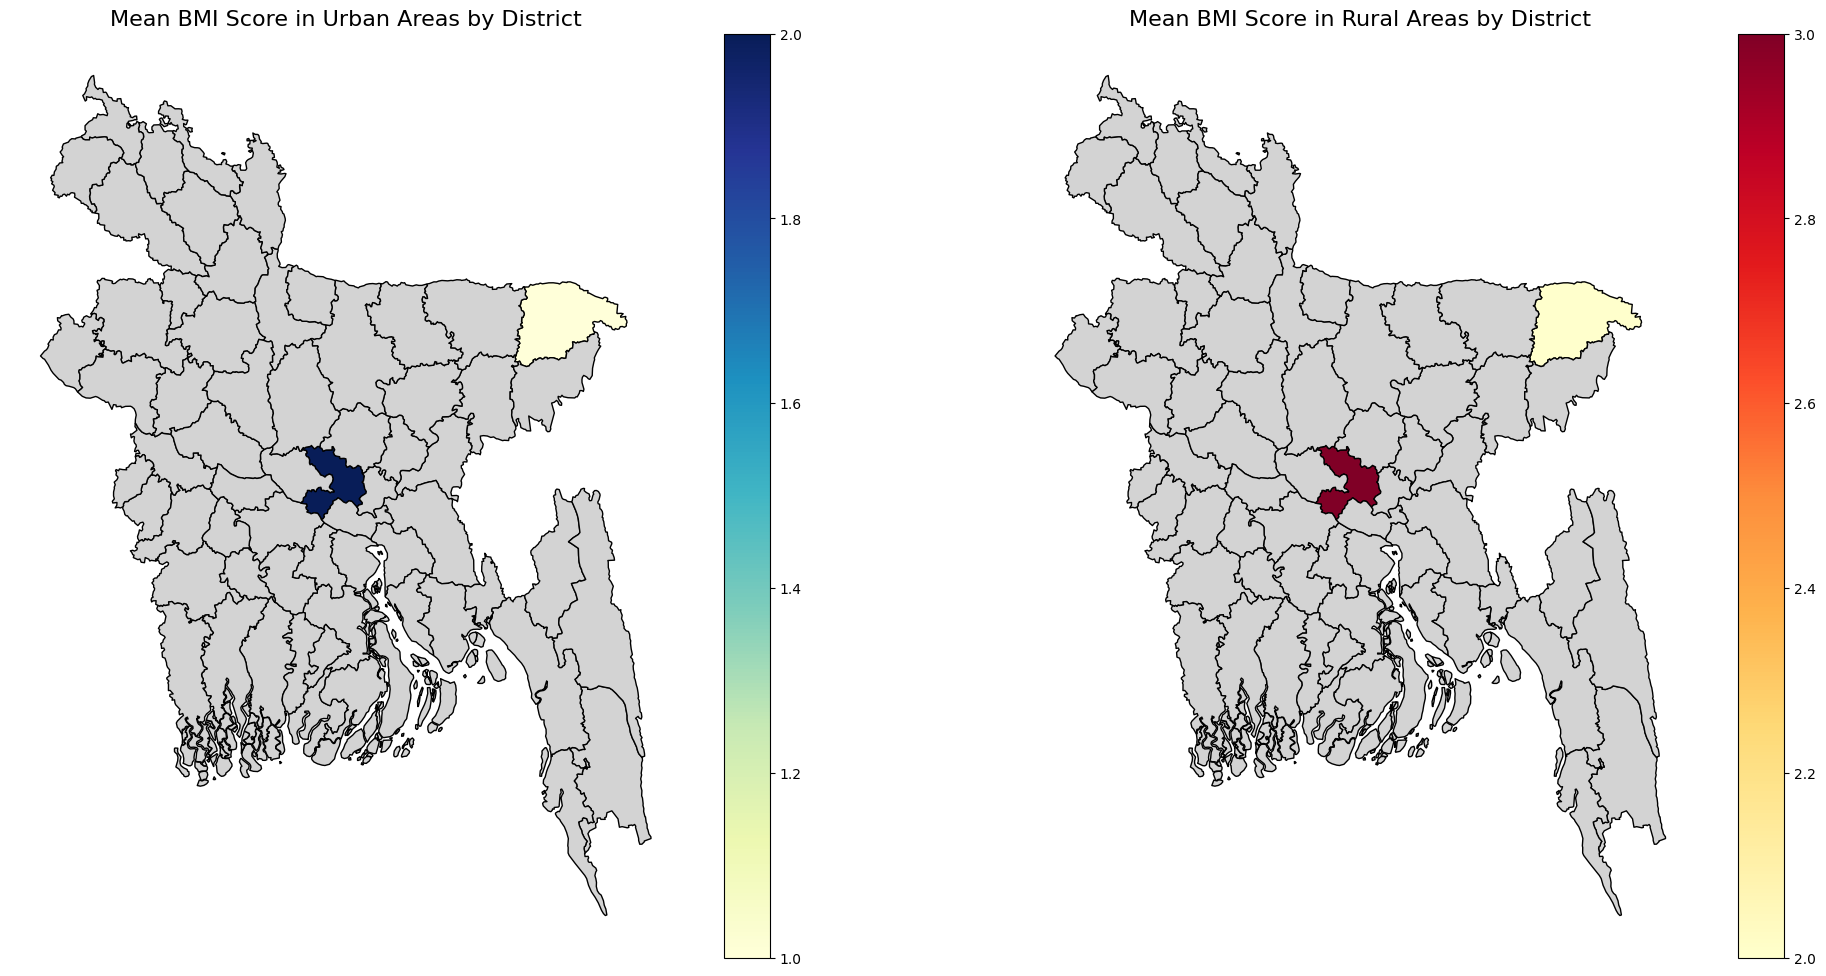

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Load GeoJSON district shapefile ---
districts_zillas = gpd.read_file('/content/bangladesh_geojson_adm2_64_districts_zillas.json')

# --- Example / Replace with your real data loading ---
# Your DataFrame `df` should have: 'district', 'area' ('Urban'/'Rural'), and 'bmi' categorical columns

# Sample example data (replace with your actual data)
data = {
    'district': ['Dhaka', 'Dhaka', 'Chittagong', 'Chittagong', 'Sylhet', 'Sylhet'],
    'area': ['Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural'],
    'bmi': ['Normal', 'Overweight', 'Obese', 'Normal', 'Underweight', 'Normal']
}
df = pd.DataFrame(data)

# --- Map BMI categories to numeric scores ---
bmi_score_map = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4}
df['bmi_score'] = df['bmi'].map(bmi_score_map)

# --- Aggregate mean BMI score by district and area ---
bmi_by_district_area = df.groupby(['district', 'area'])['bmi_score'].mean().reset_index()

# --- Separate Urban and Rural ---
urban_bmi = bmi_by_district_area[bmi_by_district_area['area'] == 'Urban'].copy()
rural_bmi = bmi_by_district_area[bmi_by_district_area['area'] == 'Rural'].copy()

# --- Merge with district GeoDataFrame ---
districts_urban = districts_zillas.merge(
    urban_bmi, left_on='ADM2_EN', right_on='district', how='left')

districts_rural = districts_zillas.merge(
    rural_bmi, left_on='ADM2_EN', right_on='district', how='left')

# --- Plot side-by-side maps for Urban and Rural mean BMI scores ---
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

districts_urban.plot(
    column='bmi_score', cmap='YlGnBu', legend=True, edgecolor='black',
    ax=axes[0], missing_kwds={"color": "lightgrey"}
)
axes[0].set_title('Mean BMI Score in Urban Areas by District', fontsize=16)
axes[0].axis('off')

districts_rural.plot(
    column='bmi_score', cmap='YlOrRd', legend=True, edgecolor='black',
    ax=axes[1], missing_kwds={"color": "lightgrey"}
)
axes[1].set_title('Mean BMI Score in Rural Areas by District', fontsize=16)
axes[1].axis('off')

plt.show()


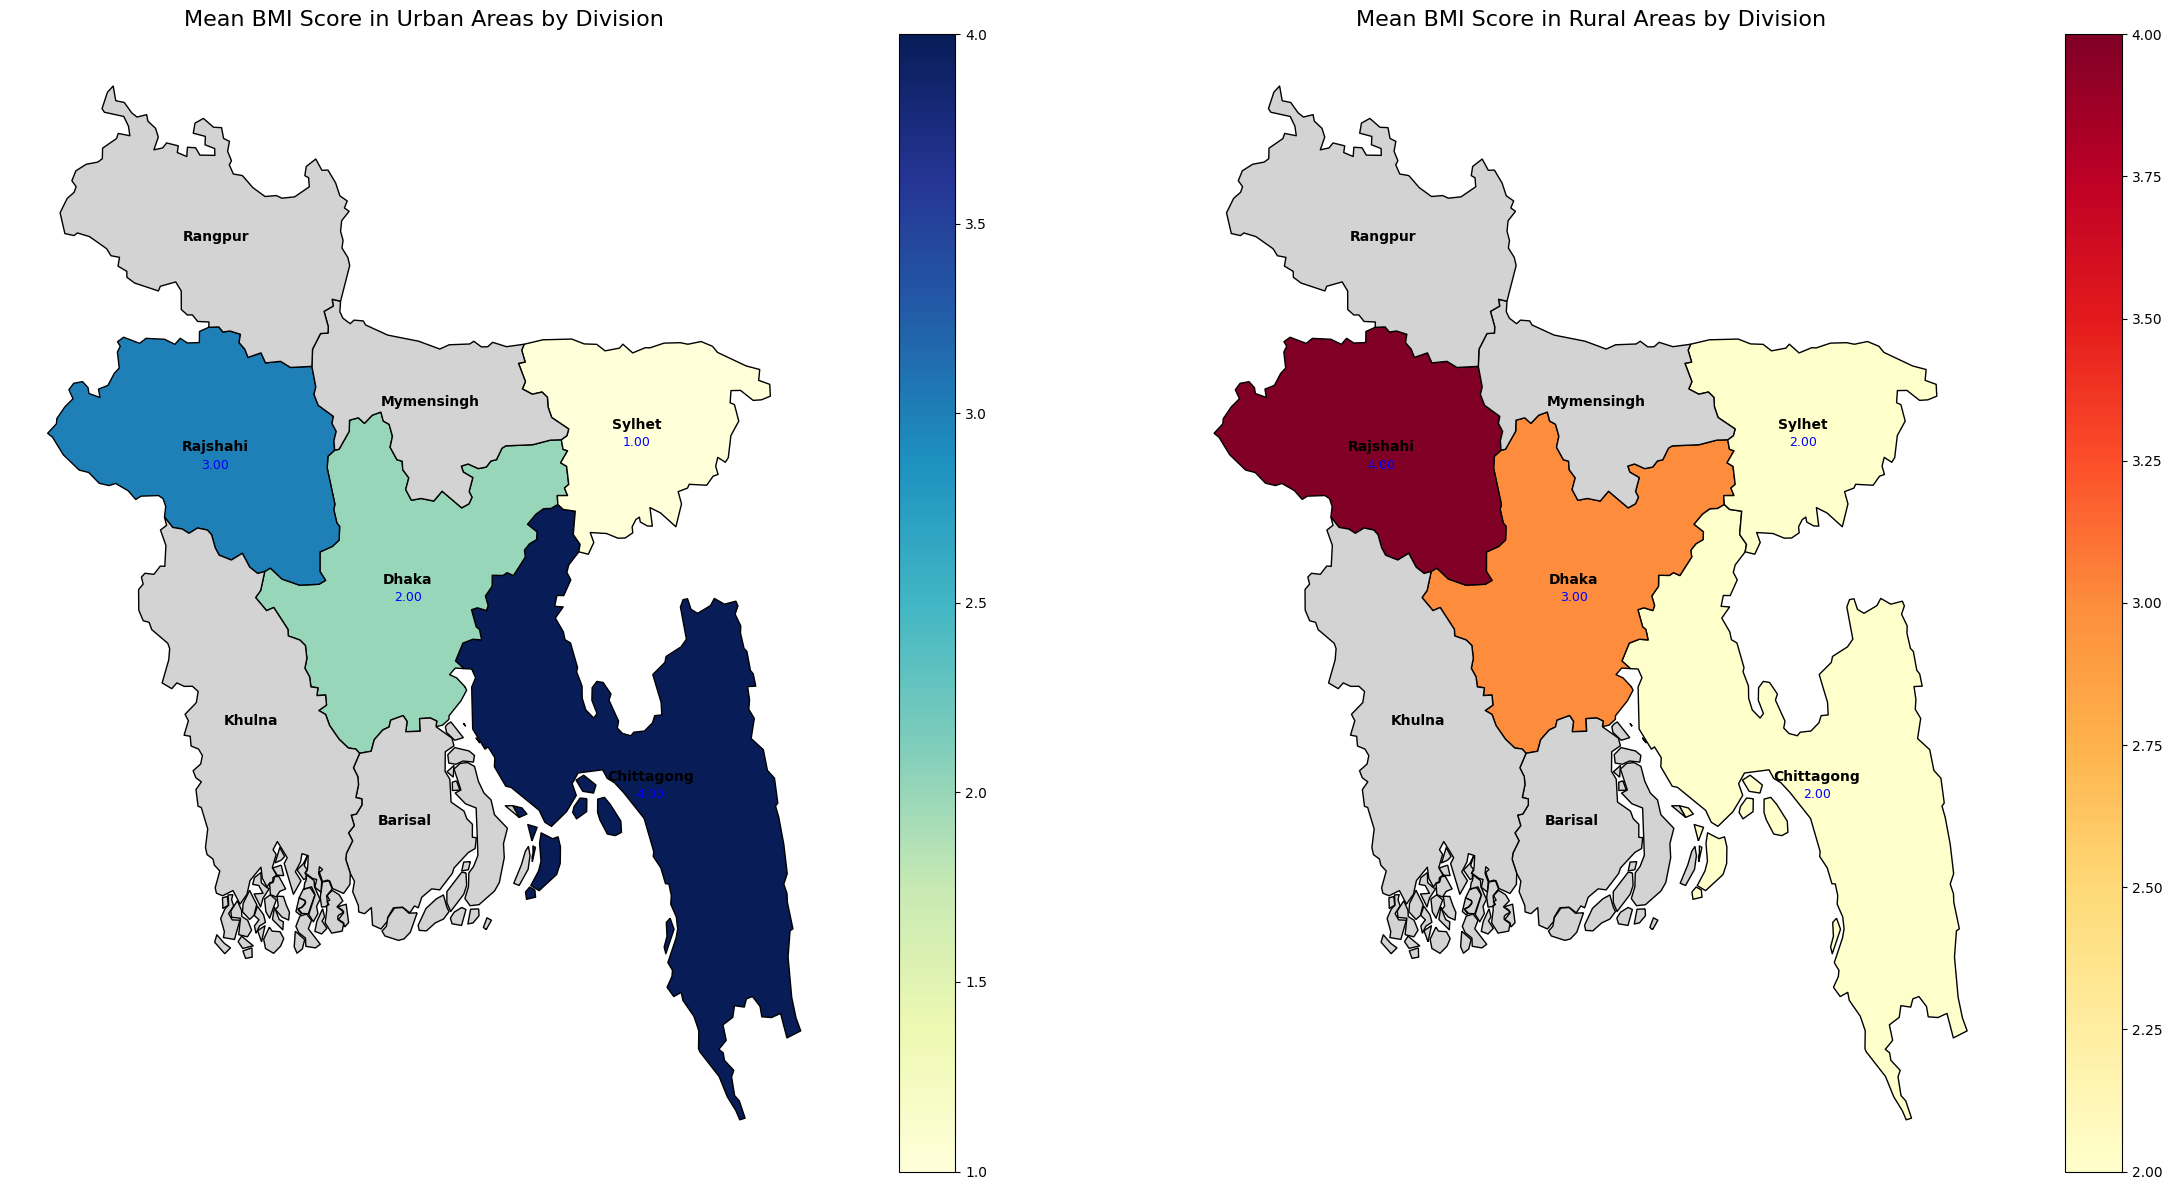

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Load GeoJSON divisions shapefile ---
divisions = gpd.read_file('/content/bangladesh_geojson_adm1_8_divisions_bibhags.json')

# --- Example / Replace with your actual data ---
data = {
    'division': ['Dhaka', 'Dhaka', 'Chittagong', 'Chittagong', 'Sylhet', 'Sylhet', 'Rajshahi', 'Rajshahi'],
    'area': ['Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural'],
    'bmi': ['Normal', 'Overweight', 'Obese', 'Normal', 'Underweight', 'Normal', 'Overweight', 'Obese']
}
df = pd.DataFrame(data)

# --- Map BMI categories to numeric scores ---
bmi_score_map = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4}
df['bmi_score'] = df['bmi'].map(bmi_score_map)

# --- Aggregate mean BMI score by division and area ---
bmi_by_division_area = df.groupby(['division', 'area'])['bmi_score'].mean().reset_index()

# --- Separate Urban and Rural ---
urban_bmi = bmi_by_division_area[bmi_by_division_area['area'] == 'Urban'].copy()
rural_bmi = bmi_by_division_area[bmi_by_division_area['area'] == 'Rural'].copy()

# --- Merge with divisions GeoDataFrame ---
divisions_urban = divisions.merge(
    urban_bmi, left_on='ADM1_EN', right_on='division', how='left')

divisions_rural = divisions.merge(
    rural_bmi, left_on='ADM1_EN', right_on='division', how='left')

# --- Function to annotate division names and BMI scores ---
def annotate_divisions(ax, gdf, value_col, value_format="{:.2f}"):
    for idx, row in gdf.iterrows():
        if row['geometry'].geom_type == 'MultiPolygon':
            largest_poly = max(row.geometry.geoms, key=lambda a: a.area)
            x, y = largest_poly.centroid.x, largest_poly.centroid.y
        else:
            x, y = row.geometry.centroid.x, row.geometry.centroid.y

        # Division name
        ax.text(x, y, row['ADM1_EN'], fontsize=10, fontweight='bold', ha='center', va='center', color='black')

        # BMI score value
        if pd.notna(row[value_col]):
            ax.text(
                x, y - 0.1,
                value_format.format(row[value_col]),
                fontsize=9,
                ha='center',
                va='center',
                color='blue'
            )

# --- Plot side-by-side Urban and Rural division BMI score maps ---
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

divisions_urban.plot(
    column='bmi_score', cmap='YlGnBu', legend=True, edgecolor='black',
    ax=axes[0], missing_kwds={"color": "lightgrey"}
)
axes[0].set_title('Mean BMI Score in Urban Areas by Division', fontsize=16)
axes[0].axis('off')
annotate_divisions(axes[0], divisions_urban, 'bmi_score')

divisions_rural.plot(
    column='bmi_score', cmap='YlOrRd', legend=True, edgecolor='black',
    ax=axes[1], missing_kwds={"color": "lightgrey"}
)
axes[1].set_title('Mean BMI Score in Rural Areas by Division', fontsize=16)
axes[1].axis('off')
annotate_divisions(axes[1], divisions_rural, 'bmi_score')

plt.tight_layout()
plt.show()


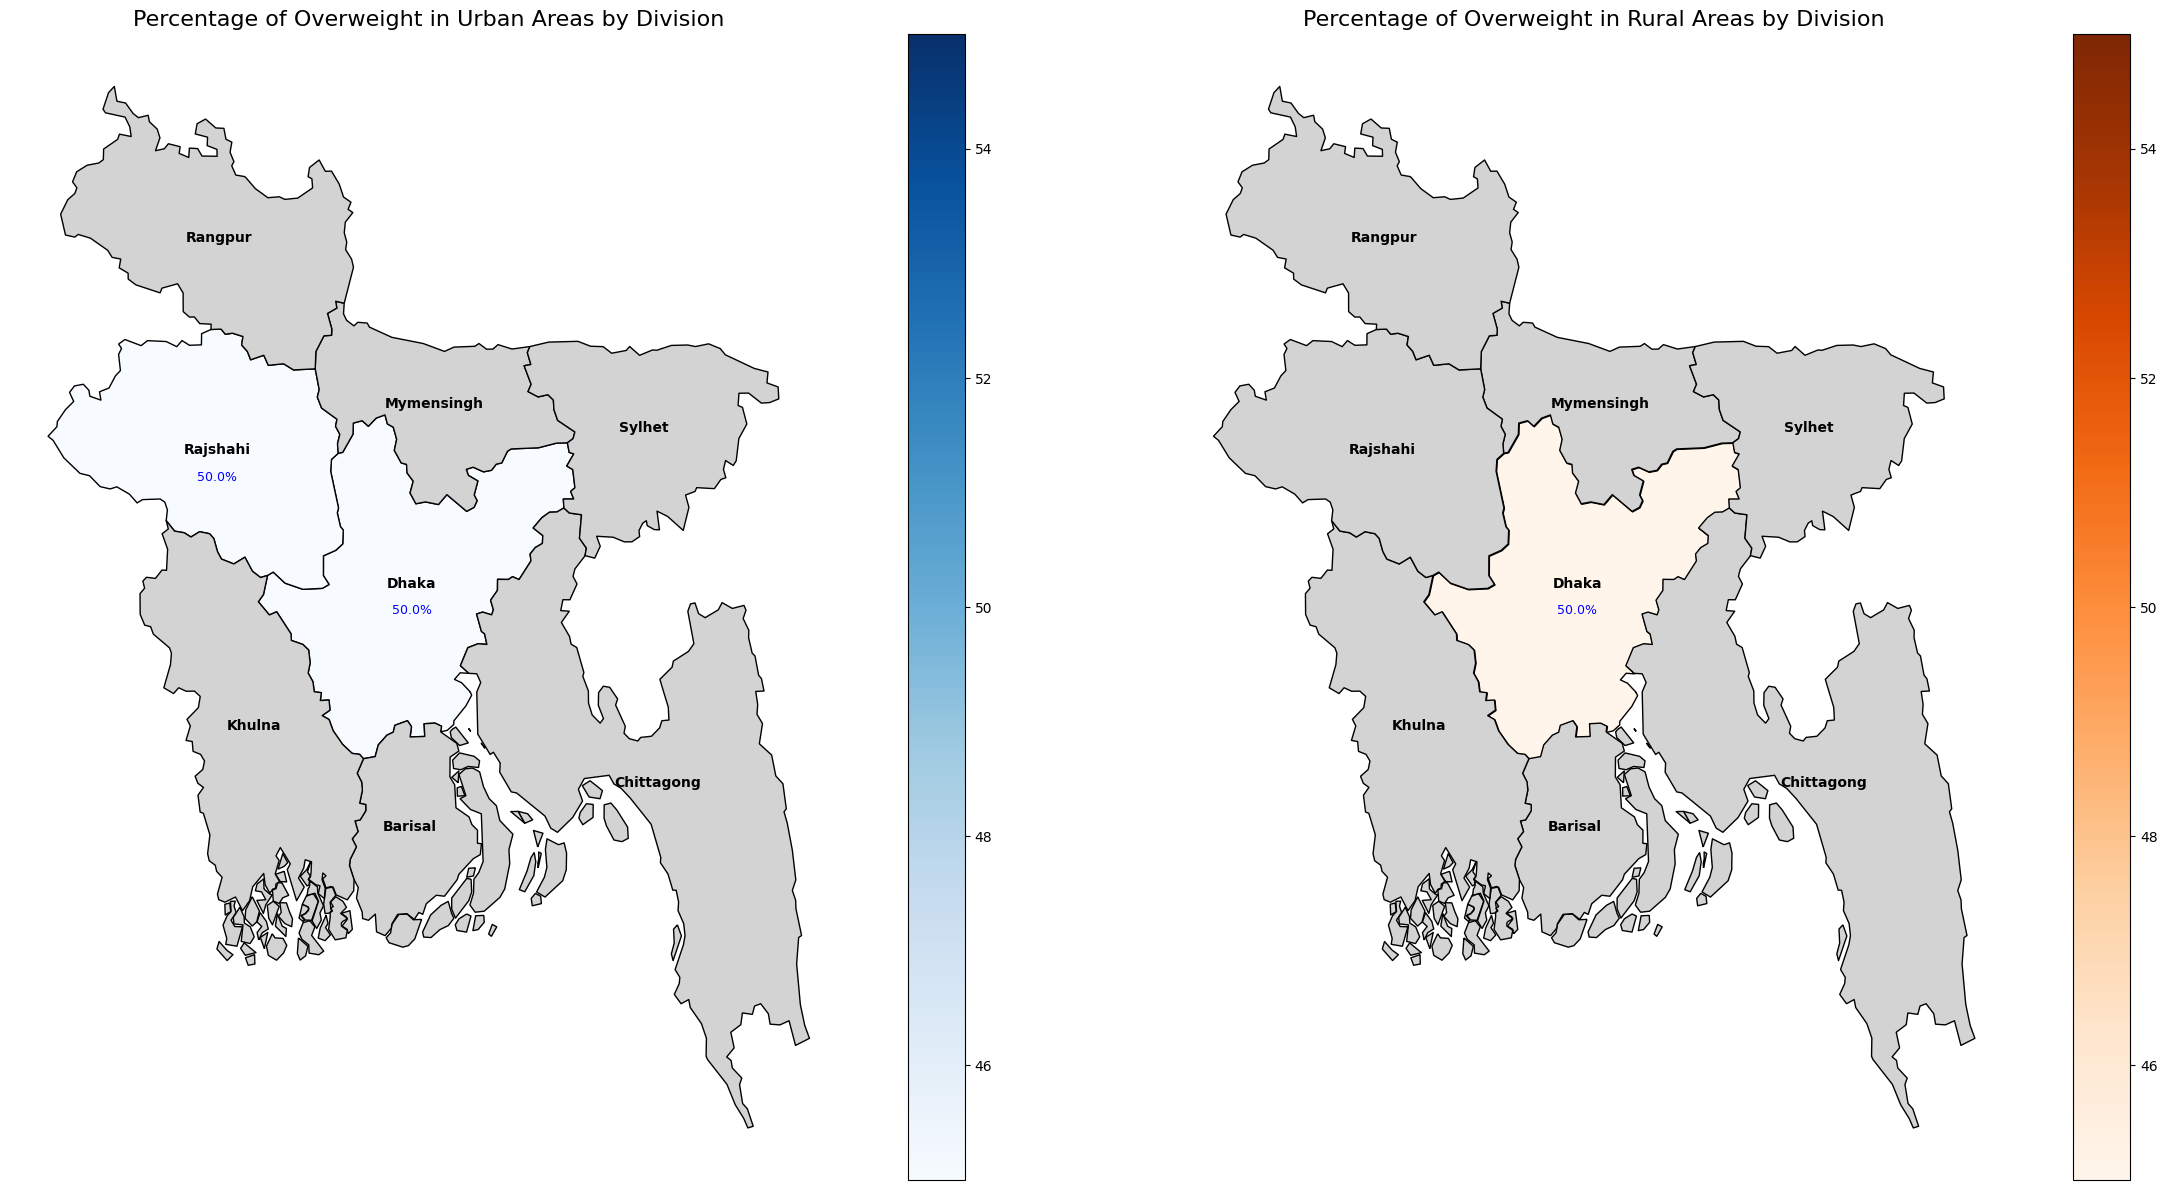

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON divisions shapefile
divisions = gpd.read_file('/content/bangladesh_geojson_adm1_8_divisions_bibhags.json')

# Example data - replace with your actual dataset
data = {
    'division': ['Dhaka', 'Dhaka', 'Chittagong', 'Chittagong', 'Sylhet', 'Sylhet', 'Rajshahi', 'Rajshahi',
                 'Dhaka', 'Dhaka', 'Chittagong', 'Chittagong', 'Sylhet', 'Sylhet', 'Rajshahi', 'Rajshahi'],
    'area': ['Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural',
             'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural'],
    'bmi': ['Normal', 'Overweight', 'Obese', 'Normal', 'Underweight', 'Normal', 'Overweight', 'Obese',
            'Overweight', 'Normal', 'Obese', 'Underweight', 'Underweight', 'Normal', 'Obese', 'Normal']
}
df = pd.DataFrame(data)

# Choose BMI category to calculate percentage for (example: 'Overweight')
bmi_category = 'Overweight'

# Calculate count of each BMI category by division and area
count_df = df.groupby(['division', 'area', 'bmi']).size().reset_index(name='count')

# Calculate total counts per division and area for percentage calculation
total_counts = count_df.groupby(['division', 'area'])['count'].transform('sum')

# Calculate percentage of chosen BMI category within each division and area
count_df['percent'] = 100 * count_df['count'] / total_counts

# Filter for the chosen BMI category only
percent_df = count_df[count_df['bmi'] == bmi_category][['division', 'area', 'percent']]

# Separate Urban and Rural percentage data
urban_percent = percent_df[percent_df['area'] == 'Urban'].copy()
rural_percent = percent_df[percent_df['area'] == 'Rural'].copy()

# Merge percentages with divisions GeoDataFrame
divisions_urban = divisions.merge(urban_percent, left_on='ADM1_EN', right_on='division', how='left')
divisions_rural = divisions.merge(rural_percent, left_on='ADM1_EN', right_on='division', how='left')

# Function to annotate divisions with name and percentage
def annotate_divisions(ax, gdf, value_col, value_format="{:.1f}%"):
    for idx, row in gdf.iterrows():
        if row['geometry'].geom_type == 'MultiPolygon':
            largest_poly = max(row.geometry.geoms, key=lambda a: a.area)
            x, y = largest_poly.centroid.x, largest_poly.centroid.y
        else:
            x, y = row.geometry.centroid.x, row.geometry.centroid.y

        # Division name
        ax.text(x, y, row['ADM1_EN'], fontsize=10, fontweight='bold', ha='center', va='center', color='black')

        # Percentage value
        if pd.notna(row[value_col]):
            ax.text(
                x, y - 0.15,
                value_format.format(row[value_col]),
                fontsize=9,
                ha='center',
                va='center',
                color='blue'
            )

# Plot side-by-side Urban and Rural percentage maps
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

divisions_urban.plot(
    column='percent', cmap='Blues', legend=True, edgecolor='black',
    ax=axes[0], missing_kwds={"color": "lightgrey"}
)
axes[0].set_title(f'Percentage of {bmi_category} in Urban Areas by Division', fontsize=16)
axes[0].axis('off')
annotate_divisions(axes[0], divisions_urban, 'percent')

divisions_rural.plot(
    column='percent', cmap='Oranges', legend=True, edgecolor='black',
    ax=axes[1], missing_kwds={"color": "lightgrey"}
)
axes[1].set_title(f'Percentage of {bmi_category} in Rural Areas by Division', fontsize=16)
axes[1].axis('off')
annotate_divisions(axes[1], divisions_rural, 'percent')

plt.tight_layout()
plt.show()


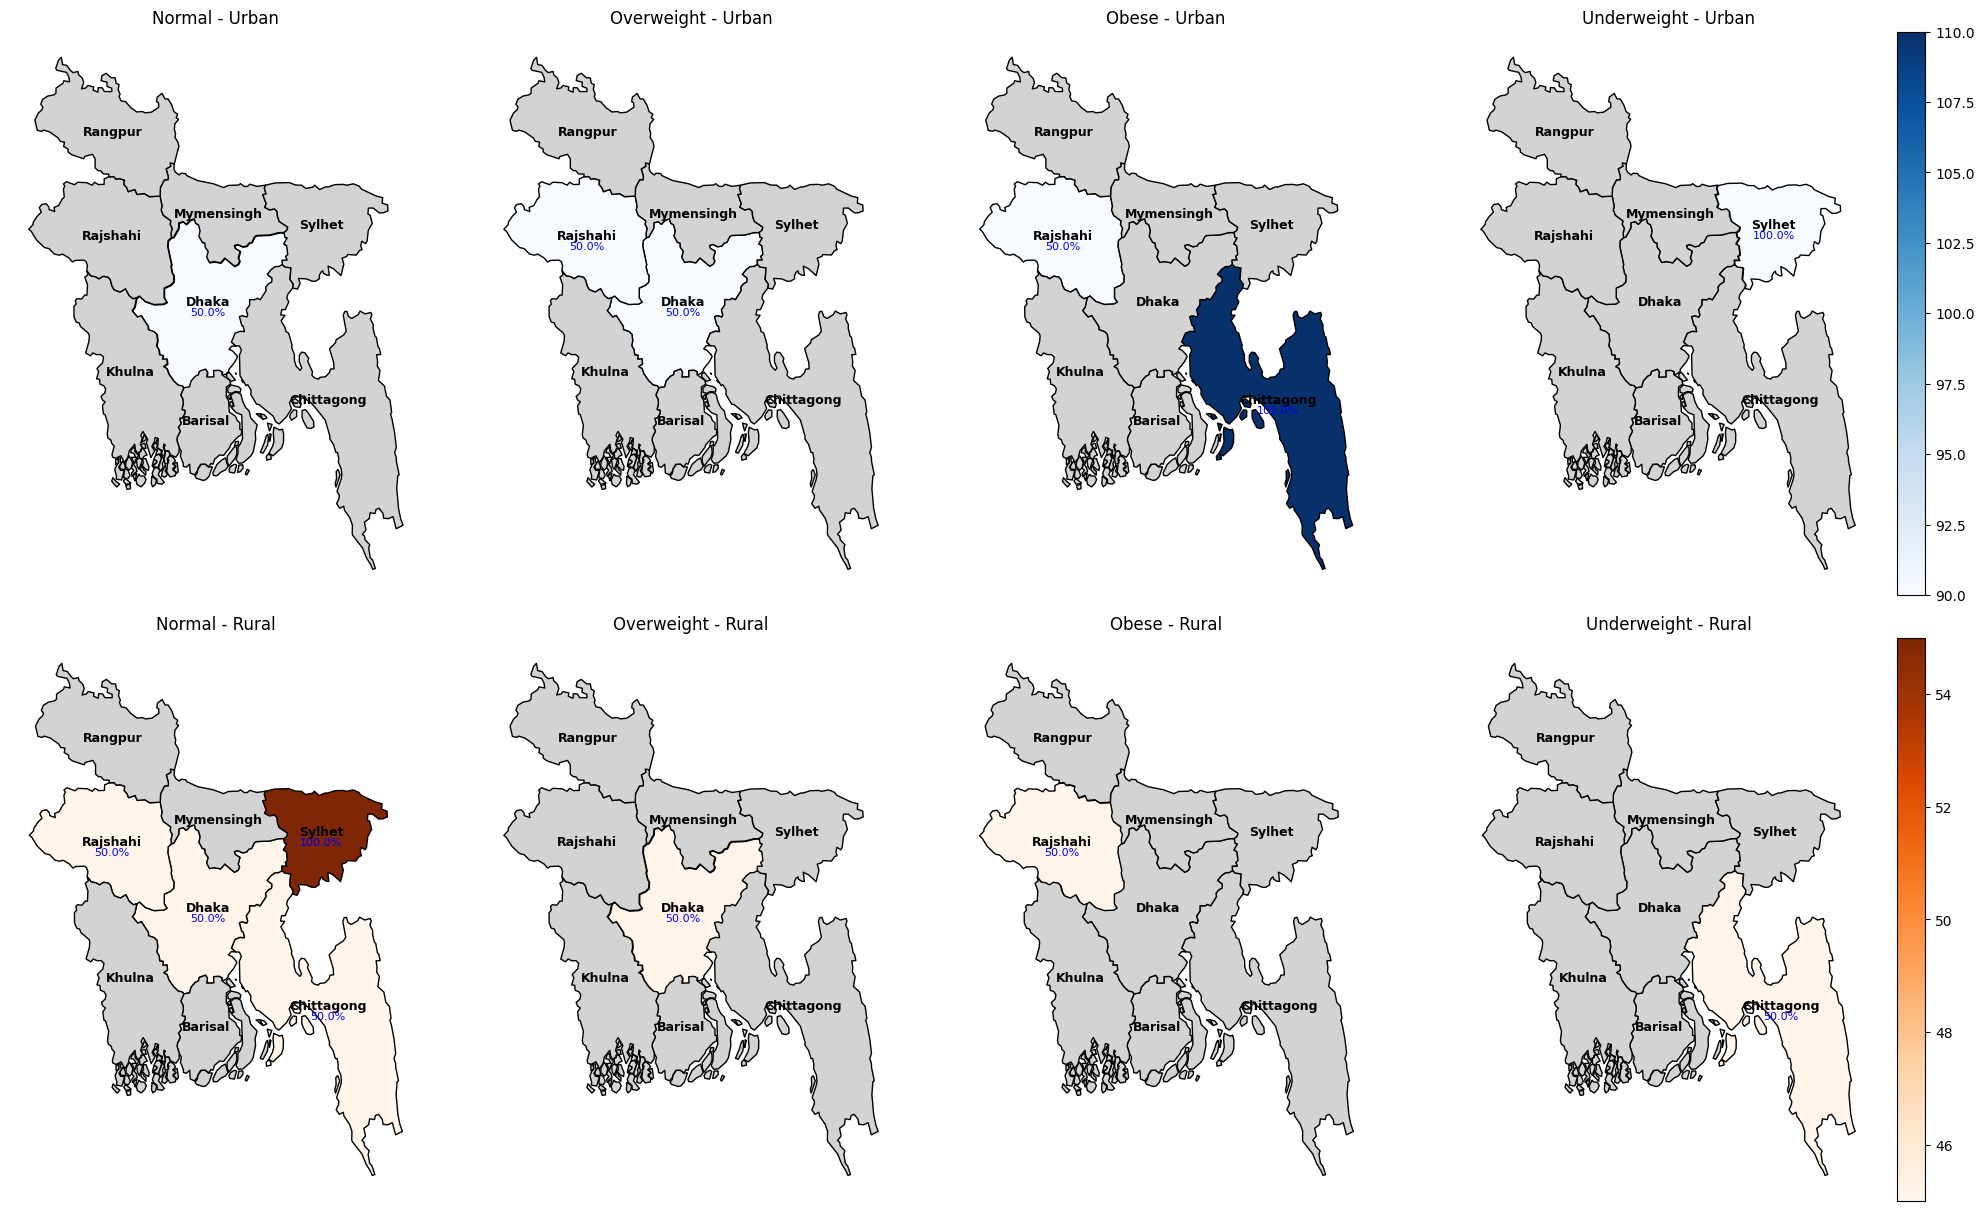

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON divisions shapefile
divisions = gpd.read_file('/content/bangladesh_geojson_adm1_8_divisions_bibhags.json')

# Example data - replace with your actual dataset
data = {
    'division': ['Dhaka', 'Dhaka', 'Chittagong', 'Chittagong', 'Sylhet', 'Sylhet', 'Rajshahi', 'Rajshahi',
                 'Dhaka', 'Dhaka', 'Chittagong', 'Chittagong', 'Sylhet', 'Sylhet', 'Rajshahi', 'Rajshahi'],
    'area': ['Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural',
             'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural'],
    'bmi': ['Normal', 'Overweight', 'Obese', 'Normal', 'Underweight', 'Normal', 'Overweight', 'Obese',
            'Overweight', 'Normal', 'Obese', 'Underweight', 'Underweight', 'Normal', 'Obese', 'Normal']
}
df = pd.DataFrame(data)

# Calculate count per division, area, bmi
count_df = df.groupby(['division', 'area', 'bmi']).size().reset_index(name='count')

# Calculate total counts per division and area
total_counts = count_df.groupby(['division', 'area'])['count'].transform('sum')

# Calculate percentage
count_df['percent'] = 100 * count_df['count'] / total_counts

# List of BMI categories and areas to iterate over
bmi_categories = df['bmi'].unique()
areas = ['Urban', 'Rural']

# Setup matplotlib grid: 2 rows (Urban, Rural), columns = number of BMI categories
fig, axes = plt.subplots(nrows=2, ncols=len(bmi_categories), figsize=(5*len(bmi_categories), 12), constrained_layout=True)

# Function to annotate divisions with name and percentage
def annotate_divisions(ax, gdf, value_col):
    for idx, row in gdf.iterrows():
        if row['geometry'].geom_type == 'MultiPolygon':
            largest_poly = max(row.geometry.geoms, key=lambda a: a.area)
            x, y = largest_poly.centroid.x, largest_poly.centroid.y
        else:
            x, y = row.geometry.centroid.x, row.geometry.centroid.y

        # Division name
        ax.text(x, y, row['ADM1_EN'], fontsize=9, fontweight='bold', ha='center', va='center', color='black')

        # Percentage value
        if pd.notna(row[value_col]):
            ax.text(
                x, y - 0.12,
                f"{row[value_col]:.1f}%",
                fontsize=8,
                ha='center',
                va='center',
                color='blue'
            )

# Loop over areas and BMI categories, plot maps
for i, area in enumerate(areas):
    for j, bmi_cat in enumerate(bmi_categories):
        # Filter for this area and bmi_cat
        temp_df = count_df[(count_df['area'] == area) & (count_df['bmi'] == bmi_cat)][['division', 'percent']]

        # Merge with divisions GeoDataFrame
        merged = divisions.merge(temp_df, left_on='ADM1_EN', right_on='division', how='left')

        ax = axes[i, j]
        cmap = 'Blues' if area == 'Urban' else 'Oranges'

        merged.plot(
            column='percent',
            cmap=cmap,
            legend=True if j == len(bmi_categories)-1 else False,
            edgecolor='black',
            ax=ax,
            missing_kwds={"color": "lightgrey"}
        )
        ax.set_title(f"{bmi_cat} - {area}", fontsize=12)
        ax.axis('off')

        annotate_divisions(ax, merged, 'percent')

plt.show()


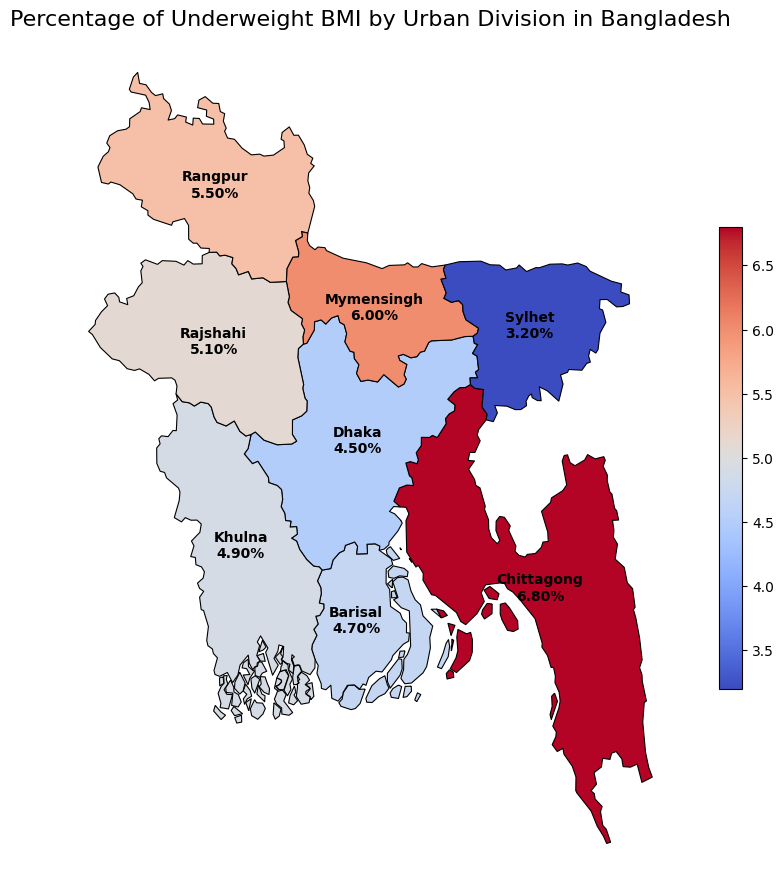

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load Bangladesh divisions GeoJSON
divisions = gpd.read_file('/content/bangladesh_geojson_adm1_8_divisions_bibhags.json')

# Example: Your BMI % data for divisions and area (replace with real data)
data = {
    'division': ['Dhaka', 'Chittagong', 'Sylhet', 'Rajshahi', 'Barisal', 'Khulna', 'Mymensingh', 'Rangpur'],
    'area': ['Urban']*8,
    'bmi': ['Underweight']*8,
    'percent': [4.5, 6.8, 3.2, 5.1, 4.7, 4.9, 6.0, 5.5]  # example percentages
}
df = pd.DataFrame(data)

# Merge your data with GeoDataFrame
merged = divisions.merge(df, left_on='ADM1_EN', right_on='division', how='left')

fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Plot with continuous color map
cmap = 'coolwarm'  # or 'YlGnBu', 'OrRd' depending on preference
vmin = merged['percent'].min()
vmax = merged['percent'].max()

# Plot divisions colored by 'percent'
divider = merged.plot(column='percent', cmap=cmap, linewidth=0.8, edgecolor='black', legend=True, ax=ax,
                      vmin=vmin, vmax=vmax, legend_kwds={'shrink': 0.5})

# Annotate division name and percentage
for idx, row in merged.iterrows():
    if row['geometry'].geom_type == 'MultiPolygon':
        largest_poly = max(row.geometry.geoms, key=lambda a: a.area)
        x, y = largest_poly.centroid.x, largest_poly.centroid.y
    else:
        x, y = row.geometry.centroid.x, row.geometry.centroid.y

    if pd.notna(row['percent']):
        ax.text(x, y, f"{row['ADM1_EN']}\n{row['percent']:.2f}%", ha='center', va='center', fontsize=10, fontweight='bold', color='black')

ax.set_title('Percentage of Underweight BMI by Urban Division in Bangladesh', fontsize=16)
ax.axis('off')

plt.show()
